______________________________________________________________________
Membangun K-means sederhana setahap demi setahap dalam Python


Oleh: Mujirin@koferaTechnology
______________________________________________________________________

# Membangun K-means setahap demi setahap

K-means sederhananya adalah metode untuk mengelompokan sejumlah $n$ observasi (data) ke dalam $k$ kelompok, sedemikian sehingga kelompok-kelompok yang terbentuk mempresentasikan struktur data. Struktur yang terbentuk disebut sebagai model, model inilah yang nantinya digunakan untuk berbagai hal. 

Umumnya ada 3 langkah dalam algoritma K-means:
1. Pemilihan sejumlah $k$ titik sebagai pusat awal dari group-group yang akan terbentuk.
2. Penyematan setiap data pada titik-titik pusat awal (mententukan setiap data merupakan anggota salah satu dari group yang terbentuk).
3. Mengganti titik-titik pusat awal dengan titik-titik yang mempresentasikan rata-rata anggota group sampai group-group yang terbentuk tidak berubah anggota-anggotanya.

Dengan tujuan lebih intiuitif, kita akan mencoba membangun algoritma k-means ini dengan Python setahap demi setahap sebagai berikut:

## Data

Kita akan membuat $n$ pasang data dua dimensi $(x,y)$ atau $\{(x_1,y_1),(x_2,y_2), (x_3,y_3), ..., (x_i,y_i), ..., (x_n,y_n)\}$, dengan domain $x$ dan $y$ sama yakni  $[0,100]$  secara acak (random) namun ada struktur kelompoknya, dengan $n=100$ dan $k=3$ dengan Numpy untuk nantinya kita gunakan untuk ujicoba algoritma K-means yang akan buat.

In [28]:
# Import library Numpy
import numpy as np

# Pembuatan data secara random
ax = np.random.randint(0,40,20)
ay = np.random.randint(0,40,20)
bx = np.random.randint(70,100,20)
by = np.random.randint(33,66,20)
cx = np.random.randint(33,59,20)
cy = np.random.randint(70,100,20)
# keterangan:
# list(np.random.randint(minimum,maksimum,jumlah bilangan(data) 
# yang dibuat))

# Mengelompokan data-data yang telah dibuat di atas menjadi x dan y. 
x = []
y = []
for i in range(len(ax)):
    x.append(ax[i])
    x.append(bx[i])
    x.append(cx[i])
    y.append(ay[i])
    y.append(by[i])
    y.append(cy[i])
    
# Untuk melihat data sebagai berikut:
print('data x: ',x)
print('panjang x:',len(x))
print('data y: ',y)
print('panjang y:', len(y))

data x:  [24, 74, 41, 12, 94, 42, 4, 75, 53, 0, 96, 39, 6, 75, 55, 15, 86, 35, 38, 95, 40, 11, 77, 33, 19, 76, 40, 6, 78, 35, 35, 81, 37, 1, 94, 38, 26, 70, 54, 23, 74, 57, 38, 95, 37, 1, 87, 50, 25, 72, 55, 11, 93, 41, 8, 89, 53, 24, 72, 45]
panjang x: 60
data y:  [34, 46, 94, 16, 52, 88, 8, 60, 86, 37, 64, 72, 8, 52, 85, 19, 58, 81, 6, 61, 99, 1, 48, 70, 21, 47, 84, 12, 45, 74, 38, 65, 92, 38, 44, 86, 15, 61, 83, 12, 52, 87, 18, 34, 73, 33, 62, 93, 28, 57, 86, 0, 59, 90, 32, 44, 95, 14, 37, 72]
panjang y: 60


Agar lebih mudah dilihat, kita gunakan library Pandas untuk membuatnya dalam bentuk dataframe (tabel) sebagai berikut:

In [29]:
# Import library Pandas
import pandas as pd

# Pembuatan dataframe kosong
df = pd.DataFrame()
# Memasukan data x dan y ke dalam dataframe
df['x'] = x
df ['y'] = y

# Dataframe 5 data pertama yang telah dibuat akan terlihat 
# sebagai berikut:
print(df.head())

    x   y
0  24  34
1  74  46
2  41  94
3  12  16
4  94  52


kolom pertama adalah index, kolom ke dua adalah data $x$ dan kolom ketiga adalah data $y$.

Agar lebih intuitif, kita dapat menggambarkannya dalam dalam representasi grafik, menggunakan library Matplotlib sebagai berikut:

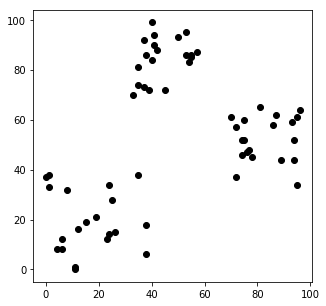

In [30]:
# Import library Matplotlib
import matplotlib.pyplot as plt

# Gambar dibuat dengan ukuran 5 x 5
plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = 'k')
plt.show()

Seperti terlihat dalam gambar, data yang telah dibuat memiliki struktur kelompok. Dengan ini, pembuatan data telah selesai.

## Inisiasi titik-titik pusat

Kita menggunakan Numpy kembali untuk membuat titik-titik pusat inisiasi secara acak sebanyak tiga pasang karena data menunjukan 3 kelompok dengan domain acak sama seperti domain data, yakni $[0,100]$.

In [31]:
pusat_x = np.random.randint(0,100,3)
pusat_y = np.random.randint(0,100,3)
pusat = []
for i in range(len(pusat_x)):
    pusat.append([pusat_x[i],pusat_y[i]])

Jika kita print, pusatnya seperti ini

In [32]:
print(pusat)

[[80, 32], [29, 29], [92, 30]]


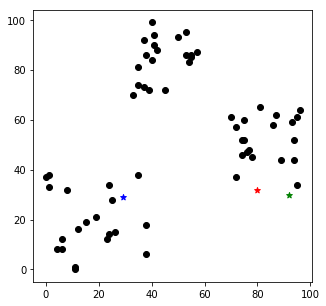

In [33]:
# Tahap Inisiasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

#np.random.seed(200)
plt.figure(figsize=(5,5))
plt.scatter(x,y,color = 'k')
plt.scatter(pusat[0][0],pusat[0][1],color = 'r',marker= '*')
plt.scatter(pusat[1][0],pusat[1][1],color = 'b',marker= '*')
plt.scatter(pusat[2][0],pusat[2][1],color = 'g',marker= '*')
plt.show()

## Penyematan

Setiap titik data disemati dengan titik pusat terdekatnya. Untuk melakukan hal tersebut kita gunakan konsep jarak antara dua vektor $d(c,p)$. Jadi jarak titik data $c=(x_c,y_c)$ ke pusat $p=(x_p,y_p)$ adalah 

$$d(c,p)=\sqrt{(x_c-y_p)^2+(y_c-y_p)^2)}$$

karena ada tiga titik pusat, maka kita akan hitung jarak antara setiap data dan ketiga titik pusat, kemudian kita pilih titik pusat dengan jarak terpendek. Titik pusat dengan jarak terpendek inilah yang menjadi label bagi titik data yang bersangkutan. Untuk kebutuhan tersebut, karena akan digunakan berkali-kali di perhitungan ini, kita membuatnya dalam bentuk fungsi dalam Python sebagai berikut:

In [34]:
def penyematan(df,pusat):
    # Data x dan data y dipisahkan untuk diproses.
    x = df['x'] # Cara menggambil data kolom x dari dataframe df.
    y = df['y']
    
    # wadah untuk menampung hasil perihitungan jarak antara
    # setiap data dengan pusat.
    d1 = []
    d2 = []
    d3 = []
    for i in range(len(x)):
        # Perhintungan jarak antara setiap titik data dan setiap pusat
        d1.append(np.sqrt((x[i]-pusat[0][0])**2+(y[i]-pusat[0][1])**2))
        d2.append(np.sqrt((x[i]-pusat[1][0])**2+(y[i]-pusat[1][1])**2))
        d3.append(np.sqrt((x[i]-pusat[2][0])**2+(y[i]-pusat[2][1])**2))
    
    # Penentuan titik pusat terdekat
    d_min = []
    for i in range(len(x)):
        m = min([d1[i],d2[i],d3[i]])
        if m == d1[i]:
            d_min.append(1) 
        elif m == d2[i]:
            d_min.append(2)
        elif m == d3[i]:
            d_min.append(3) 
            
    # Pembuatan tabel untuk hasil perhingungan jarak dan pusat terdekat.
    jarak = pd.DataFrame()
    jarak['d_pusat 1']=d1
    jarak['d_pusat 2']=d2
    jarak['d_pusat 3']=d3
    jarak['pusat terdekat']=d_min
    
    # Pengelompokan data-data dengan group yang sama.
    k1x = []
    k2x = []
    k3x = []
    k1y = []
    k2y = []
    k3y = []
    for i in range(len(x)):
        if jarak['pusat terdekat'][i] == 1:
            k1x.append(df['x'][i])
            k1y.append(df['y'][i])
        elif jarak['pusat terdekat'][i] == 2:
            k2x.append(df['x'][i])
            k2y.append(df['y'][i])
        elif jarak['pusat terdekat'][i] == 3:
            k3x.append(df['x'][i])
            k3y.append(df['y'][i])
    group = [[k1x,k1y],[k2x,k2y],[k3x,k3y]]
    return jarak, group


In [35]:
# Menggunakan fungsi penyematan untuk mendapatkan pusat terdekat:
# jarak adalah tabel jarak antara titik data dan pusat serta pusat terdekatnya
# group adalah list himpunan kelompok-kelompok yang terbentuk (untuk pengrafikan).
jarak,group = penyematan(df,pusat)

print("Jarak")
print(jarak.head())
print("Group 1")
print(group[0])
print("Group 2")
print(group[1])
print("Group 3")
print(group[2])


Jarak
   d_pusat 1  d_pusat 2  d_pusat 3  pusat terdekat
0  56.035703   7.071068  68.117545               2
1  15.231546  48.104054  24.083189               1
2  73.246160  66.098411  81.835200               2
3  69.856997  21.400935  81.215762               2
4  24.413111  68.949257  22.090722               3
Group 1
[[74, 75, 53, 75, 55, 86, 77, 76, 78, 81, 70, 54, 74, 57, 87, 72, 55, 53, 72], [46, 60, 86, 52, 85, 58, 48, 47, 45, 65, 61, 83, 52, 87, 62, 57, 86, 95, 37]]
Group 2
[[24, 41, 12, 42, 4, 0, 39, 6, 15, 35, 38, 40, 11, 33, 19, 40, 6, 35, 35, 37, 1, 38, 26, 23, 38, 37, 1, 50, 25, 11, 41, 8, 24, 45], [34, 94, 16, 88, 8, 37, 72, 8, 19, 81, 6, 99, 1, 70, 21, 84, 12, 74, 38, 92, 38, 86, 15, 12, 18, 73, 33, 93, 28, 0, 90, 32, 14, 72]]
Group 3
[[94, 96, 95, 94, 95, 93, 89], [52, 64, 61, 44, 34, 59, 44]]


Untuk melihatnya lebih jelas kita gunakan fungsi berikut dengan argumen group dan pusat untuk menggambarkan hasil pengelompokan yang telah dibuat:

In [36]:
def grafik(group,pusat):
    plt.figure(figsize=(5,5))
    plt.scatter(group[0][0],group[0][1],color = 'r')
    plt.scatter(group[1][0],group[1][1],color = 'b')
    plt.scatter(group[2][0],group[2][1],color = 'g')
    
    print('catatan',len(group[1][0]),len(group[1][1]))
    
    
    x = plt.scatter(pusat[0][0],pusat[0][1],color = 'r',marker= '*',label = 'p1')
    y = plt.scatter(pusat[1][0],pusat[1][1],color = 'b',marker= '*',label = 'p2')
    z = plt.scatter(pusat[2][0],pusat[2][1],color = 'g',marker= '*',label = 'p3')
    print('pusat',pusat,len(pusat))
    print('group',len(group[0]),len(group[1]),len(group[2]))
    
    plt.legend(handles = [x,y,z])
    plt.show()
    return

catatan 34 34
pusat [[80, 32], [29, 29], [92, 30]] 3
group 2 2 2


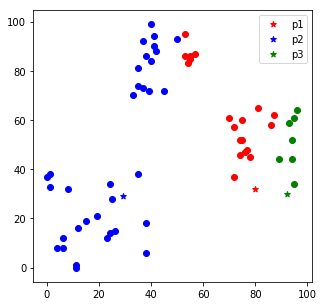

In [37]:
grafik(group,pusat)

Seperti telihat pada grafik di atas, setiap data telah disemati dengan group sesuai dengan titik pusatnya yang terdekat. Dan terlihat juga bahwa group yang terbentuk belum mempresentasikan struktur kelompok data, oleh karena itu kita perlu memperbaharui titik pusat sedemikian sehingga memperesentasikan struktur data.

## Pembaruan Titik Pusat

Titik pusat yang baru $(x_{p_{baru}},y_{p_{baru}})$ adalah nilai rerata data-data yang termasuk dalam group tersebut. Jadi komponen $x_{p_{baru}}$ dari pusat baru adalah nilai rerata dari semua komponen $x$ data dalam group tersebut, begitu juga komponen $y_{p_{baru}}$.

$$x_{p_{baru}}={\frac{1}{n}}{\sum_{j=1}^{n}x_j}$$
dan
$$y_{p_{baru}}={\frac{1}{n}}{\sum_{j=1}^{n}y_j}$$
dengan $n$ jumlah data dalam group tersebut.
Untuk melakukannya kita buat fungsi update pusat sebagai berikut:

In [38]:
def updatePusat(df,jarak,pusat):
    p1x = []
    p2x = []
    p3x = []
    p1y = []
    p2y = []
    p3y = []
    for i in range(len(jarak['pusat terdekat'])):
        if jarak['pusat terdekat'][i] == 1:
            p1x.append(df['x'][i])
            p1y.append(df['y'][i])
        elif jarak['pusat terdekat'][i] == 2:
            p2x.append(df['x'][i])
            p2y.append(df['y'][i])
        elif jarak['pusat terdekat'][i] == 3:
            p3x.append(df['x'][i])
            p3y.append(df['y'][i])
    px = [p1x,p2x,p3x]
    py = [p1y,p2y,p3y]
    for i in range(len(px)):
        if len(px[i])==0:
            px[i].append(pusat[i][0])
            py[i].append(pusat[i][1])
#            print('###############################')
#            print('#ini dia yang tetap')
#            print('###############################')
    pusat_baru = [[np.mean(px[0]),np.mean(py[0])],[np.mean(px[1]),np.mean(py[1])],[np.mean(px[2]),np.mean(py[2])]]

    return pusat_baru

In [39]:
print('Pusat lama')
print(pusat)
pusat_baru = updatePusat(df,jarak,pusat)
print('Pusat baru: ')
print(pusat_baru)

Pusat lama
[[80, 32], [29, 29], [92, 30]]
Pusat baru: 
[[69.684210526315795, 63.789473684210527], [25.882352941176471, 45.823529411764703], [93.714285714285708, 51.142857142857146]]


untuk melihatnya, mari kita grafikan dengan fungsi grafik yang sudah dibuat:


catatan 34 34
pusat [[80, 32], [29, 29], [92, 30]] 3
group 2 2 2


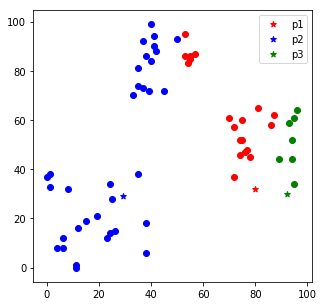

In [40]:
grafik(group,pusat)

catatan 34 34
pusat [[69.684210526315795, 63.789473684210527], [25.882352941176471, 45.823529411764703], [93.714285714285708, 51.142857142857146]] 3
group 2 2 2


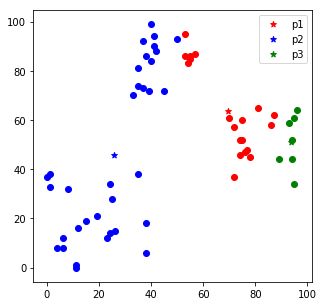

In [41]:
grafik(group,pusat_baru)

Kemudian kita sematkan lagi data-data dengan pusat yang baru

In [42]:
jarak_baru,group_baru = penyematan(df,pusat_baru)

dan seperti terlihat pada grafik berikut, grup yang terbentuk sudah semakin baik, namun pusat belum tentu mempresentasikan pusat sesungguhnya

catatan 25 25
pusat [[69.684210526315795, 63.789473684210527], [25.882352941176471, 45.823529411764703], [93.714285714285708, 51.142857142857146]] 3
group 2 2 2


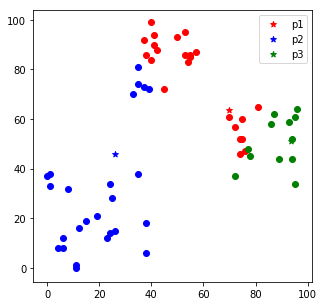

In [43]:
grafik(group_baru,pusat_baru)

## Iterator

Untuk memastikan titik pusat adalah representasi dari kelompok-kelompok yang terbentuk, maka kita perlu mengulang-ulang pembaruan pusat sampai pada batas yang diinginkan. Untuk melakukannya kita membuat fungsi lagi untuk melakukan pengulangan dan penyematan berulang-ulang hingga pusat yang terbentuk konvergen (perubahan yang terjadi tidak berarti).

In [44]:
def iterasi(jarak,df,pusat):
    while True:
        pusat_terdekat = jarak['pusat terdekat'].copy(deep=True)
        pusat = updatePusat(df,jarak, pusat)
        jarak,group = penyematan(df,pusat)
        grafik(group,pusat)
        if pusat_terdekat.equals(jarak['pusat terdekat']):
            break

    return pusat, jarak, group

catatan 25 25
pusat [[69.684210526315795, 63.789473684210527], [25.882352941176471, 45.823529411764703], [93.714285714285708, 51.142857142857146]] 3
group 2 2 2


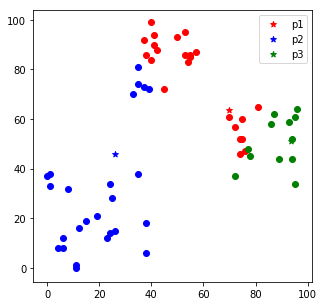

catatan 20 20
pusat [[56.434782608695649, 76.521739130434781], [20.239999999999998, 30.399999999999999], [88.0, 50.666666666666664]] 3
group 2 2 2


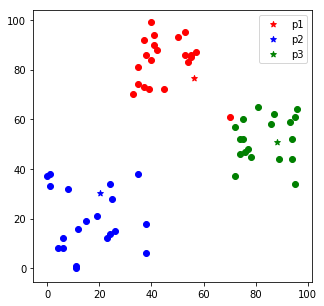

catatan 20 20
pusat [[45.238095238095241, 83.38095238095238], [16.350000000000001, 19.5], [83.315789473684205, 51.94736842105263]] 3
group 2 2 2


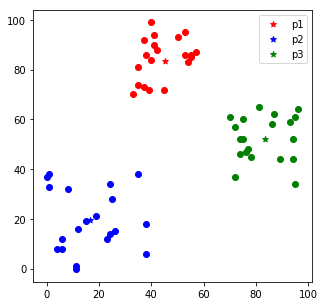

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


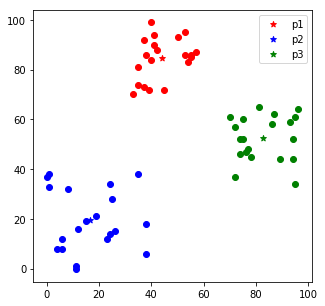

In [45]:
pusat, jarak, group = iterasi(jarak,df,pusat)

## Model

Salah satu kelemahan k-means adalah sensitif terhadap pemilihan pusat awal. Jadi pemilihan pusat awal bisa menghasilkan struktur yang tidak mempresentasikan struktur kelompok-kelompok data, untuk mengatasinya, salah satunya adaah dengn cara mengulang proses di atas dari awal sampai akhir berkali-kali dan kita ambil titik pusat yang mayoritas membentuk kelompok yang sama.

In [57]:
from collections import Counter
def pembelajaran(df):
    x = df['x']
    y = df['y']
    it = 100
    pusat_g = []
    jarak_g = []
    group_g = []
    index_g = []
    for i in range(it):    
    # ================================================================
    # Inisiasi
    # ================================================================
        print('Inisiasi----------------------------------------------')
#        k = 3
        #np.random.seed(200)

        c1 = [np.random.randint(0,80),np.random.randint(0,80)]
        c2 = [np.random.randint(0,80),np.random.randint(0,80)]
        c3 = [np.random.randint(0,80),np.random.randint(0,80)]
        pusat = [c1,c2,c3]
        
        plt.figure(figsize=(5,5))
        plt.scatter(x,y,color = 'k')
        plt.scatter(c1[0],c1[1],color = 'r',marker= '*')
        plt.scatter(c2[0],c2[1],color = 'b',marker= '*')
        plt.scatter(c3[0],c3[1],color = 'g',marker= '*')
        plt.show()
        # ============================================================
        # Penyematan
        # ============================================================
        print('Penyematan--------------------------------------------')
        
        jarak, group = penyematan(df,pusat)
        grafik(group,pusat)
        pusat,jarak,group = iterasi(jarak,df,pusat)
        pusat_g.append(pusat)
        group_g.append(group)
        jarak_g.append(jarak)
        
        pus = list(jarak['pusat terdekat'])
#        print(pus)
        satu = []
        dua = []
        tiga = []
        for j in range(len(pus)):
            if pus[j] == 1:
                satu.append(j)
            elif pus[j] == 2:
                dua.append(j)
            else:
                tiga.append(j)
                
        index_g.append([sorted(satu),sorted(dua),sorted(tiga)])
    
    index_g2 = []
    for i in index_g:
        index_g2.append(sorted(i))
    counter = Counter(str(e) for e in index_g2)
    
    counter_keys = list(counter.keys())
    counter_values = list(counter.values())
    max_conter_values = max(counter_values)
    ind_max = counter_values.index(max_conter_values)
    index_max = counter_keys[ind_max]
    
    index_g2_string = []
    for i in index_g2:
        index_g2_string.append(str(i))
    
    group_model = []
    pusat_model = []
    for i in range(len(index_g2_string)):
        if index_g2_string[i] == index_max:
            group_model.append(index_g2[i])
            pusat_model.append(pusat_g[i])
            
    pusat_model_set = []
    for i in pusat_model:
        pusat_model_set.append(sorted(i))
        
        
    pusat_model_unik = []
    for i in pusat_model_set:
        if i not in pusat_model_unik:
            print(i,'ini masalhnya')
            pusat_model_unik.append(i)
    if len(pusat_model_unik) == 1:
        print("Model telah sukses dibuat. ^_^")
    pusat_model_unik = pusat_model_unik[0]
    print(pusat_model_unik,'pusat unik')
    print('Group mayoritas yang terbentuk')
    print(counter_keys)
    print('Jumlah populasi group yang konvergen pada kelompok yang sama dengan iterasi', it)
    print('sebanyak',max_conter_values,'populasi')
    print('-----------------------------------------------------')
    print('Gambaran model yang terbentuk')
    jarak, group_terakhir = penyematan(df,pusat_model_unik)
    grafik(group_terakhir,pusat_model_unik)
    print('-----------------------------------------------------')

    return pusat_model_unik

Inisiasi----------------------------------------------


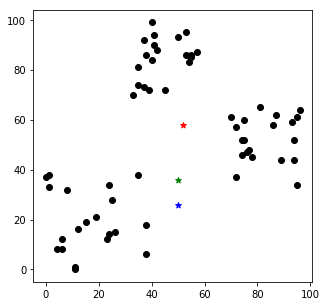

Penyematan--------------------------------------------
catatan 14 14
pusat [[52, 58], [50, 26], [50, 36]] 3
group 2 2 2


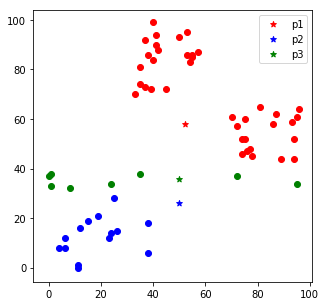

catatan 13 13
pusat [[62.263157894736842, 70.184210526315795], [18.428571428571427, 12.714285714285714], [29.5, 35.375]] 3
group 2 2 2


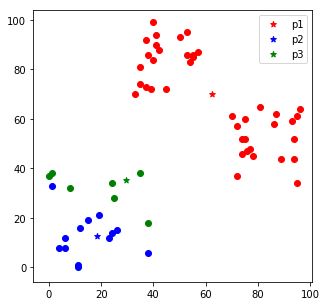

catatan 13 13
pusat [[63.325000000000003, 68.450000000000003], [15.076923076923077, 12.692307692307692], [18.714285714285715, 32.142857142857146]] 3
group 2 2 2


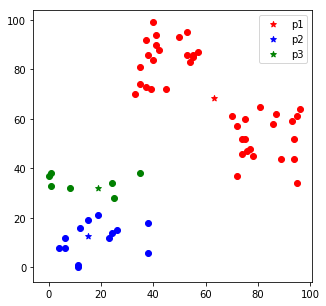

catatan 13 13
pusat [[63.325000000000003, 68.450000000000003], [17.923076923076923, 11.538461538461538], [13.428571428571429, 34.285714285714285]] 3
group 2 2 2


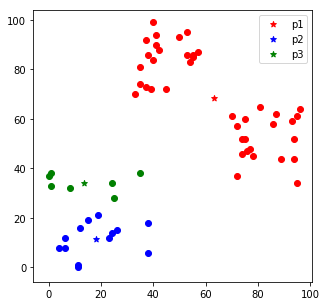

Inisiasi----------------------------------------------


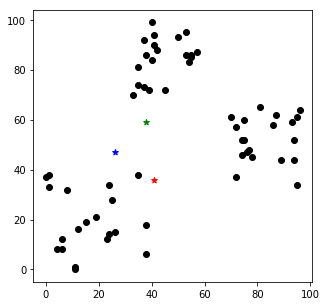

Penyematan--------------------------------------------
catatan 10 10
pusat [[41, 36], [26, 47], [38, 59]] 3
group 2 2 2


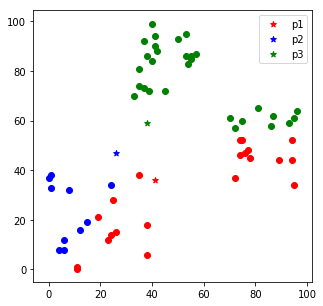

catatan 17 17
pusat [[54.666666666666664, 31.142857142857142], [7.7000000000000002, 23.699999999999999], [56.379310344827587, 77.137931034482762]] 3
group 2 2 2


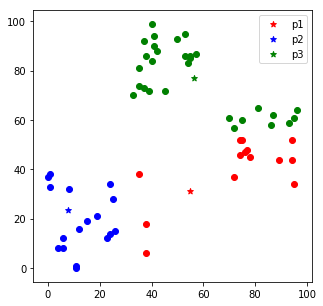

catatan 20 20
pusat [[72.071428571428569, 40.214285714285715], [12.705882352941176, 19.294117647058822], [56.379310344827587, 77.137931034482762]] 3
group 2 2 2


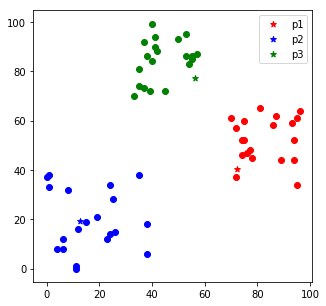

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


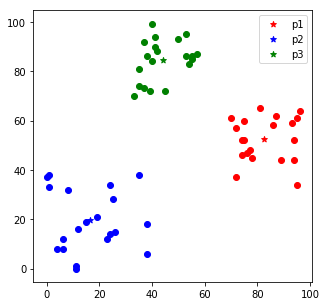

Inisiasi----------------------------------------------


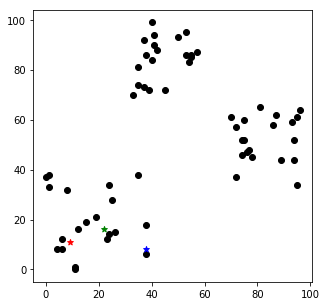

Penyematan--------------------------------------------
catatan 22 22
pusat [[9, 11], [38, 8], [22, 16]] 3
group 2 2 2


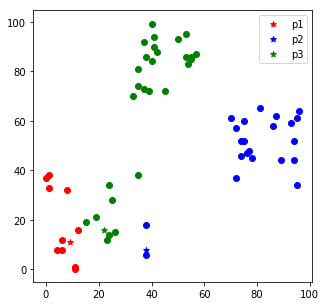

catatan 20 20
pusat [[6.0, 18.5], [78.590909090909093, 48.727272727272727], [38.25, 66.821428571428569]] 3
group 2 2 2


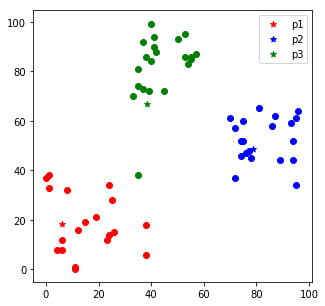

catatan 20 20
pusat [[15.368421052631579, 18.526315789473685], [82.650000000000006, 52.399999999999999], [43.571428571428569, 82.285714285714292]] 3
group 2 2 2


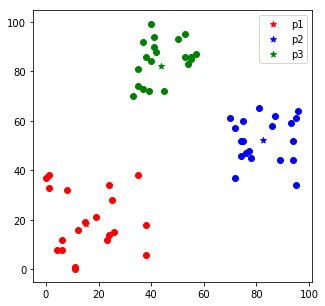

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


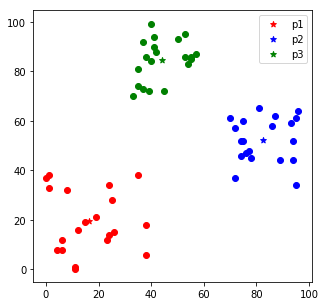

Inisiasi----------------------------------------------


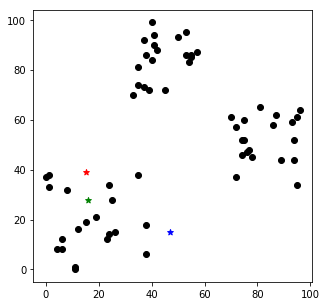

Penyematan--------------------------------------------
catatan 22 22
pusat [[15, 39], [47, 15], [16, 28]] 3
group 2 2 2


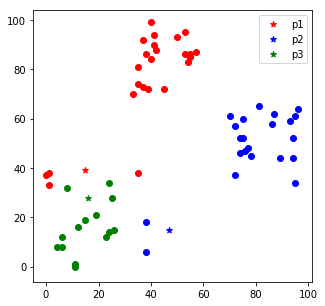

catatan 20 20
pusat [[38.208333333333336, 76.5], [78.590909090909093, 48.727272727272727], [15.285714285714286, 15.714285714285714]] 3
group 2 2 2


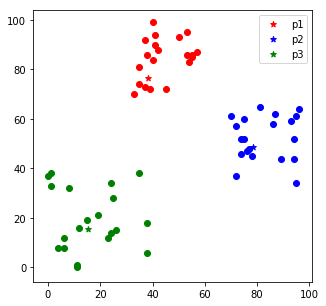

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


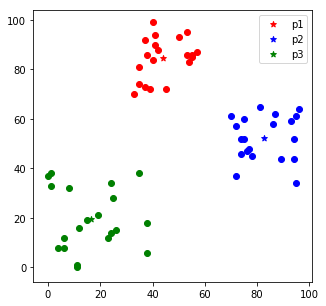

Inisiasi----------------------------------------------


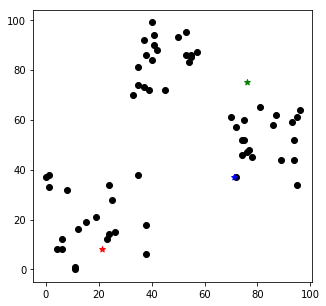

Penyematan--------------------------------------------
catatan 11 11
pusat [[21, 8], [71, 37], [76, 75]] 3
group 2 2 2


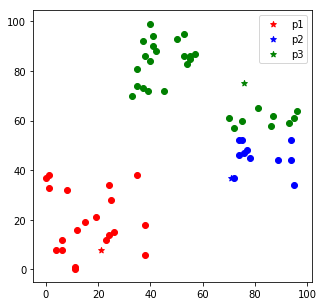

catatan 20 20
pusat [[16.350000000000001, 19.5], [81.63636363636364, 45.545454545454547], [56.379310344827587, 77.137931034482762]] 3
group 2 2 2


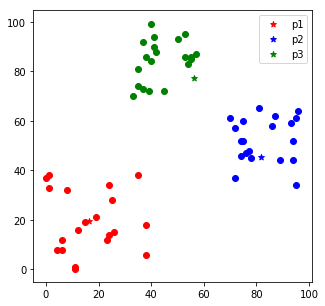

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


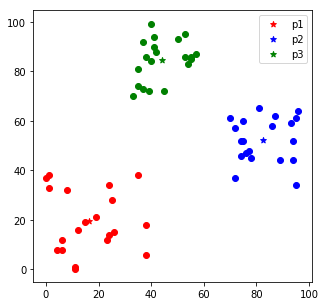

Inisiasi----------------------------------------------


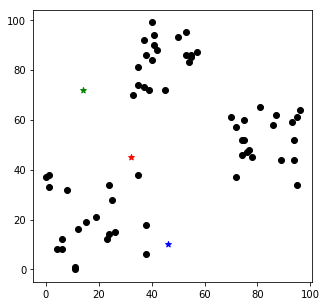

Penyematan--------------------------------------------
catatan 15 15
pusat [[32, 45], [46, 10], [14, 72]] 3
group 2 2 2


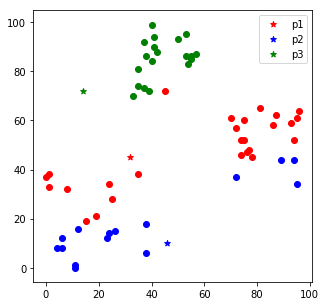

catatan 20 20
pusat [[56.769230769230766, 47.730769230769234], [36.600000000000001, 17.933333333333334], [43.94736842105263, 85.15789473684211]] 3
group 2 2 2


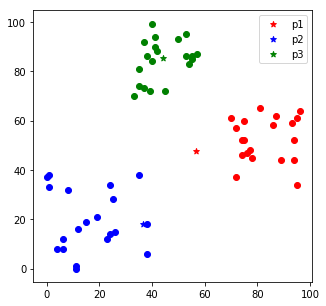

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


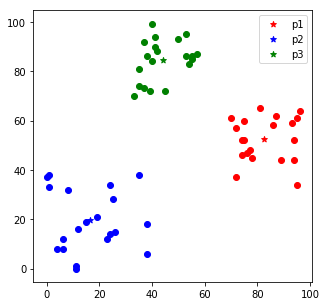

Inisiasi----------------------------------------------


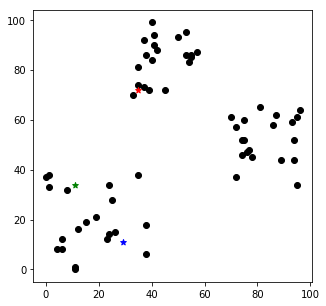

Penyematan--------------------------------------------
catatan 13 13
pusat [[35, 72], [29, 11], [11, 34]] 3
group 2 2 2


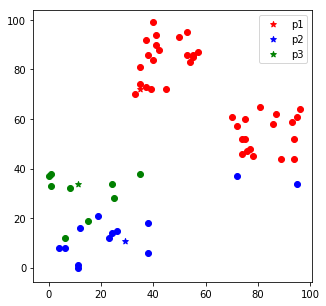

catatan 7 7
pusat [[62.263157894736842, 70.184210526315795], [29.153846153846153, 14.615384615384615], [12.777777777777779, 30.111111111111111]] 3
group 2 2 2


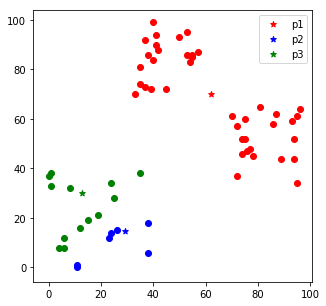

catatan 7 7
pusat [[63.325000000000003, 68.450000000000003], [24.428571428571427, 9.4285714285714288], [12.0, 24.923076923076923]] 3
group 2 2 2


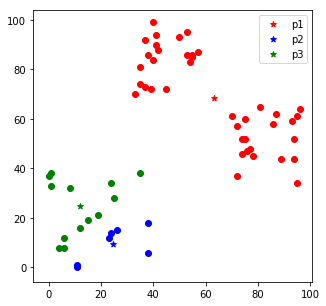

Inisiasi----------------------------------------------


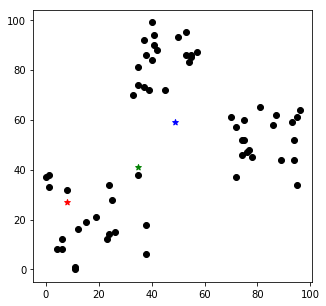

Penyematan--------------------------------------------
catatan 40 40
pusat [[8, 27], [49, 59], [35, 41]] 3
group 2 2 2


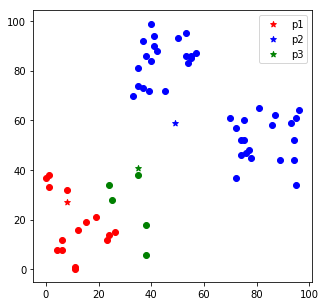

catatan 40 40
pusat [[11.133333333333333, 17.733333333333334], [63.325000000000003, 68.450000000000003], [32.0, 24.800000000000001]] 3
group 2 2 2


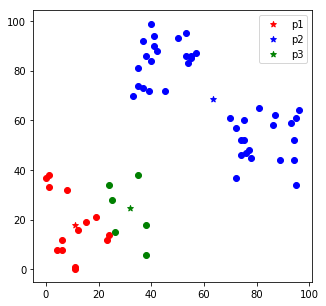

catatan 40 40
pusat [[10.071428571428571, 17.928571428571427], [63.325000000000003, 68.450000000000003], [31.0, 23.166666666666668]] 3
group 2 2 2


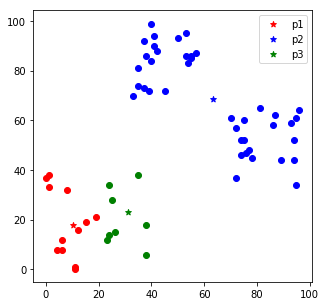

catatan 40 40
pusat [[7.833333333333333, 18.75], [63.325000000000003, 68.450000000000003], [29.125, 20.625]] 3
group 2 2 2


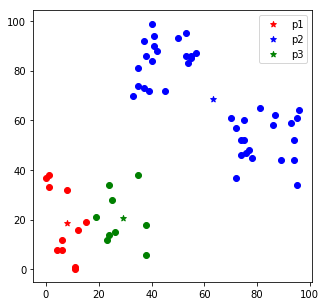

catatan 40 40
pusat [[6.8181818181818183, 18.545454545454547], [63.325000000000003, 68.450000000000003], [28.0, 20.666666666666668]] 3
group 2 2 2


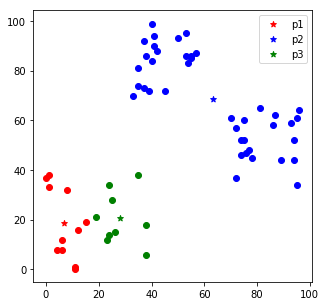

Inisiasi----------------------------------------------


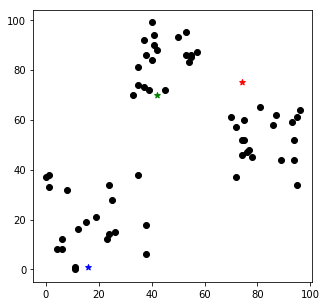

Penyematan--------------------------------------------
catatan 19 19
pusat [[74, 75], [16, 1], [42, 70]] 3
group 2 2 2


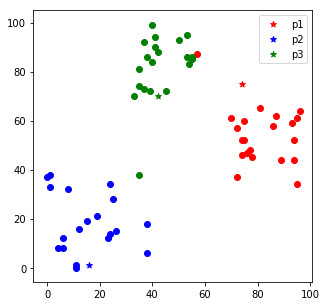

catatan 20 20
pusat [[81.428571428571431, 54.047619047619051], [15.368421052631579, 18.526315789473685], [42.899999999999999, 82.049999999999997]] 3
group 2 2 2


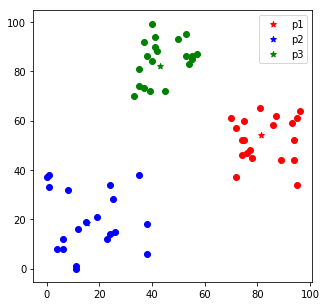

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


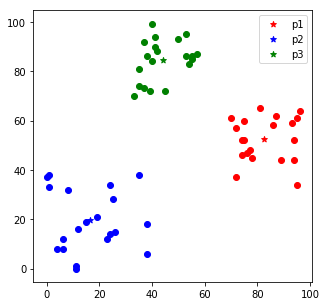

Inisiasi----------------------------------------------


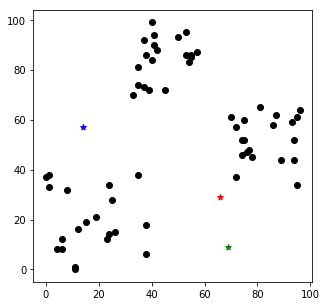

Penyematan--------------------------------------------
catatan 37 37
pusat [[66, 29], [14, 57], [69, 9]] 3
group 2 2 2


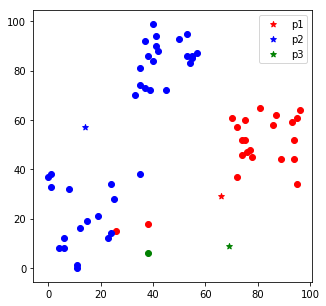

catatan 26 26
pusat [[78.045454545454547, 49.136363636363633], [29.864864864864863, 55.162162162162161], [38.0, 6.0]] 3
group 2 2 2


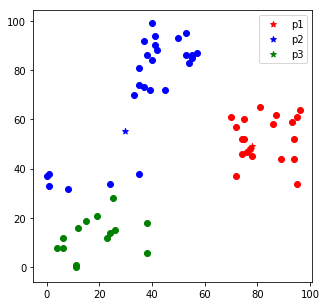

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [36.5, 73.15384615384616], [18.428571428571427, 12.714285714285714]] 3
group 2 2 2


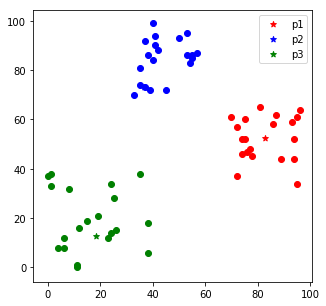

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


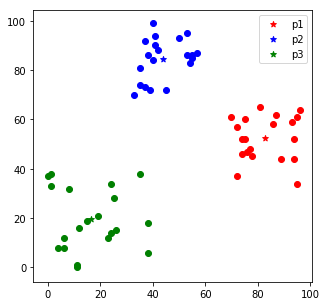

Inisiasi----------------------------------------------


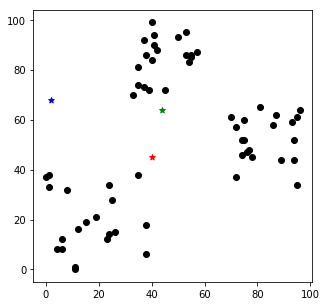

Penyematan--------------------------------------------
catatan 3 3
pusat [[40, 45], [2, 68], [44, 64]] 3
group 2 2 2


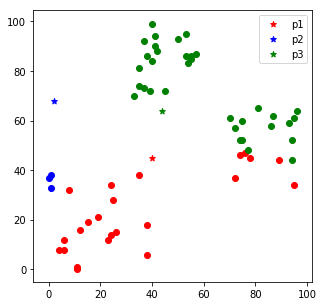

catatan 8 8
pusat [[35.173913043478258, 23.260869565217391], [0.66666666666666663, 36.0], [60.264705882352942, 73.088235294117652]] 3
group 2 2 2


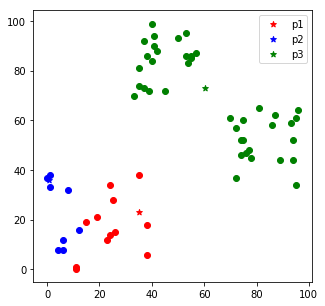

catatan 8 8
pusat [[24.083333333333332, 17.166666666666668], [4.75, 23.0], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


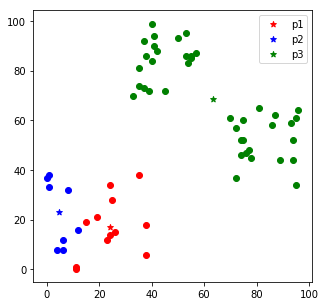

Inisiasi----------------------------------------------


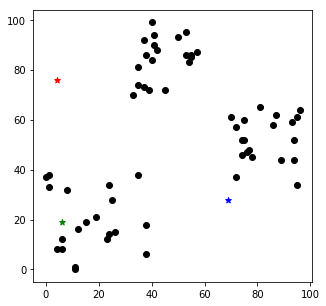

Penyematan--------------------------------------------
catatan 20 20
pusat [[4, 76], [69, 28], [6, 19]] 3
group 2 2 2


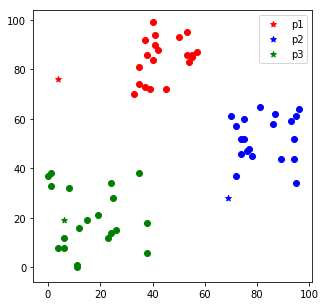

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


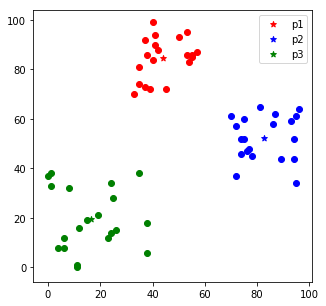

Inisiasi----------------------------------------------


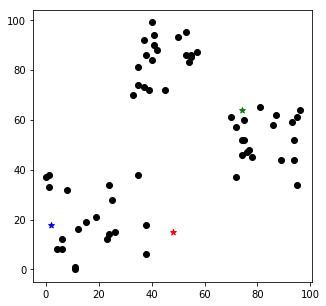

Penyematan--------------------------------------------
catatan 16 16
pusat [[48, 15], [2, 18], [74, 64]] 3
group 2 2 2


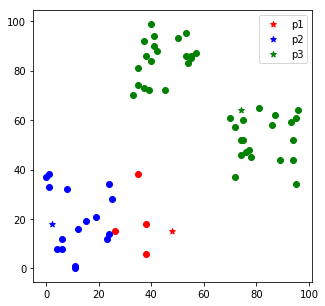

catatan 12 12
pusat [[34.25, 19.25], [11.875, 19.5625], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


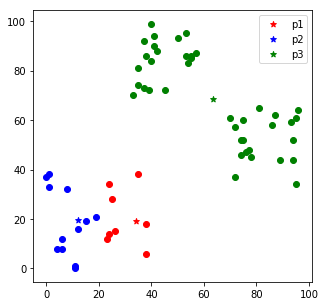

catatan 11 11
pusat [[29.125, 20.625], [7.833333333333333, 18.75], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


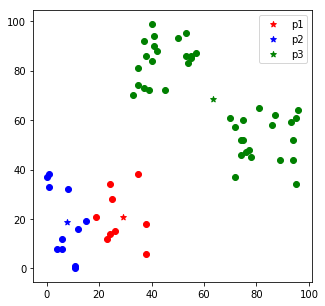

catatan 11 11
pusat [[28.0, 20.666666666666668], [6.8181818181818183, 18.545454545454547], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


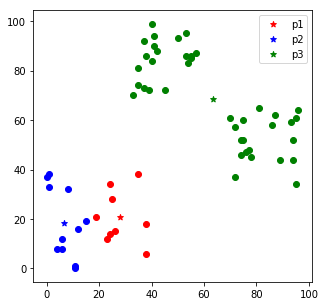

Inisiasi----------------------------------------------


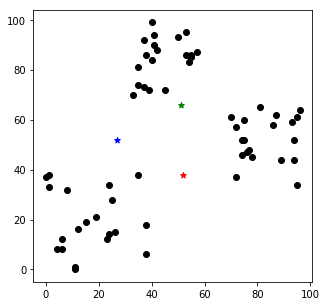

Penyematan--------------------------------------------
catatan 15 15
pusat [[52, 38], [27, 52], [51, 66]] 3
group 2 2 2


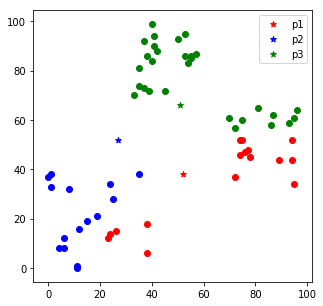

catatan 20 20
pusat [[65.4375, 35.375], [11.866666666666667, 21.666666666666668], [56.379310344827587, 77.137931034482762]] 3
group 2 2 2


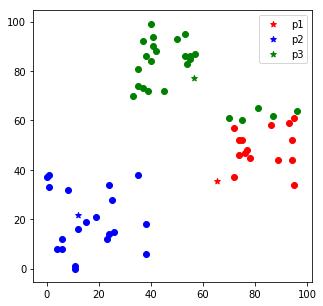

catatan 20 20
pusat [[82.933333333333337, 49.06666666666667], [16.350000000000001, 19.5], [51.560000000000002, 80.079999999999998]] 3
group 2 2 2


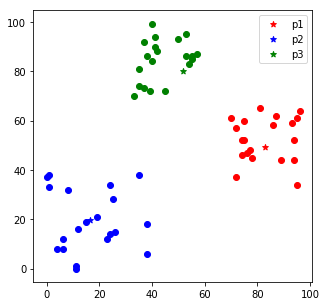

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


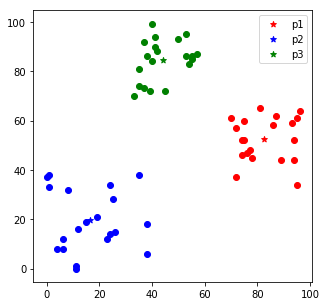

Inisiasi----------------------------------------------


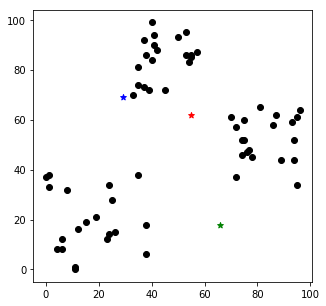

Penyematan--------------------------------------------
catatan 18 18
pusat [[55, 62], [29, 69], [66, 18]] 3
group 2 2 2


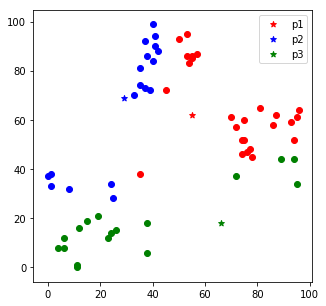

catatan 14 14
pusat [[70.400000000000006, 64.560000000000002], [28.722222222222221, 66.944444444444443], [34.294117647058826, 18.176470588235293]] 3
group 2 2 2


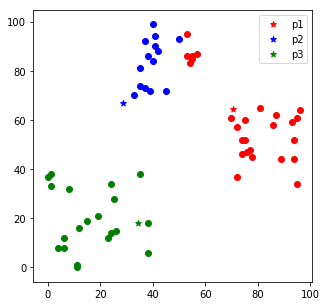

catatan 20 20
pusat [[76.15384615384616, 60.384615384615387], [39.5, 83.428571428571431], [16.350000000000001, 19.5]] 3
group 2 2 2


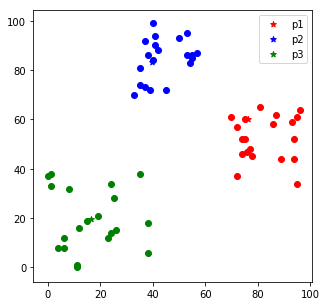

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


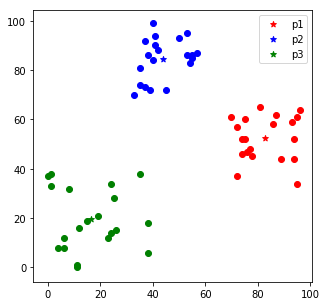

Inisiasi----------------------------------------------


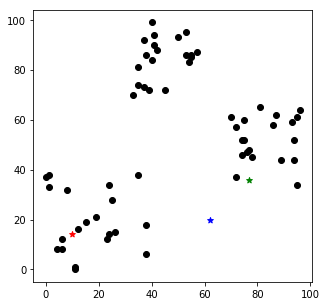

Penyematan--------------------------------------------
catatan 3 3
pusat [[10, 14], [62, 20], [77, 36]] 3
group 2 2 2


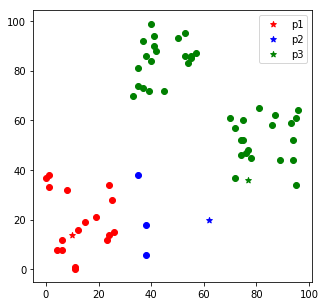

catatan 5 5
pusat [[12.705882352941176, 19.294117647058822], [37.0, 20.666666666666668], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


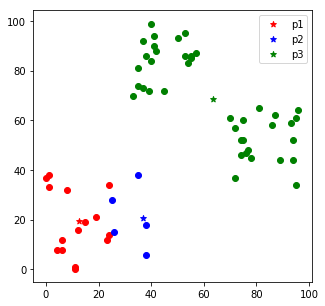

catatan 8 8
pusat [[11.0, 19.0], [32.399999999999999, 21.0], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


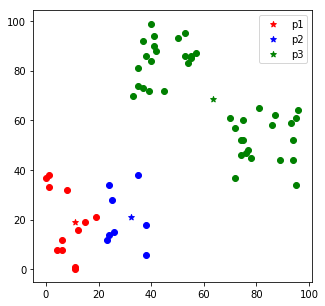

catatan 9 9
pusat [[7.833333333333333, 18.75], [29.125, 20.625], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


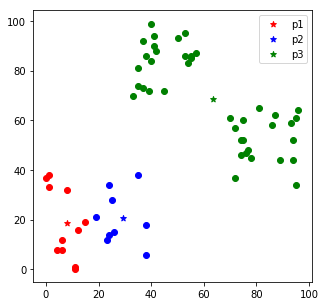

catatan 9 9
pusat [[6.8181818181818183, 18.545454545454547], [28.0, 20.666666666666668], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


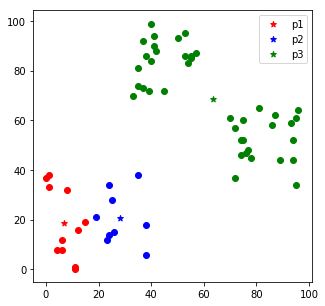

Inisiasi----------------------------------------------


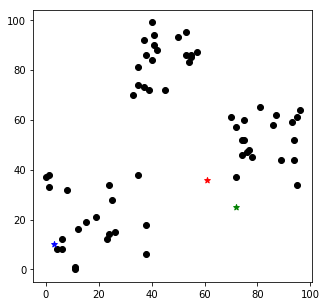

Penyematan--------------------------------------------
catatan 18 18
pusat [[61, 36], [3, 10], [72, 25]] 3
group 2 2 2


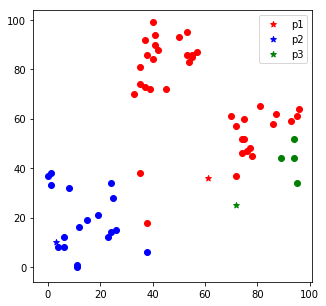

catatan 20 20
pusat [[58.789473684210527, 68.94736842105263], [14.111111111111111, 18.555555555555557], [93.0, 43.5]] 3
group 2 2 2


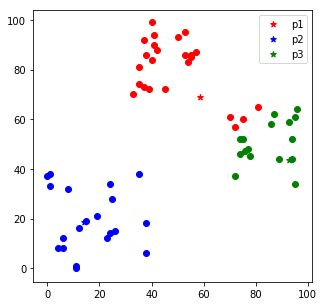

catatan 20 20
pusat [[49.083333333333336, 80.541666666666671], [16.350000000000001, 19.5], [84.6875, 50.3125]] 3
group 2 2 2


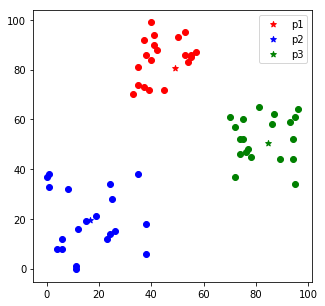

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


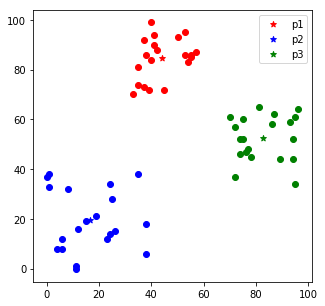

Inisiasi----------------------------------------------


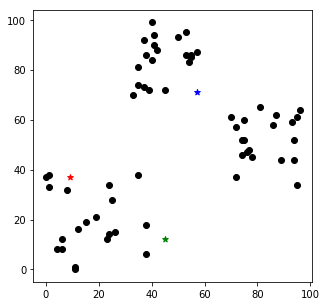

Penyematan--------------------------------------------
catatan 39 39
pusat [[9, 37], [57, 71], [45, 12]] 3
group 2 2 2


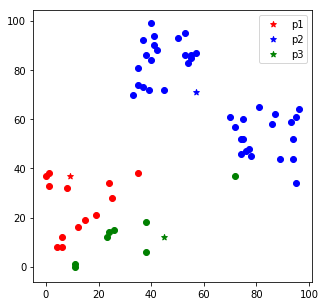

catatan 40 40
pusat [[12.0, 24.923076923076923], [63.102564102564102, 69.256410256410263], [30.375, 12.875]] 3
group 2 2 2


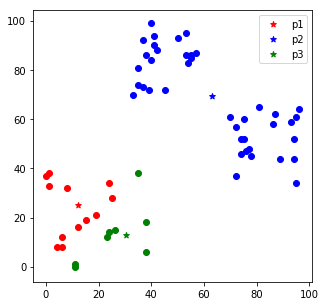

catatan 40 40
pusat [[10.083333333333334, 23.833333333333332], [63.325000000000003, 68.450000000000003], [25.75, 13.0]] 3
group 2 2 2


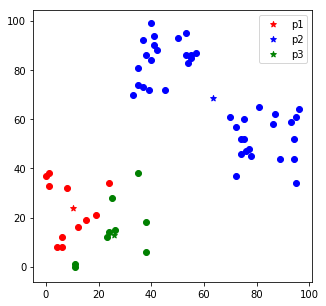

catatan 40 40
pusat [[8.7272727272727266, 23.454545454545453], [63.325000000000003, 68.450000000000003], [25.666666666666668, 14.666666666666666]] 3
group 2 2 2


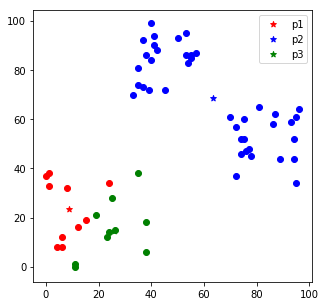

catatan 40 40
pusat [[7.7000000000000002, 23.699999999999999], [63.325000000000003, 68.450000000000003], [25.0, 15.300000000000001]] 3
group 2 2 2


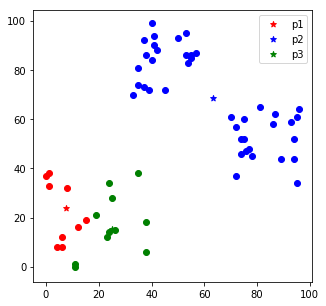

catatan 40 40
pusat [[5.8888888888888893, 22.555555555555557], [63.325000000000003, 68.450000000000003], [24.90909090909091, 17.0]] 3
group 2 2 2


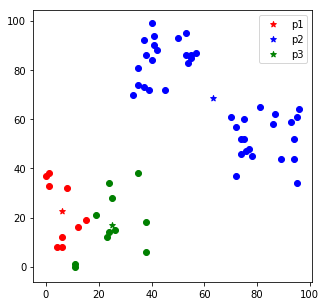

Inisiasi----------------------------------------------


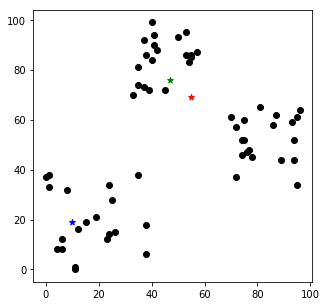

Penyematan--------------------------------------------
catatan 20 20
pusat [[55, 69], [10, 19], [47, 76]] 3
group 2 2 2


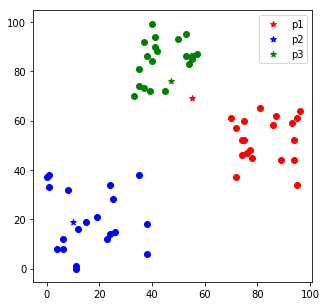

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


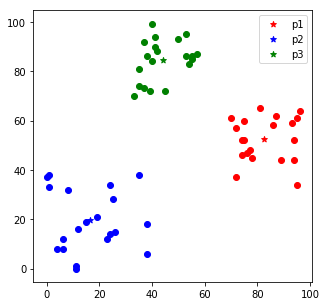

Inisiasi----------------------------------------------


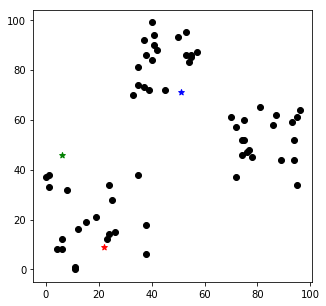

Penyematan--------------------------------------------
catatan 40 40
pusat [[22, 9], [51, 71], [6, 46]] 3
group 2 2 2


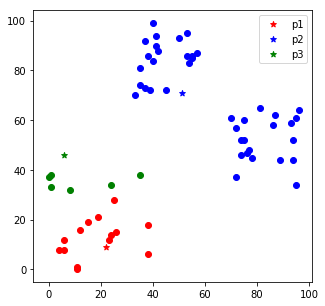

catatan 40 40
pusat [[18.428571428571427, 12.714285714285714], [63.325000000000003, 68.450000000000003], [11.5, 35.333333333333336]] 3
group 2 2 2


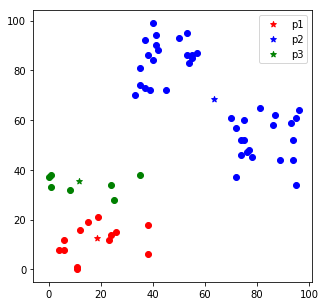

catatan 40 40
pusat [[17.923076923076923, 11.538461538461538], [63.325000000000003, 68.450000000000003], [13.428571428571429, 34.285714285714285]] 3
group 2 2 2


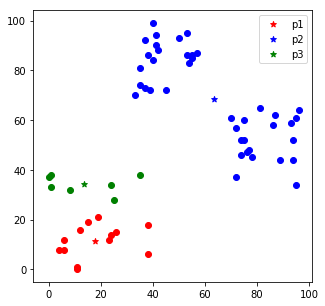

Inisiasi----------------------------------------------


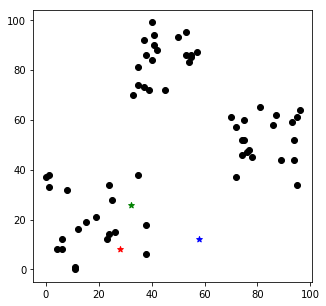

Penyematan--------------------------------------------
catatan 20 20
pusat [[28, 8], [58, 12], [32, 26]] 3
group 2 2 2


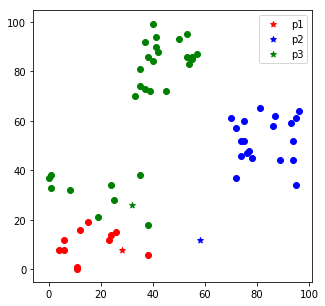

catatan 20 20
pusat [[16.0, 10.090909090909092], [82.650000000000006, 52.399999999999999], [35.551724137931032, 67.896551724137936]] 3
group 2 2 2


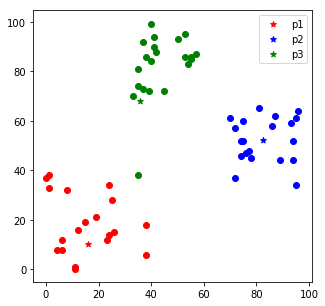

catatan 20 20
pusat [[15.368421052631579, 18.526315789473685], [82.650000000000006, 52.399999999999999], [43.571428571428569, 82.285714285714292]] 3
group 2 2 2


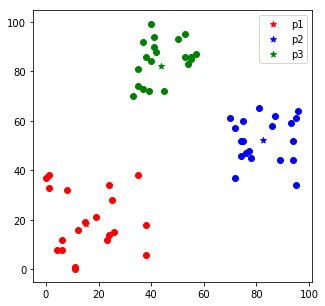

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


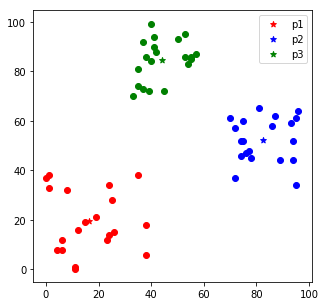

Inisiasi----------------------------------------------


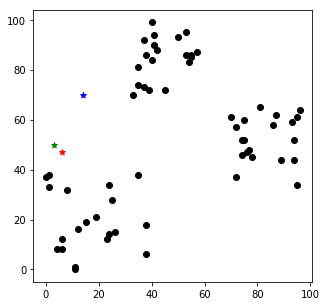

Penyematan--------------------------------------------
catatan 40 40
pusat [[6, 47], [14, 70], [3, 50]] 3
group 2 2 2


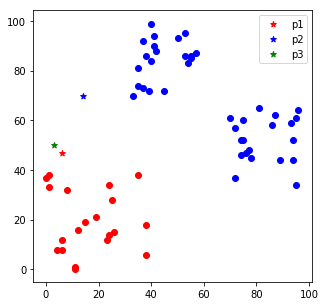

catatan 40 40
pusat [[16.350000000000001, 19.5], [63.325000000000003, 68.450000000000003], [3.0, 50.0]] 3
group 2 2 2


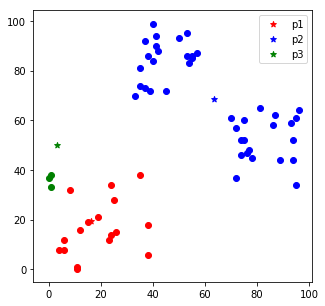

catatan 40 40
pusat [[19.117647058823529, 16.588235294117649], [63.325000000000003, 68.450000000000003], [0.66666666666666663, 36.0]] 3
group 2 2 2


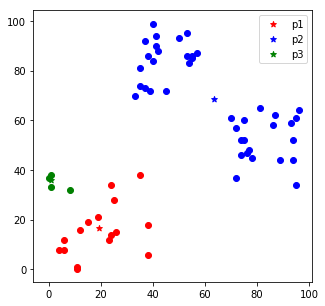

catatan 40 40
pusat [[19.8125, 15.625], [63.325000000000003, 68.450000000000003], [2.5, 35.0]] 3
group 2 2 2


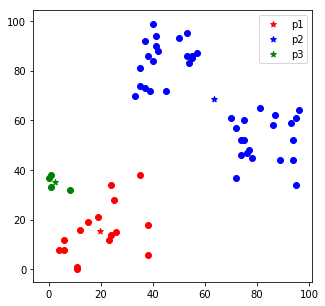

Inisiasi----------------------------------------------


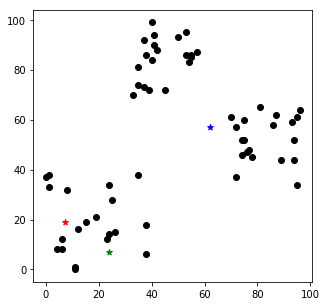

Penyematan--------------------------------------------
catatan 40 40
pusat [[7, 19], [62, 57], [24, 7]] 3
group 2 2 2


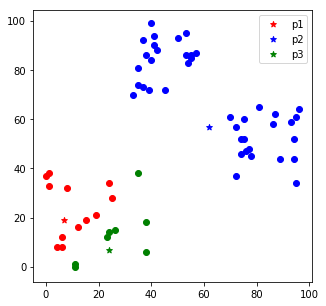

catatan 40 40
pusat [[10.083333333333334, 23.833333333333332], [63.325000000000003, 68.450000000000003], [25.75, 13.0]] 3
group 2 2 2


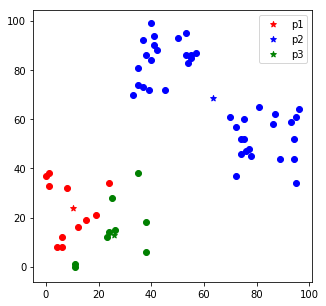

catatan 40 40
pusat [[8.7272727272727266, 23.454545454545453], [63.325000000000003, 68.450000000000003], [25.666666666666668, 14.666666666666666]] 3
group 2 2 2


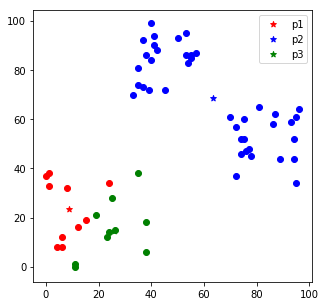

catatan 40 40
pusat [[7.7000000000000002, 23.699999999999999], [63.325000000000003, 68.450000000000003], [25.0, 15.300000000000001]] 3
group 2 2 2


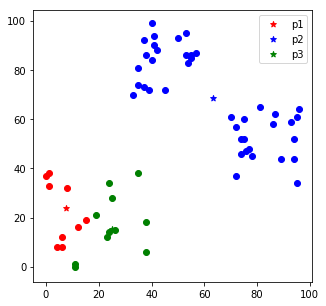

catatan 40 40
pusat [[5.8888888888888893, 22.555555555555557], [63.325000000000003, 68.450000000000003], [24.90909090909091, 17.0]] 3
group 2 2 2


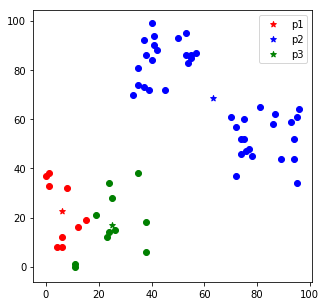

Inisiasi----------------------------------------------


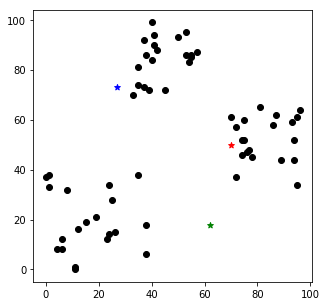

Penyematan--------------------------------------------
catatan 25 25
pusat [[70, 50], [27, 73], [62, 18]] 3
group 2 2 2


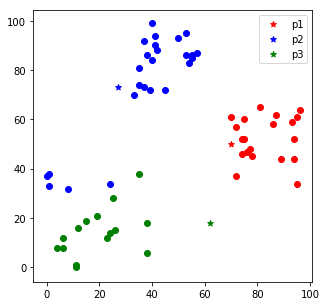

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [36.560000000000002, 74.560000000000002], [19.533333333333335, 14.4]] 3
group 2 2 2


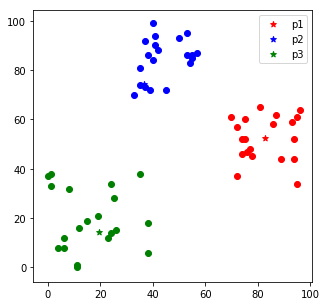

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


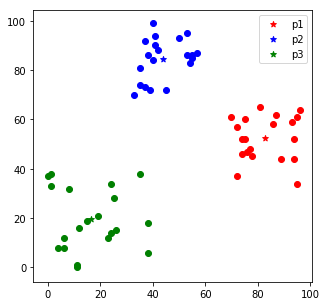

Inisiasi----------------------------------------------


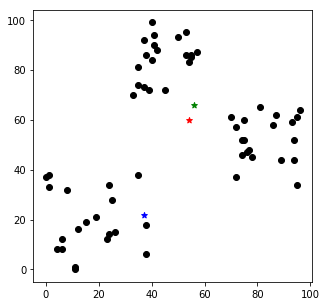

Penyematan--------------------------------------------
catatan 20 20
pusat [[54, 60], [37, 22], [56, 66]] 3
group 2 2 2


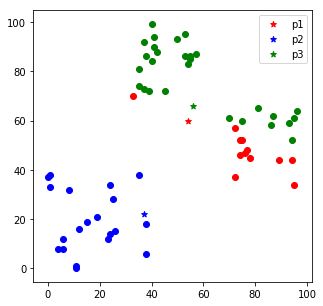

catatan 20 20
pusat [[75.75, 48.0], [16.350000000000001, 19.5], [58.0, 77.214285714285708]] 3
group 2 2 2


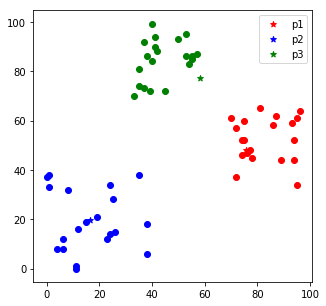

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


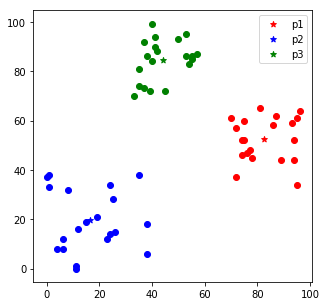

Inisiasi----------------------------------------------


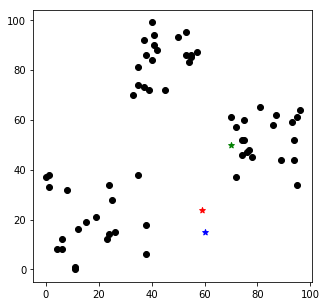

Penyematan--------------------------------------------
catatan 9 9
pusat [[59, 24], [60, 15], [70, 50]] 3
group 2 2 2


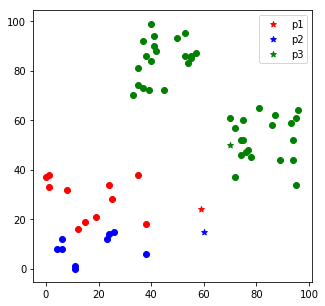

catatan 11 11
pusat [[16.181818181818183, 28.545454545454547], [16.555555555555557, 8.4444444444444446], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


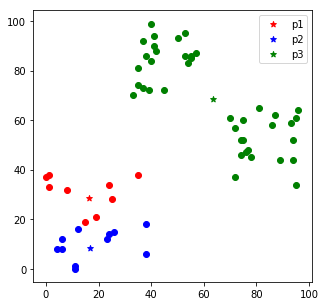

catatan 13 13
pusat [[14.222222222222221, 31.111111111111111], [18.09090909090909, 10.0], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


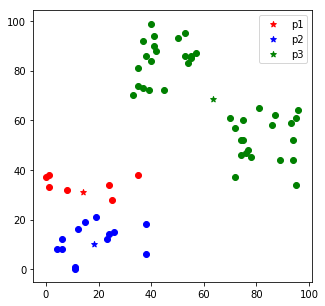

catatan 13 13
pusat [[13.428571428571429, 34.285714285714285], [17.923076923076923, 11.538461538461538], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


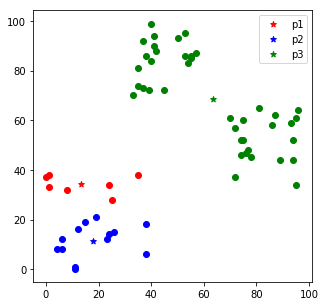

Inisiasi----------------------------------------------


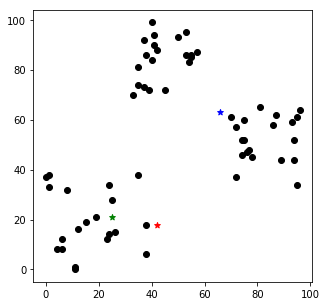

Penyematan--------------------------------------------
catatan 40 40
pusat [[42, 18], [66, 63], [25, 21]] 3
group 2 2 2


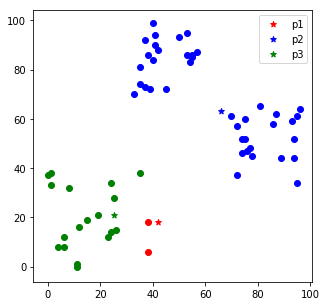

catatan 40 40
pusat [[38.0, 12.0], [63.325000000000003, 68.450000000000003], [13.944444444444445, 20.333333333333332]] 3
group 2 2 2


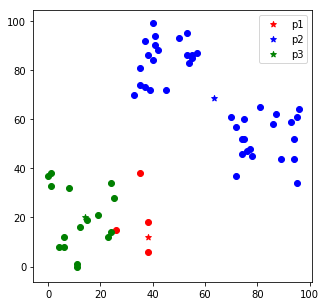

catatan 40 40
pusat [[34.25, 19.25], [63.325000000000003, 68.450000000000003], [11.875, 19.5625]] 3
group 2 2 2


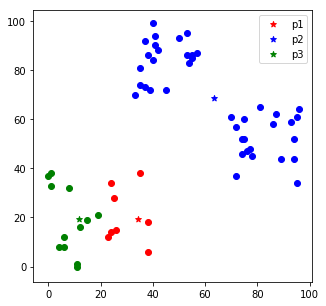

catatan 40 40
pusat [[29.125, 20.625], [63.325000000000003, 68.450000000000003], [7.833333333333333, 18.75]] 3
group 2 2 2


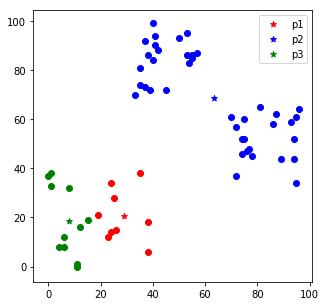

catatan 40 40
pusat [[28.0, 20.666666666666668], [63.325000000000003, 68.450000000000003], [6.8181818181818183, 18.545454545454547]] 3
group 2 2 2


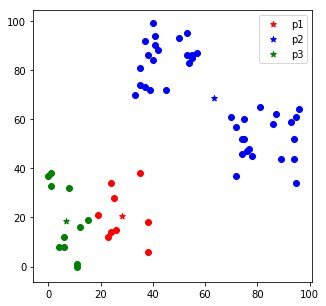

Inisiasi----------------------------------------------


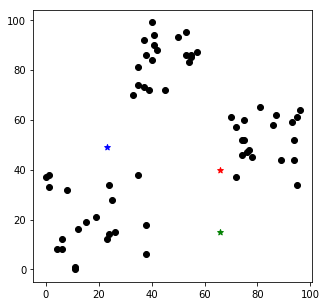

Penyematan--------------------------------------------
catatan 34 34
pusat [[66, 40], [23, 49], [66, 15]] 3
group 2 2 2


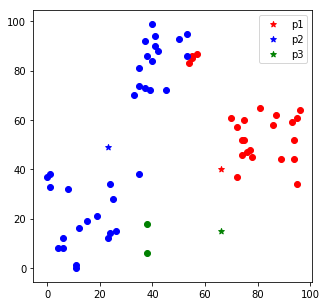

catatan 19 19
pusat [[78.083333333333329, 57.875], [26.764705882352942, 50.441176470588232], [38.0, 12.0]] 3
group 2 2 2


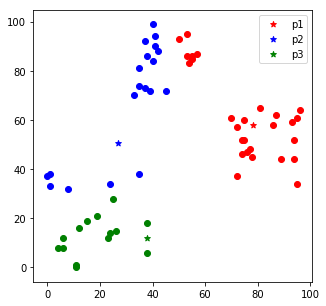

catatan 20 20
pusat [[75.18518518518519, 61.592592592592595], [30.105263157894736, 67.736842105263165], [18.428571428571427, 12.714285714285714]] 3
group 2 2 2


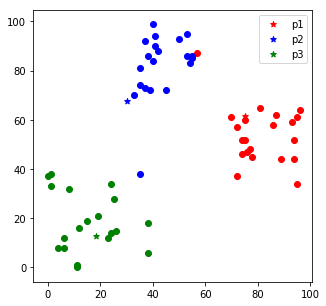

catatan 20 20
pusat [[81.428571428571431, 54.047619047619051], [42.899999999999999, 82.049999999999997], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


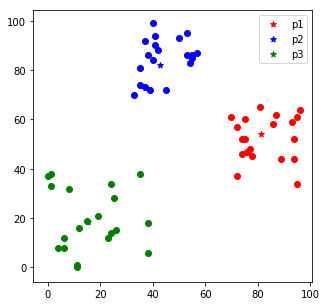

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


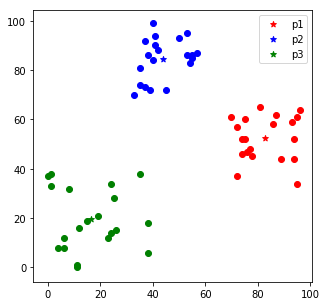

Inisiasi----------------------------------------------


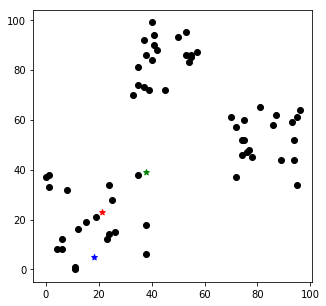

Penyematan--------------------------------------------
catatan 7 7
pusat [[21, 23], [18, 5], [38, 39]] 3
group 2 2 2


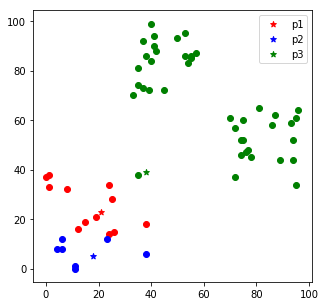

catatan 9 9
pusat [[16.083333333333332, 25.416666666666668], [14.142857142857142, 6.7142857142857144], [62.634146341463413, 67.707317073170728]] 3
group 2 2 2


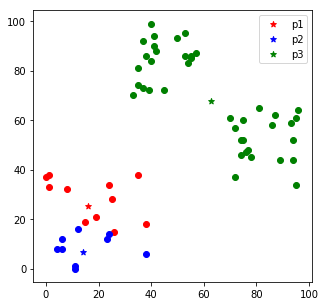

catatan 10 10
pusat [[17.454545454545453, 28.454545454545453], [15.0, 8.5555555555555554], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


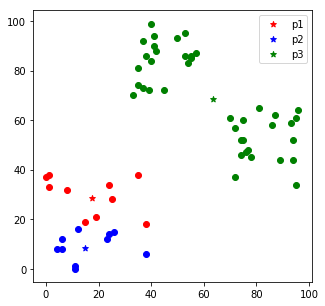

catatan 12 12
pusat [[16.600000000000001, 29.800000000000001], [16.100000000000001, 9.1999999999999993], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


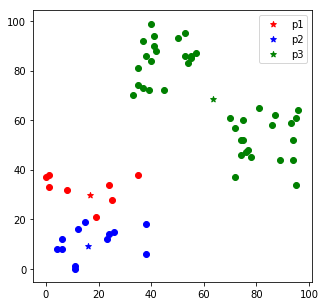

catatan 13 13
pusat [[14.125, 32.625], [17.833333333333332, 10.75], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


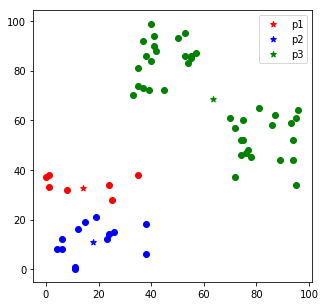

catatan 13 13
pusat [[13.428571428571429, 34.285714285714285], [17.923076923076923, 11.538461538461538], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


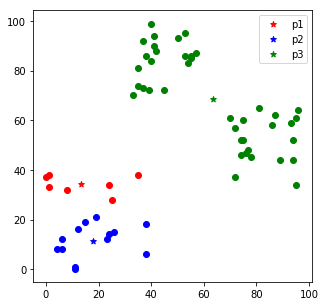

Inisiasi----------------------------------------------


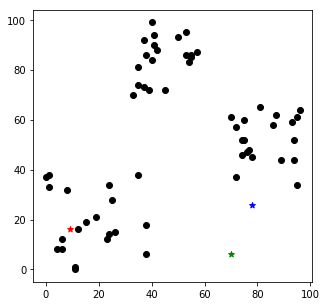

Penyematan--------------------------------------------
catatan 38 38
pusat [[9, 16], [78, 26], [70, 6]] 3
group 2 2 2


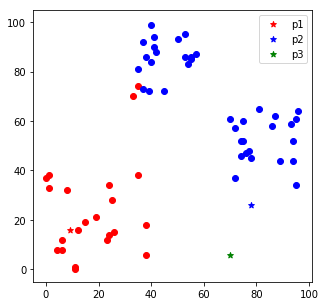

catatan 38 38
pusat [[17.954545454545453, 24.272727272727273], [64.868421052631575, 68.263157894736835], [70.0, 6.0]] 3
group 2 2 2


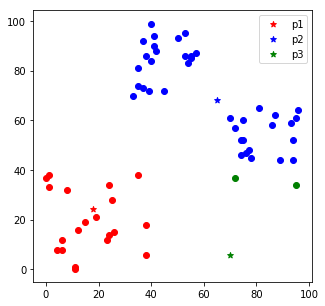

catatan 25 25
pusat [[16.350000000000001, 19.5], [62.263157894736842, 70.184210526315795], [83.5, 35.5]] 3
group 2 2 2


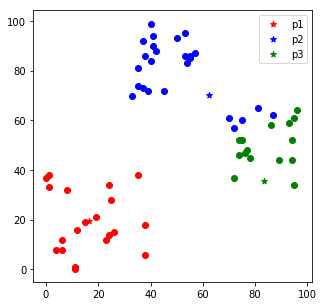

catatan 20 20
pusat [[16.350000000000001, 19.5], [50.600000000000001, 79.799999999999997], [84.533333333333331, 49.533333333333331]] 3
group 2 2 2


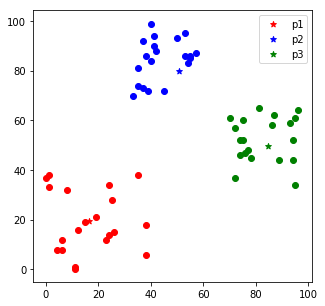

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


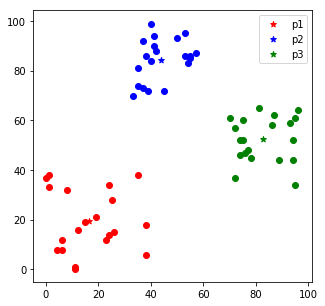

Inisiasi----------------------------------------------


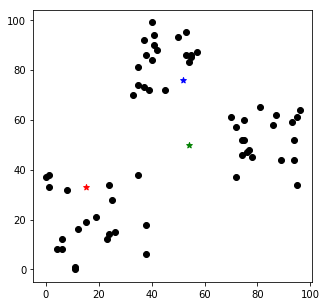

Penyematan--------------------------------------------
catatan 20 20
pusat [[15, 33], [52, 76], [54, 50]] 3
group 2 2 2


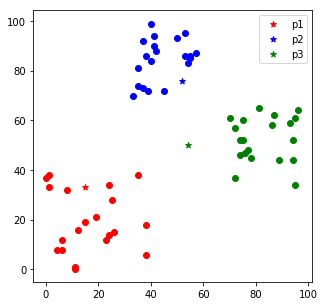

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


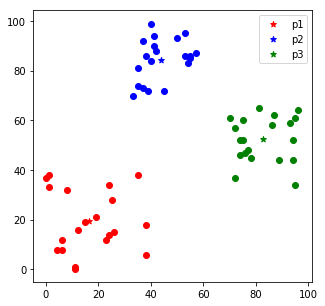

Inisiasi----------------------------------------------


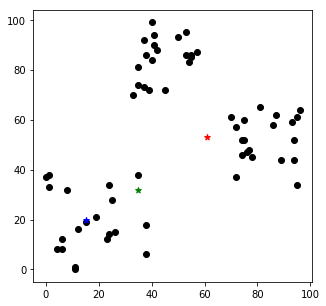

Penyematan--------------------------------------------
catatan 15 15
pusat [[61, 53], [15, 20], [35, 32]] 3
group 2 2 2


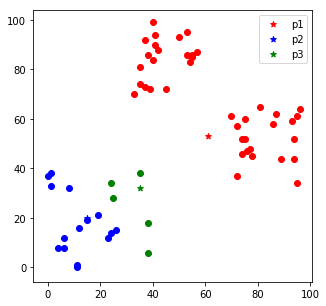

catatan 14 14
pusat [[63.325000000000003, 68.450000000000003], [11.133333333333333, 17.733333333333334], [32.0, 24.800000000000001]] 3
group 2 2 2


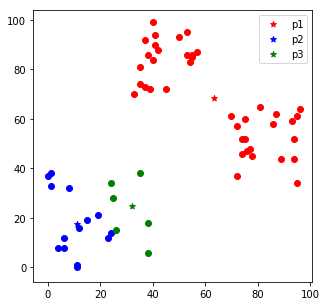

catatan 12 12
pusat [[63.325000000000003, 68.450000000000003], [10.071428571428571, 17.928571428571427], [31.0, 23.166666666666668]] 3
group 2 2 2


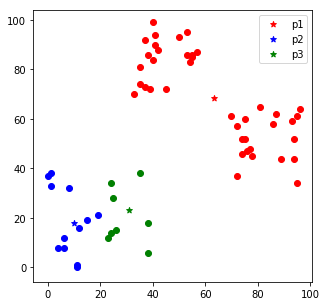

catatan 11 11
pusat [[63.325000000000003, 68.450000000000003], [7.833333333333333, 18.75], [29.125, 20.625]] 3
group 2 2 2


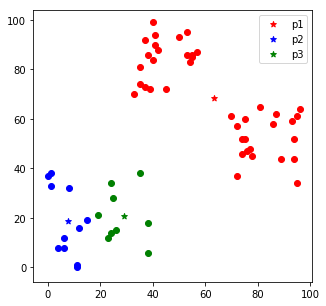

catatan 11 11
pusat [[63.325000000000003, 68.450000000000003], [6.8181818181818183, 18.545454545454547], [28.0, 20.666666666666668]] 3
group 2 2 2


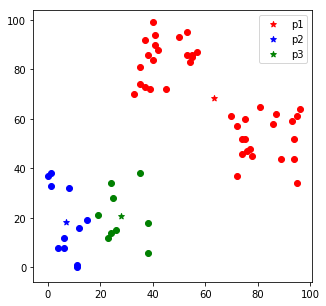

Inisiasi----------------------------------------------


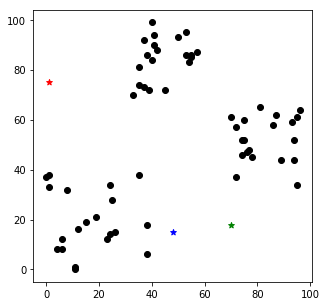

Penyematan--------------------------------------------
catatan 17 17
pusat [[1, 75], [48, 15], [70, 18]] 3
group 2 2 2


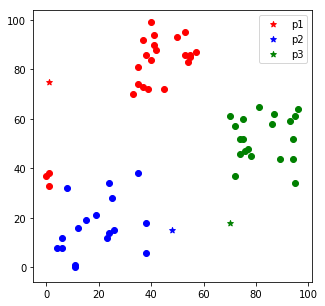

catatan 20 20
pusat [[38.347826086956523, 78.173913043478265], [19.117647058823529, 16.588235294117649], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


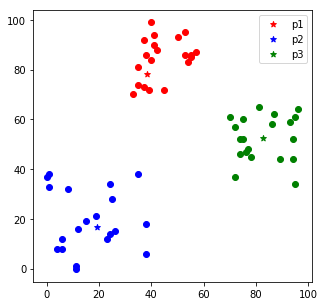

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


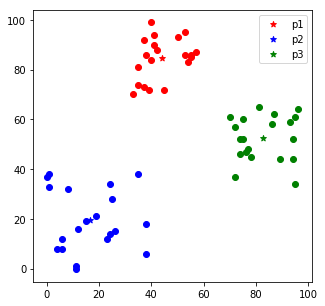

Inisiasi----------------------------------------------


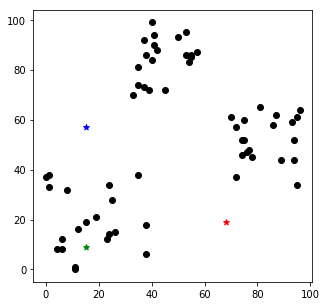

Penyematan--------------------------------------------
catatan 25 25
pusat [[68, 19], [15, 57], [15, 9]] 3
group 2 2 2


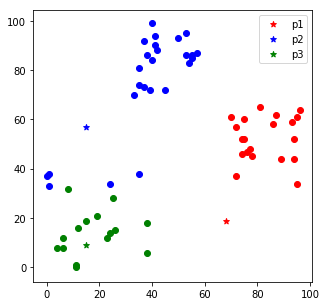

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [37.640000000000001, 74.799999999999997], [17.733333333333334, 14.0]] 3
group 2 2 2


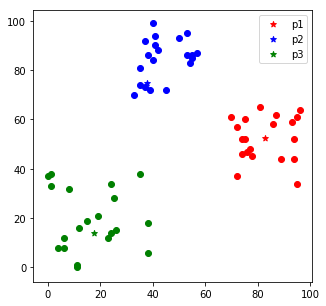

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


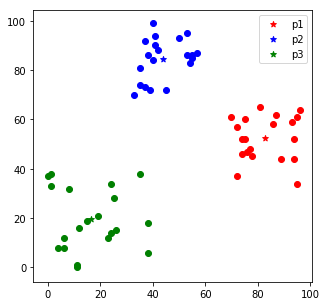

Inisiasi----------------------------------------------


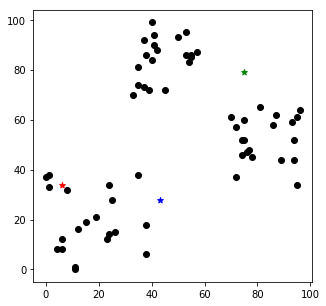

Penyematan--------------------------------------------
catatan 8 8
pusat [[6, 34], [43, 28], [75, 79]] 3
group 2 2 2


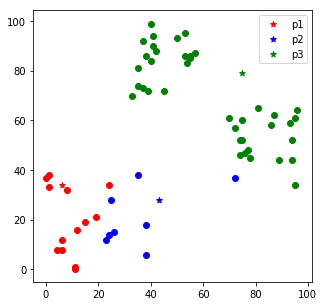

catatan 8 8
pusat [[9.0769230769230766, 19.923076923076923], [35.125, 21.0], [63.102564102564102, 69.256410256410263]] 3
group 2 2 2


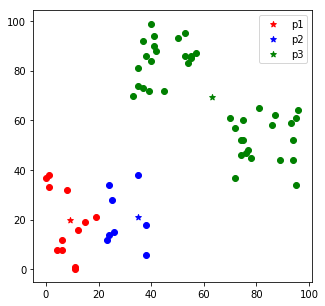

catatan 9 9
pusat [[7.833333333333333, 18.75], [29.125, 20.625], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


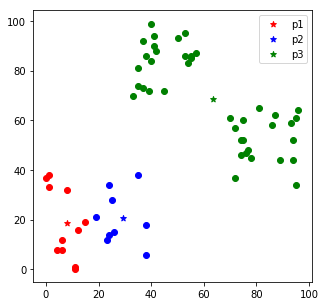

catatan 9 9
pusat [[6.8181818181818183, 18.545454545454547], [28.0, 20.666666666666668], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


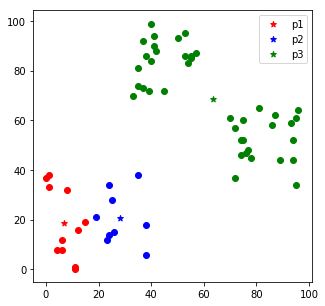

Inisiasi----------------------------------------------


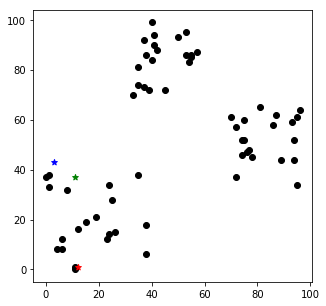

Penyematan--------------------------------------------
catatan 11 11
pusat [[12, 1], [3, 43], [11, 37]] 3
group 2 2 2


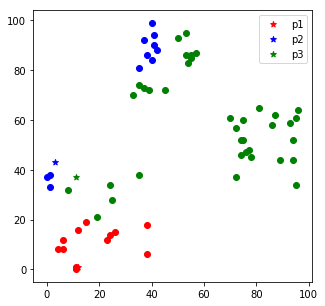

catatan 16 16
pusat [[17.833333333333332, 10.75], [28.727272727272727, 74.727272727272734], [62.972972972972975, 58.837837837837839]] 3
group 2 2 2


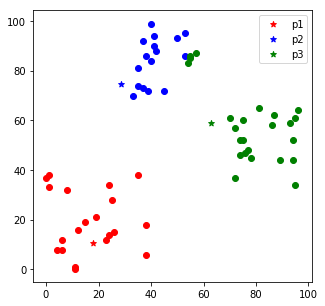

catatan 20 20
pusat [[16.350000000000001, 19.5], [41.1875, 84.3125], [78.083333333333329, 57.875]] 3
group 2 2 2


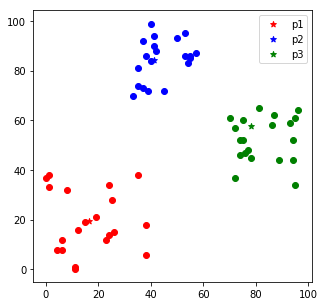

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


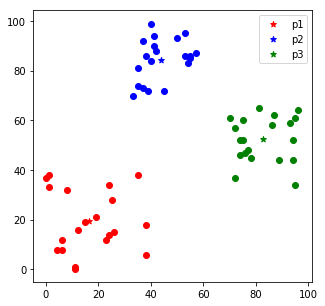

Inisiasi----------------------------------------------


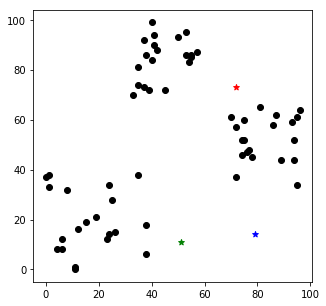

Penyematan--------------------------------------------
catatan 4 4
pusat [[72, 73], [79, 14], [51, 11]] 3
group 2 2 2


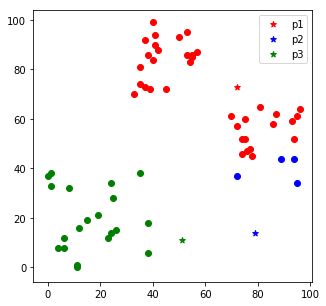

catatan 16 16
pusat [[60.638888888888886, 71.638888888888886], [87.5, 39.75], [16.350000000000001, 19.5]] 3
group 2 2 2


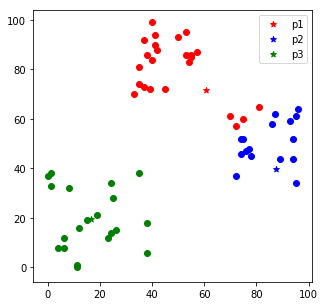

catatan 20 20
pusat [[49.083333333333336, 80.541666666666671], [84.6875, 50.3125], [16.350000000000001, 19.5]] 3
group 2 2 2


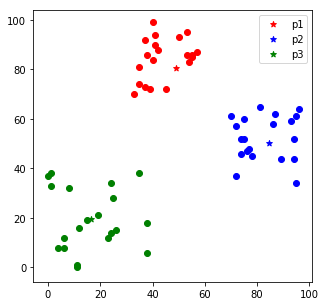

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


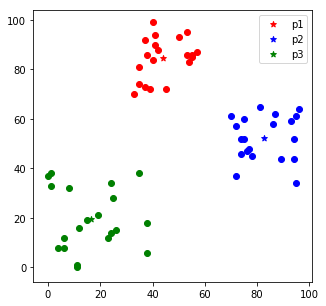

Inisiasi----------------------------------------------


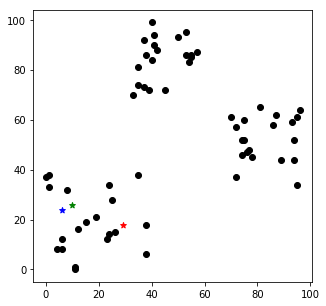

Penyematan--------------------------------------------
catatan 9 9
pusat [[29, 18], [6, 24], [10, 26]] 3
group 2 2 2


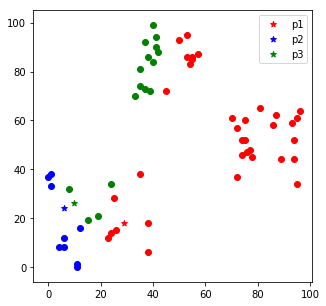

catatan 19 19
pusat [[65.257142857142853, 53.314285714285717], [5.7777777777777777, 17.0], [32.75, 69.3125]] 3
group 2 2 2


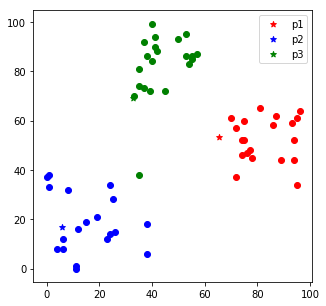

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [15.368421052631579, 18.526315789473685], [43.571428571428569, 82.285714285714292]] 3
group 2 2 2


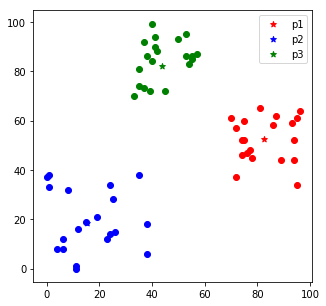

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


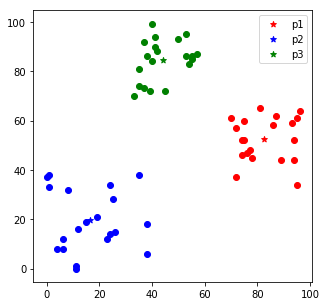

Inisiasi----------------------------------------------


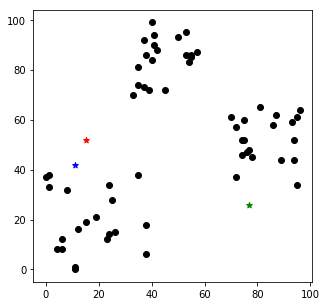

Penyematan--------------------------------------------
catatan 19 19
pusat [[15, 52], [11, 42], [77, 26]] 3
group 2 2 2


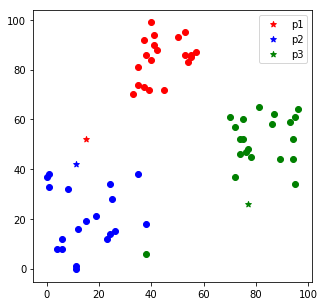

catatan 20 20
pusat [[44.0, 84.5], [15.210526315789474, 20.210526315789473], [80.523809523809518, 50.19047619047619]] 3
group 2 2 2


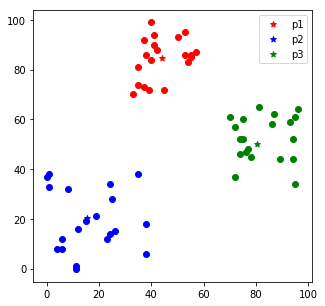

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


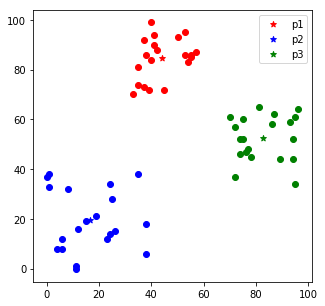

Inisiasi----------------------------------------------


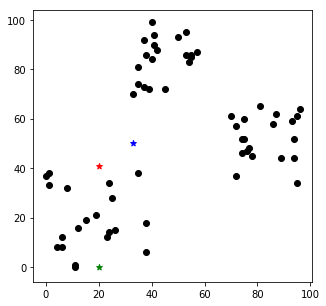

Penyematan--------------------------------------------
catatan 41 41
pusat [[20, 41], [33, 50], [20, 0]] 3
group 2 2 2


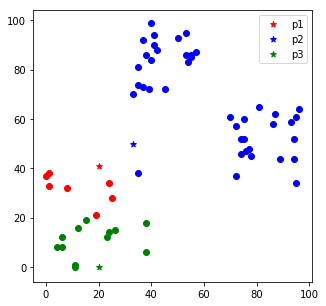

catatan 40 40
pusat [[11.142857142857142, 31.857142857142858], [62.634146341463413, 67.707317073170728], [17.833333333333332, 10.75]] 3
group 2 2 2


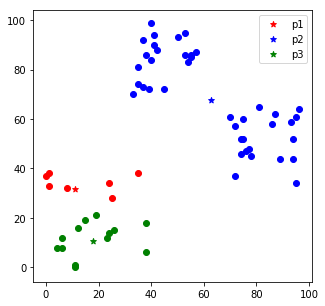

catatan 40 40
pusat [[13.428571428571429, 34.285714285714285], [63.325000000000003, 68.450000000000003], [17.923076923076923, 11.538461538461538]] 3
group 2 2 2


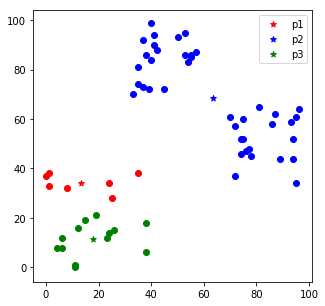

Inisiasi----------------------------------------------


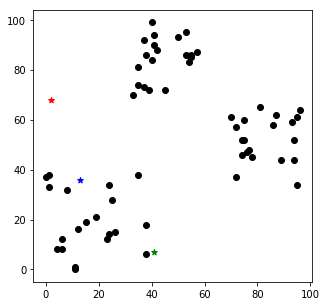

Penyematan--------------------------------------------
catatan 13 13
pusat [[2, 68], [13, 36], [41, 7]] 3
group 2 2 2


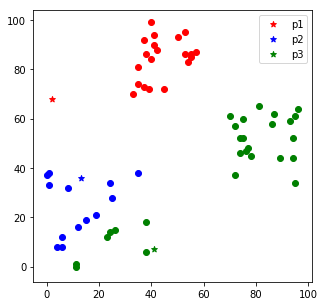

catatan 20 20
pusat [[44.0, 84.5], [12.0, 24.923076923076923], [67.555555555555557, 41.25925925925926]] 3
group 2 2 2


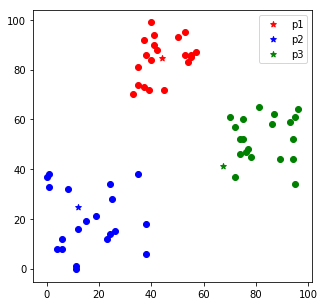

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


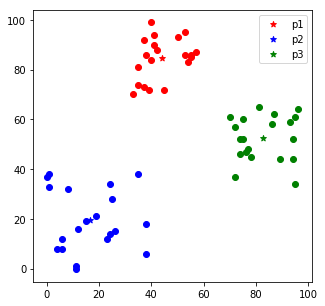

Inisiasi----------------------------------------------


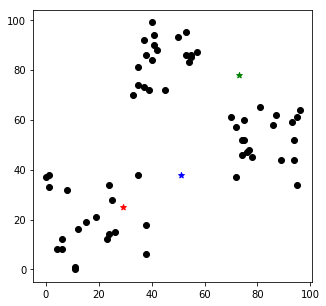

Penyematan--------------------------------------------
catatan 7 7
pusat [[29, 25], [51, 38], [73, 78]] 3
group 2 2 2


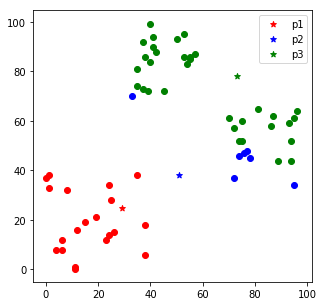

catatan 20 20
pusat [[16.350000000000001, 19.5], [72.142857142857139, 46.714285714285715], [61.454545454545453, 73.060606060606062]] 3
group 2 2 2


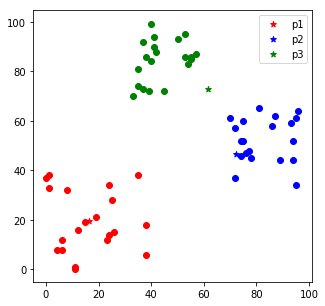

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


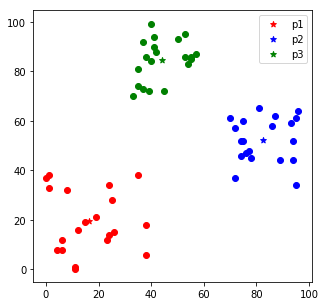

Inisiasi----------------------------------------------


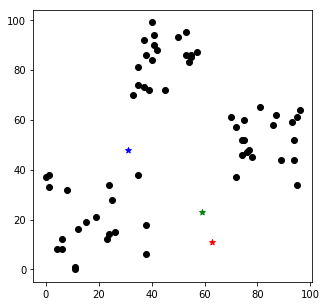

Penyematan--------------------------------------------
catatan 38 38
pusat [[63, 11], [31, 48], [59, 23]] 3
group 2 2 2


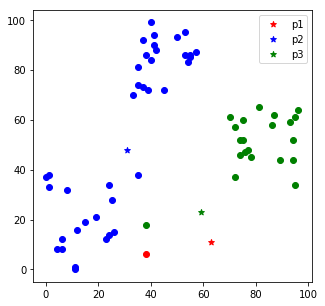

catatan 26 26
pusat [[38.0, 6.0], [29.763157894736842, 54.10526315789474], [80.523809523809518, 50.761904761904759]] 3
group 2 2 2


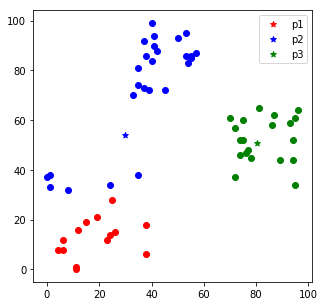

catatan 20 20
pusat [[18.428571428571427, 12.714285714285714], [36.5, 73.15384615384616], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


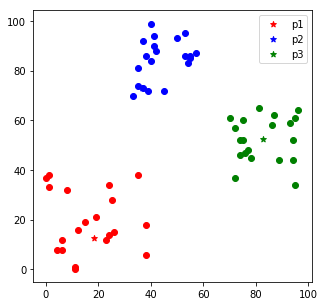

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


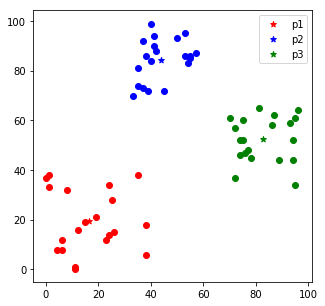

Inisiasi----------------------------------------------


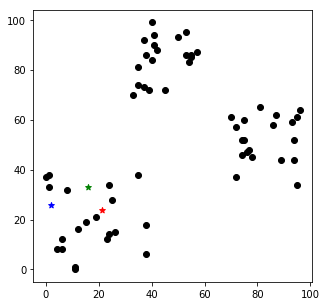

Penyematan--------------------------------------------
catatan 6 6
pusat [[21, 24], [2, 26], [16, 33]] 3
group 2 2 2


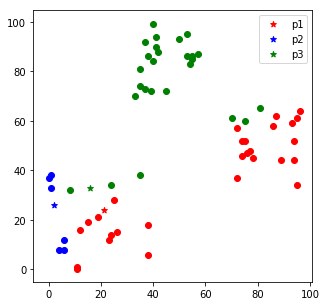

catatan 17 17
pusat [[59.607142857142854, 36.142857142857146], [3.0, 22.666666666666668], [45.115384615384613, 76.15384615384616]] 3
group 2 2 2


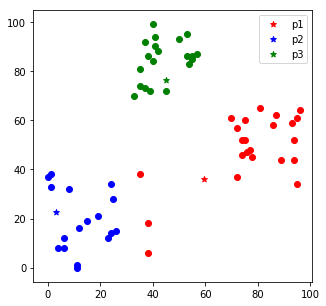

catatan 20 20
pusat [[76.695652173913047, 48.260869565217391], [12.705882352941176, 19.294117647058822], [44.0, 84.5]] 3
group 2 2 2


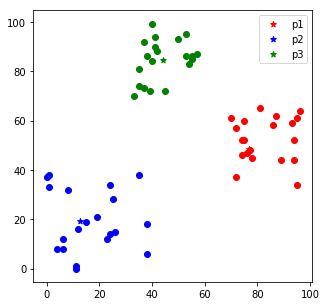

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


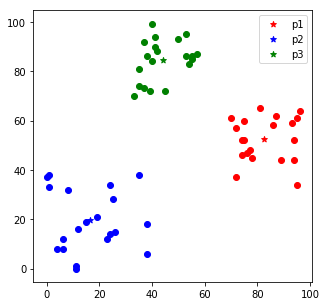

Inisiasi----------------------------------------------


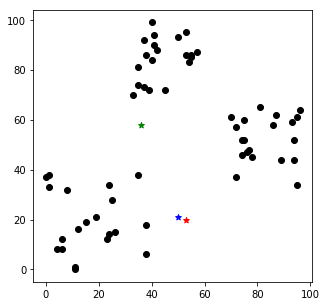

Penyematan--------------------------------------------
catatan 14 14
pusat [[53, 20], [50, 21], [36, 58]] 3
group 2 2 2


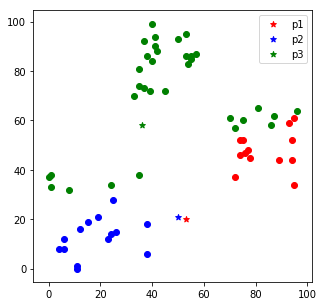

catatan 20 20
pusat [[83.538461538461533, 47.769230769230766], [18.428571428571427, 12.714285714285714], [45.939393939393938, 70.575757575757578]] 3
group 2 2 2


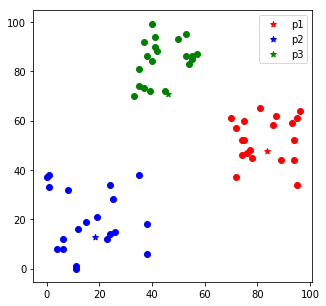

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


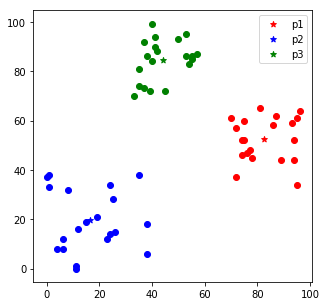

Inisiasi----------------------------------------------


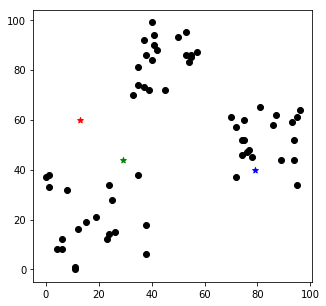

Penyematan--------------------------------------------
catatan 20 20
pusat [[13, 60], [79, 40], [29, 44]] 3
group 2 2 2


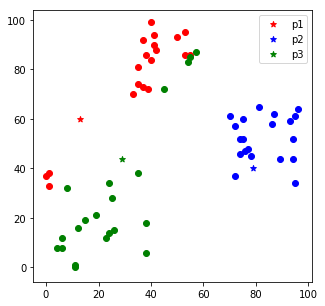

catatan 20 20
pusat [[35.315789473684212, 77.421052631578945], [82.650000000000006, 52.399999999999999], [25.523809523809526, 29.0]] 3
group 2 2 2


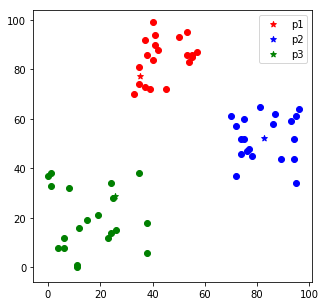

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


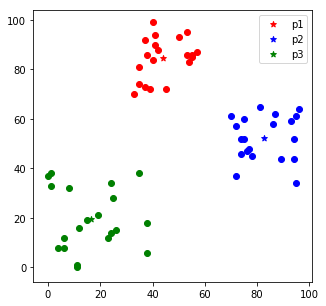

Inisiasi----------------------------------------------


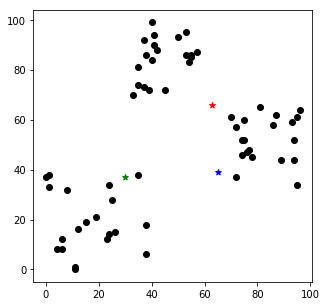

Penyematan--------------------------------------------
catatan 11 11
pusat [[63, 66], [65, 39], [30, 37]] 3
group 2 2 2


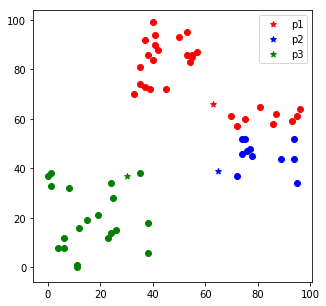

catatan 20 20
pusat [[56.379310344827587, 77.137931034482762], [81.63636363636364, 45.545454545454547], [16.350000000000001, 19.5]] 3
group 2 2 2


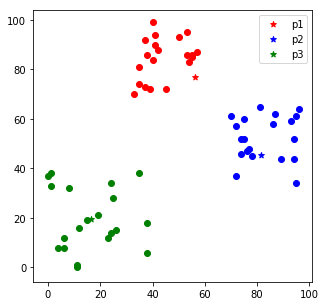

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


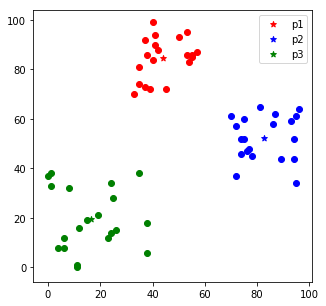

Inisiasi----------------------------------------------


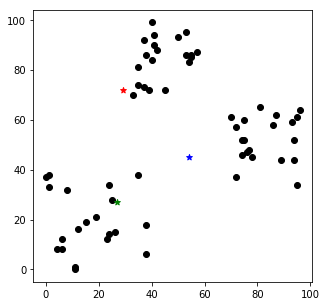

Penyematan--------------------------------------------
catatan 20 20
pusat [[29, 72], [54, 45], [27, 27]] 3
group 2 2 2


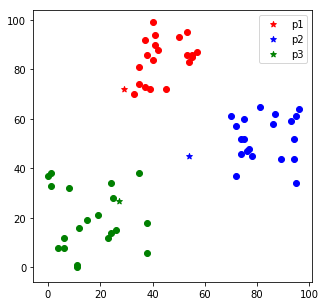

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


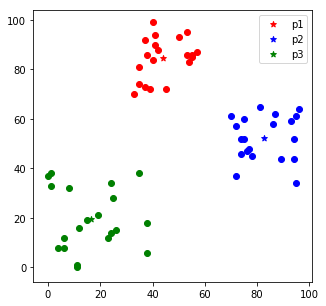

Inisiasi----------------------------------------------


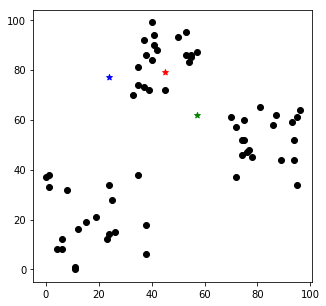

Penyematan--------------------------------------------
catatan 11 11
pusat [[45, 79], [24, 77], [57, 62]] 3
group 2 2 2


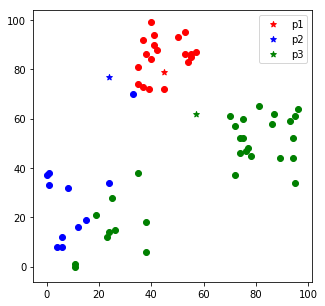

catatan 20 20
pusat [[44.578947368421055, 85.263157894736835], [10.0, 27.90909090909091], [63.43333333333333, 40.033333333333331]] 3
group 2 2 2


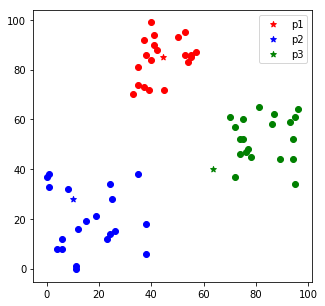

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


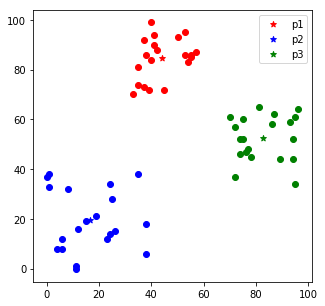

Inisiasi----------------------------------------------


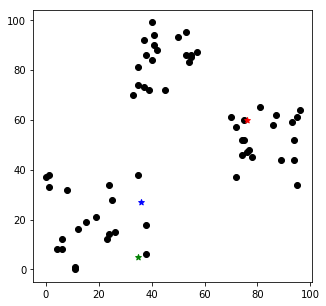

Penyematan--------------------------------------------
catatan 11 11
pusat [[76, 60], [36, 27], [35, 5]] 3
group 2 2 2


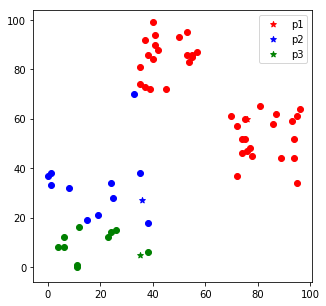

catatan 7 7
pusat [[64.102564102564102, 68.410256410256409], [18.09090909090909, 33.454545454545453], [16.100000000000001, 9.1999999999999993]] 3
group 2 2 2


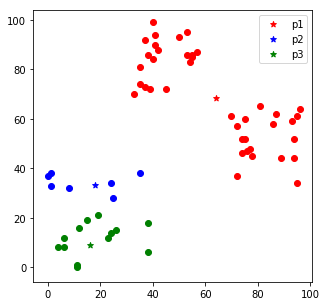

catatan 7 7
pusat [[63.325000000000003, 68.450000000000003], [13.428571428571429, 34.285714285714285], [17.923076923076923, 11.538461538461538]] 3
group 2 2 2


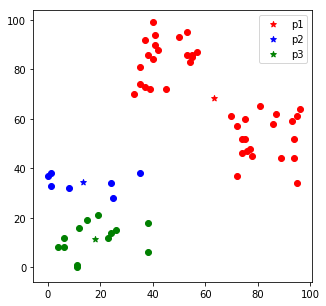

Inisiasi----------------------------------------------


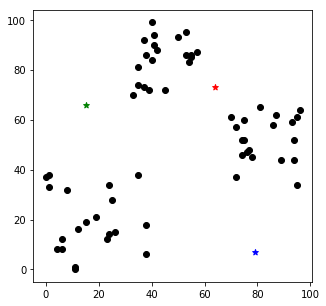

Penyematan--------------------------------------------
catatan 5 5
pusat [[64, 73], [79, 7], [15, 66]] 3
group 2 2 2


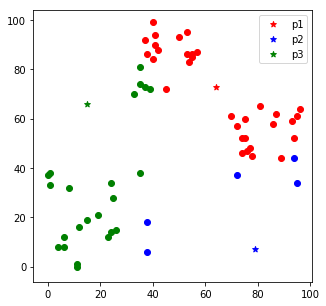

catatan 8 8
pusat [[65.40625, 70.40625], [67.400000000000006, 27.800000000000001], [18.695652173913043, 32.0]] 3
group 2 2 2


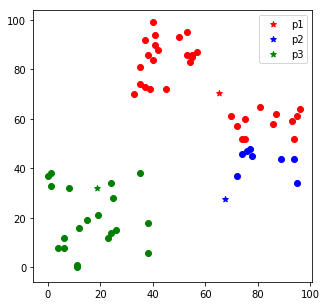

catatan 19 19
pusat [[58.6875, 74.78125], [81.875, 43.125], [16.350000000000001, 19.5]] 3
group 2 2 2


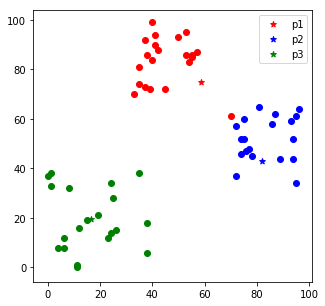

catatan 20 20
pusat [[45.238095238095241, 83.38095238095238], [83.315789473684205, 51.94736842105263], [16.350000000000001, 19.5]] 3
group 2 2 2


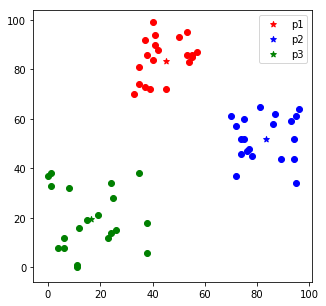

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


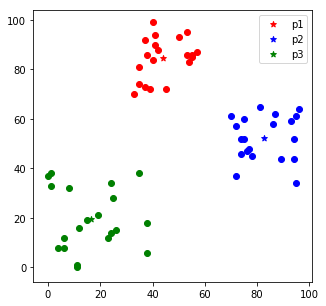

Inisiasi----------------------------------------------


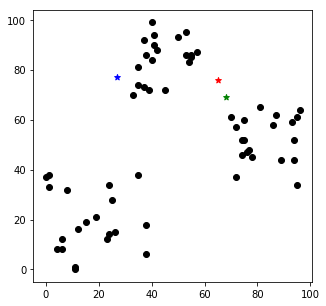

Penyematan--------------------------------------------
catatan 31 31
pusat [[65, 76], [27, 77], [68, 69]] 3
group 2 2 2


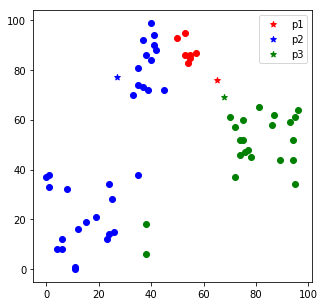

catatan 21 21
pusat [[53.857142857142854, 87.857142857142861], [24.322580645161292, 46.483870967741936], [78.590909090909093, 48.727272727272727]] 3
group 2 2 2


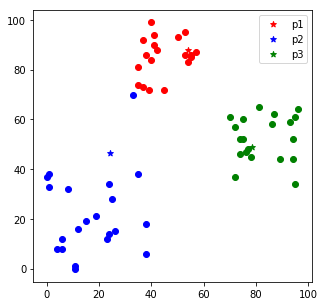

catatan 20 20
pusat [[44.578947368421055, 85.263157894736835], [17.142857142857142, 21.904761904761905], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


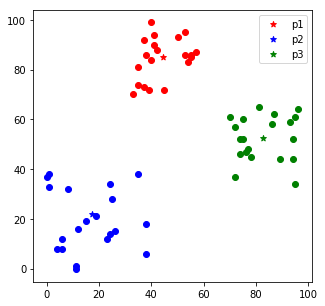

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


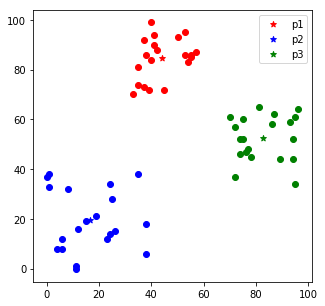

Inisiasi----------------------------------------------


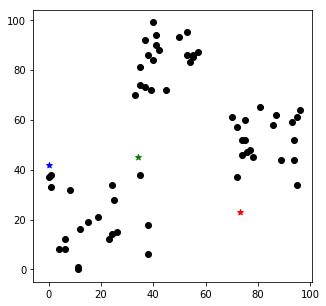

Penyematan--------------------------------------------
catatan 11 11
pusat [[73, 23], [0, 42], [34, 45]] 3
group 2 2 2


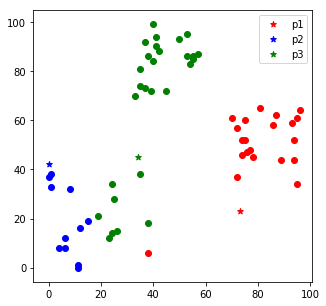

catatan 19 19
pusat [[80.523809523809518, 50.19047619047619], [6.8181818181818183, 18.545454545454547], [39.071428571428569, 66.785714285714292]] 3
group 2 2 2


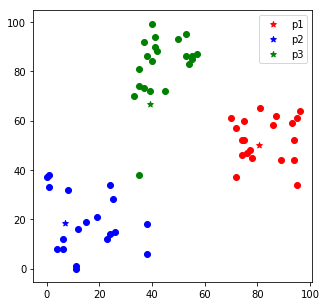

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [15.368421052631579, 18.526315789473685], [43.571428571428569, 82.285714285714292]] 3
group 2 2 2


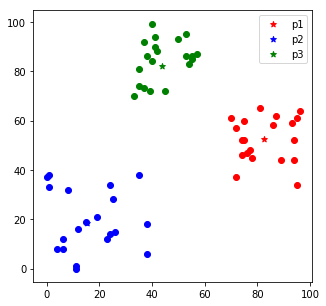

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


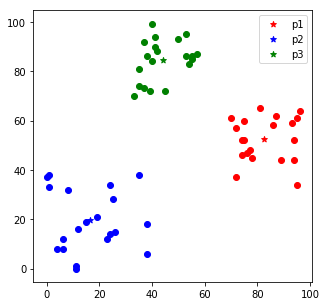

Inisiasi----------------------------------------------


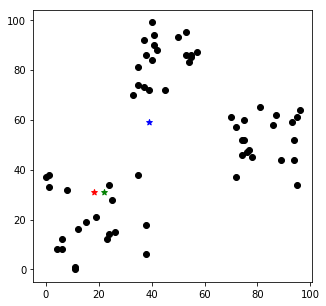

Penyematan--------------------------------------------
catatan 40 40
pusat [[18, 31], [39, 59], [22, 31]] 3
group 2 2 2


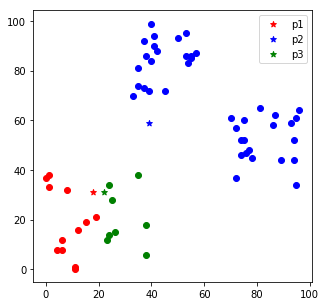

catatan 40 40
pusat [[7.833333333333333, 18.75], [63.325000000000003, 68.450000000000003], [29.125, 20.625]] 3
group 2 2 2


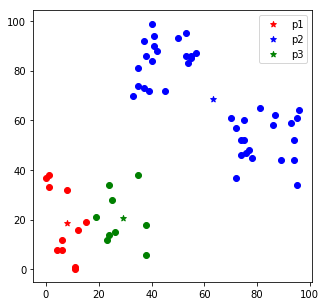

catatan 40 40
pusat [[6.8181818181818183, 18.545454545454547], [63.325000000000003, 68.450000000000003], [28.0, 20.666666666666668]] 3
group 2 2 2


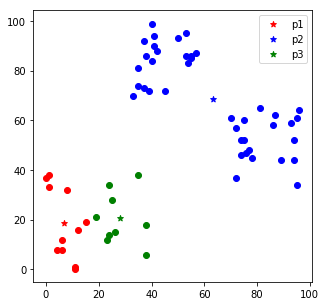

Inisiasi----------------------------------------------


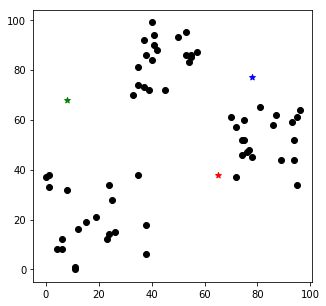

Penyematan--------------------------------------------
catatan 21 21
pusat [[65, 38], [78, 77], [8, 68]] 3
group 2 2 2


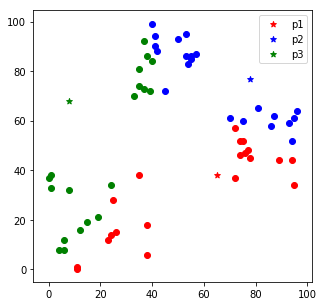

catatan 31 31
pusat [[55.350000000000001, 31.899999999999999], [64.904761904761898, 76.19047619047619], [20.526315789473685, 46.842105263157897]] 3
group 2 2 2


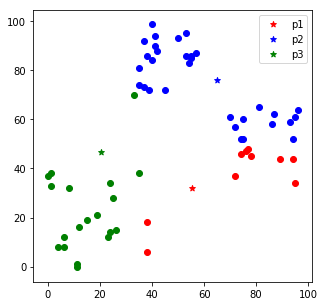

catatan 23 23
pusat [[73.099999999999994, 36.899999999999999], [59.516129032258064, 74.935483870967744], [14.947368421052632, 22.94736842105263]] 3
group 2 2 2


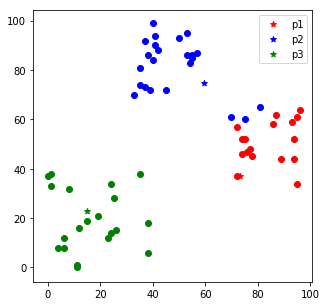

catatan 20 20
pusat [[83.941176470588232, 50.705882352941174], [48.086956521739133, 81.565217391304344], [16.350000000000001, 19.5]] 3
group 2 2 2


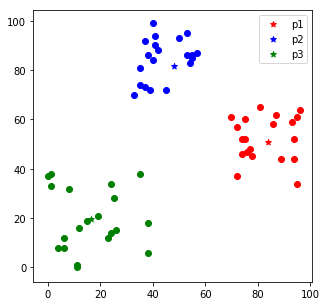

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


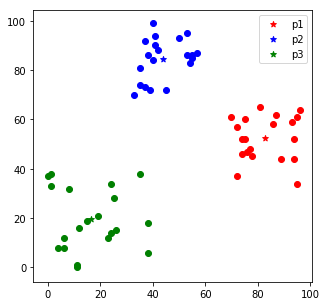

Inisiasi----------------------------------------------


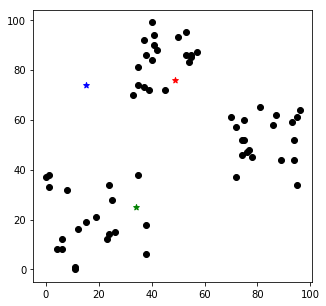

Penyematan--------------------------------------------
catatan 0 0
pusat [[49, 76], [15, 74], [34, 25]] 3
group 2 2 2


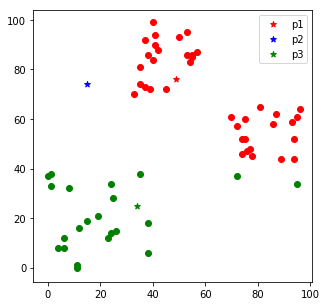

catatan 7 7
pusat [[62.263157894736842, 70.184210526315795], [15.0, 74.0], [22.454545454545453, 20.954545454545453]] 3
group 2 2 2


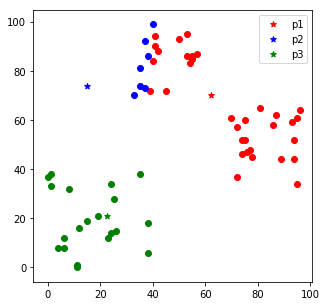

catatan 20 20
pusat [[69.030303030303031, 65.545454545454547], [36.428571428571431, 82.142857142857139], [16.350000000000001, 19.5]] 3
group 2 2 2


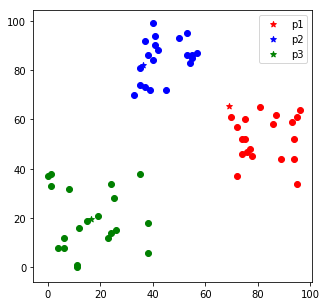

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


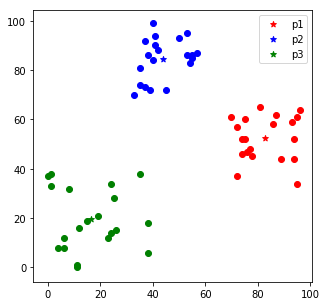

Inisiasi----------------------------------------------


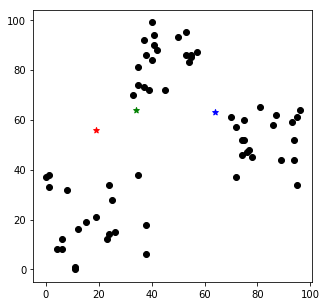

Penyematan--------------------------------------------
catatan 27 27
pusat [[19, 56], [64, 63], [34, 64]] 3
group 2 2 2


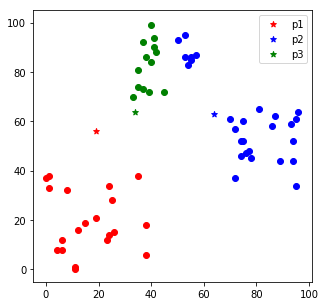

catatan 20 20
pusat [[16.350000000000001, 19.5], [75.18518518518519, 61.592592592592595], [38.692307692307693, 82.692307692307693]] 3
group 2 2 2


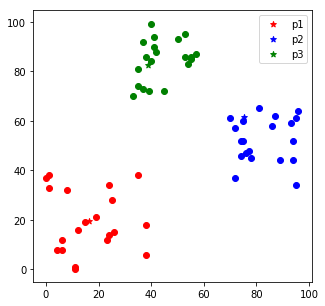

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


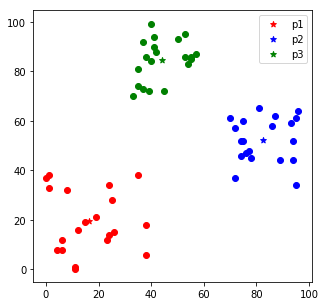

Inisiasi----------------------------------------------


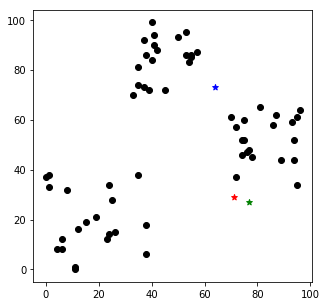

Penyematan--------------------------------------------
catatan 29 29
pusat [[71, 29], [64, 73], [77, 27]] 3
group 2 2 2


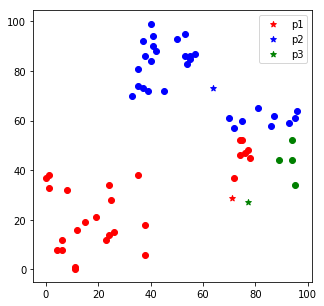

catatan 21 21
pusat [[31.592592592592592, 26.555555555555557], [56.379310344827587, 77.137931034482762], [93.0, 43.5]] 3
group 2 2 2


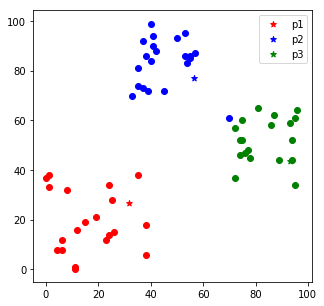

catatan 20 20
pusat [[16.350000000000001, 19.5], [45.238095238095241, 83.38095238095238], [83.315789473684205, 51.94736842105263]] 3
group 2 2 2


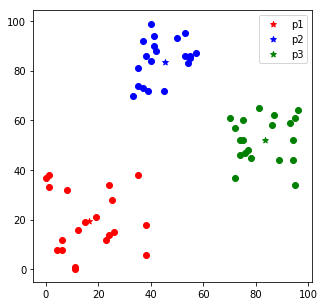

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


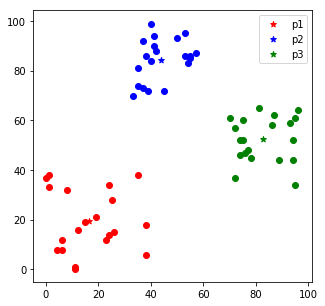

Inisiasi----------------------------------------------


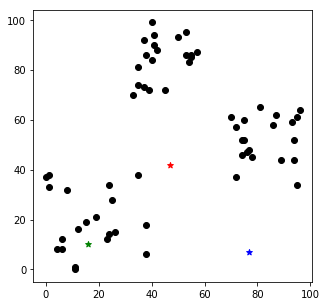

Penyematan--------------------------------------------
catatan 3 3
pusat [[47, 42], [77, 7], [16, 10]] 3
group 2 2 2


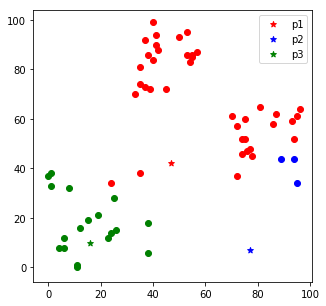

catatan 16 16
pusat [[59.333333333333336, 68.92307692307692], [92.666666666666671, 40.666666666666664], [14.888888888888889, 17.666666666666668]] 3
group 2 2 2


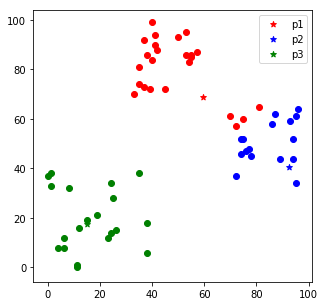

catatan 20 20
pusat [[49.083333333333336, 80.541666666666671], [84.6875, 50.3125], [16.350000000000001, 19.5]] 3
group 2 2 2


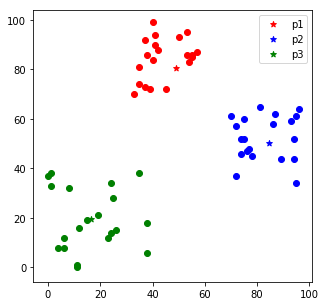

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


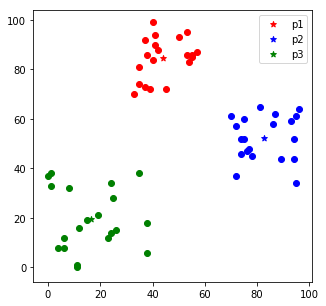

Inisiasi----------------------------------------------


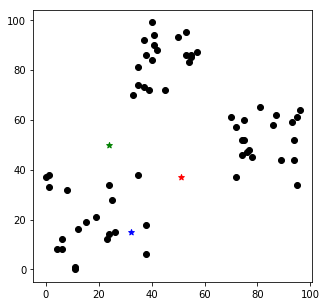

Penyematan--------------------------------------------
catatan 14 14
pusat [[51, 37], [32, 15], [24, 50]] 3
group 2 2 2


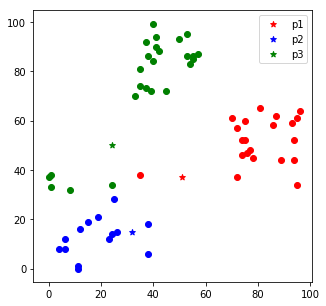

catatan 20 20
pusat [[80.38095238095238, 51.714285714285715], [18.428571428571427, 12.714285714285714], [36.560000000000002, 74.560000000000002]] 3
group 2 2 2


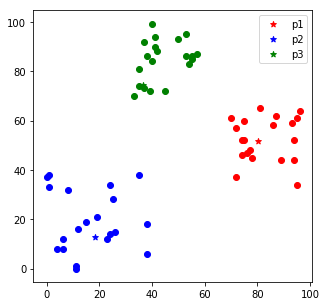

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


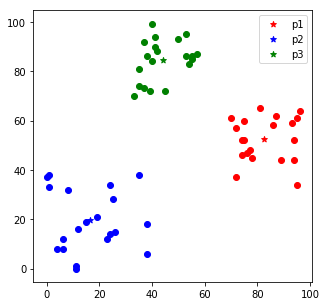

Inisiasi----------------------------------------------


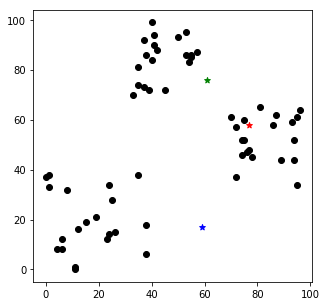

Penyematan--------------------------------------------
catatan 20 20
pusat [[77, 58], [59, 17], [61, 76]] 3
group 2 2 2


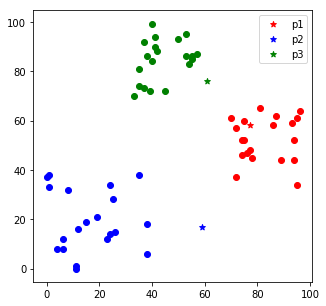

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


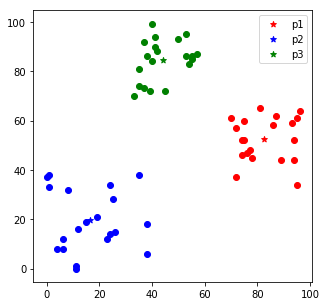

Inisiasi----------------------------------------------


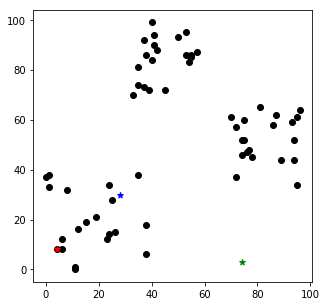

Penyematan--------------------------------------------
catatan 35 35
pusat [[4, 8], [28, 30], [74, 3]] 3
group 2 2 2


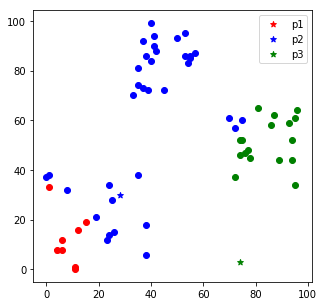

catatan 21 21
pusat [[8.25, 12.125], [38.799999999999997, 61.74285714285714], [84.470588235294116, 51.176470588235297]] 3
group 2 2 2


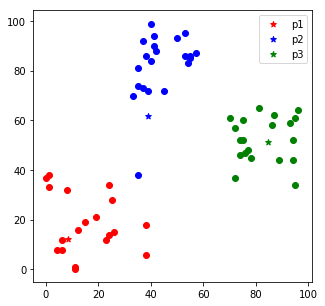

catatan 20 20
pusat [[15.368421052631579, 18.526315789473685], [43.571428571428569, 82.285714285714292], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


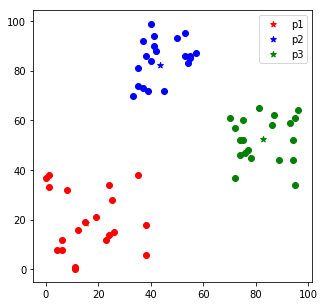

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


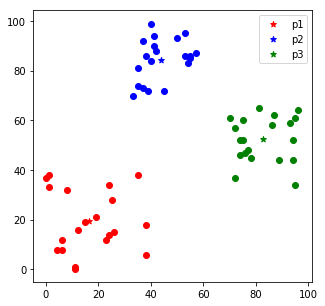

Inisiasi----------------------------------------------


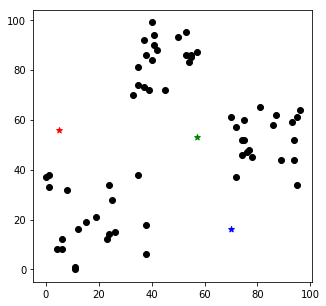

Penyematan--------------------------------------------
catatan 8 8
pusat [[5, 56], [70, 16], [57, 53]] 3
group 2 2 2


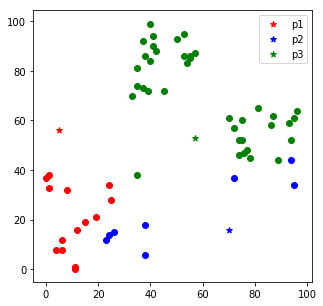

catatan 5 5
pusat [[10.214285714285714, 20.5], [51.25, 22.5], [60.710526315789473, 70.026315789473685]] 3
group 2 2 2


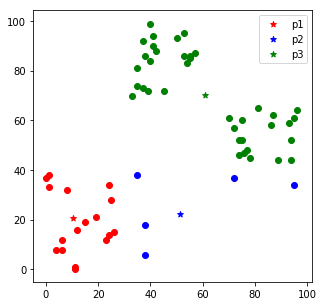

catatan 7 7
pusat [[12.705882352941176, 19.294117647058822], [55.600000000000001, 26.600000000000001], [62.263157894736842, 70.184210526315795]] 3
group 2 2 2


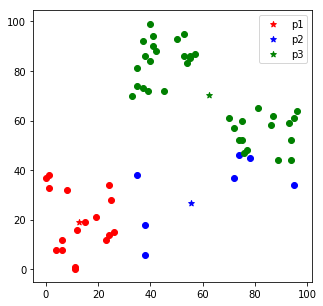

catatan 9 9
pusat [[12.705882352941176, 19.294117647058822], [61.428571428571431, 32.0], [61.5, 71.555555555555557]] 3
group 2 2 2


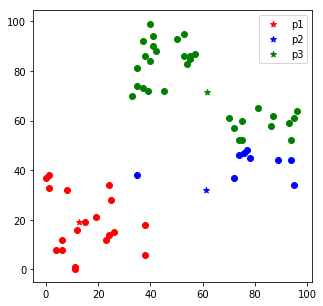

catatan 19 19
pusat [[15.368421052631579, 18.526315789473685], [76.666666666666671, 42.555555555555557], [58.6875, 74.78125]] 3
group 2 2 2


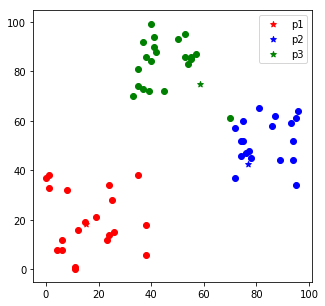

catatan 20 20
pusat [[16.350000000000001, 19.5], [83.315789473684205, 51.94736842105263], [45.238095238095241, 83.38095238095238]] 3
group 2 2 2


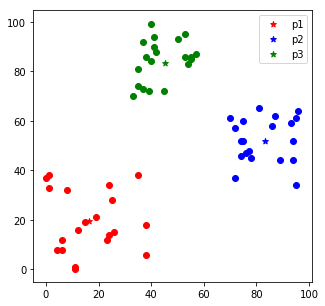

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


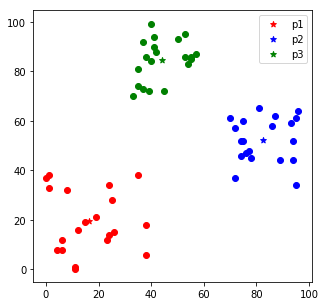

Inisiasi----------------------------------------------


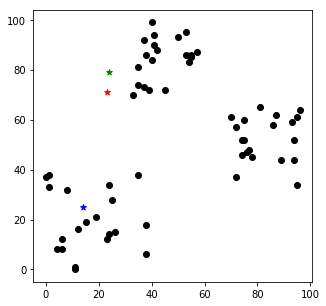

Penyematan--------------------------------------------
catatan 21 21
pusat [[23, 71], [14, 25], [24, 79]] 3
group 2 2 2


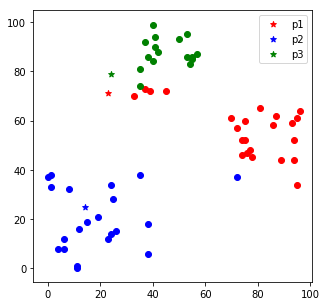

catatan 20 20
pusat [[75.434782608695656, 56.434782608695649], [19.0, 20.333333333333332], [45.375, 87.6875]] 3
group 2 2 2


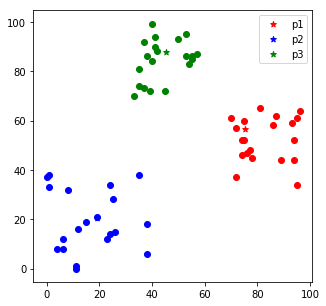

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


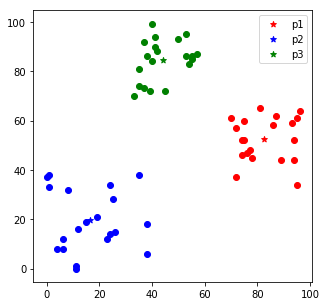

Inisiasi----------------------------------------------


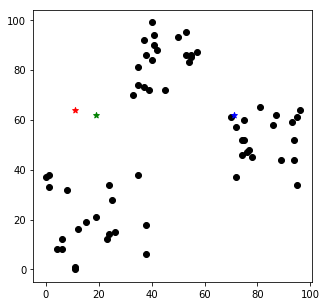

Penyematan--------------------------------------------
catatan 28 28
pusat [[11, 64], [71, 62], [19, 62]] 3
group 2 2 2


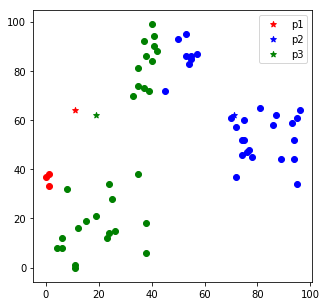

catatan 34 34
pusat [[0.66666666666666663, 36.0], [74.107142857142861, 61.964285714285715], [27.0, 44.310344827586206]] 3
group 2 2 2


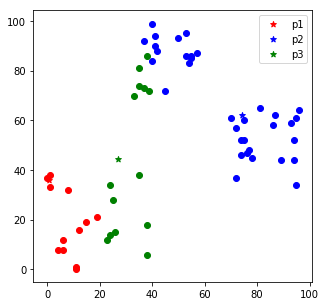

catatan 36 36
pusat [[7.833333333333333, 18.75], [68.117647058823536, 67.117647058823536], [32.142857142857146, 44.357142857142854]] 3
group 2 2 2


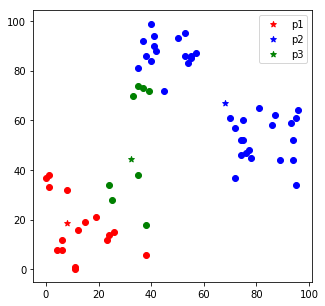

catatan 35 35
pusat [[12.8125, 17.0], [66.361111111111114, 68.027777777777771], [33.25, 50.875]] 3
group 2 2 2


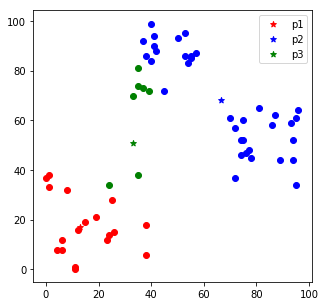

catatan 27 27
pusat [[14.888888888888889, 17.666666666666668], [67.257142857142853, 67.657142857142858], [34.0, 63.142857142857146]] 3
group 2 2 2


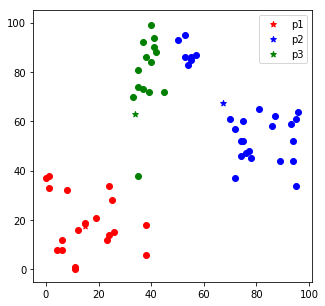

catatan 20 20
pusat [[15.368421052631579, 18.526315789473685], [75.18518518518519, 61.592592592592595], [38.428571428571431, 79.5]] 3
group 2 2 2


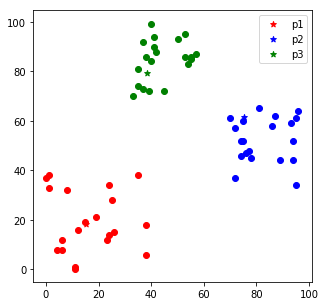

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


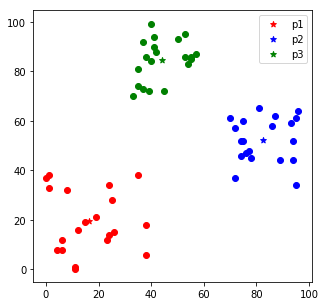

Inisiasi----------------------------------------------


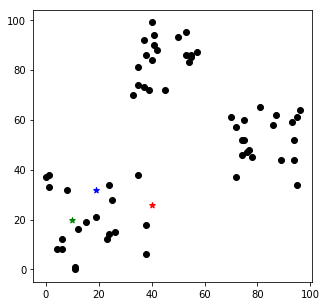

Penyematan--------------------------------------------
catatan 17 17
pusat [[40, 26], [19, 32], [10, 20]] 3
group 2 2 2


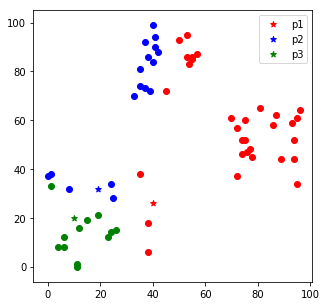

catatan 20 20
pusat [[70.516129032258064, 57.967741935483872], [30.352941176470587, 68.941176470588232], [13.166666666666666, 13.25]] 3
group 2 2 2


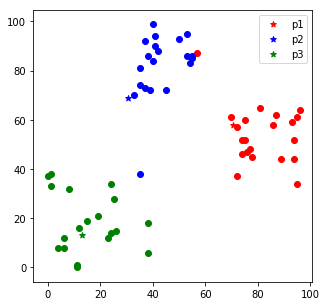

catatan 20 20
pusat [[81.428571428571431, 54.047619047619051], [42.899999999999999, 82.049999999999997], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


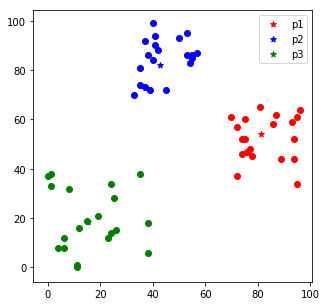

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


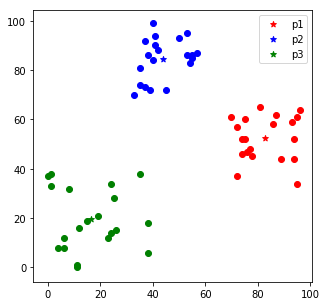

Inisiasi----------------------------------------------


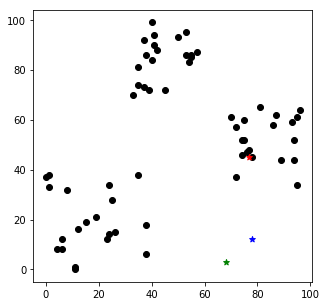

Penyematan--------------------------------------------
catatan 0 0
pusat [[77, 45], [78, 12], [68, 3]] 3
group 2 2 2


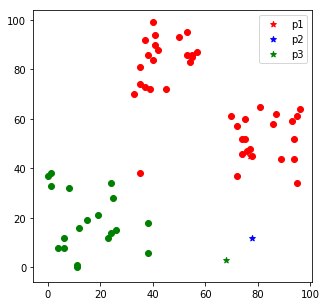

catatan 4 4
pusat [[62.634146341463413, 67.707317073170728], [78.0, 12.0], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


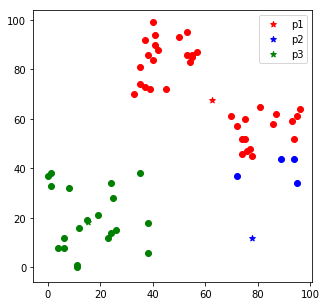

catatan 16 16
pusat [[60.638888888888886, 71.638888888888886], [87.5, 39.75], [16.350000000000001, 19.5]] 3
group 2 2 2


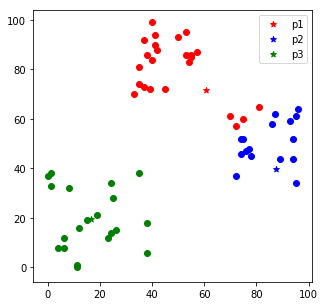

catatan 20 20
pusat [[49.083333333333336, 80.541666666666671], [84.6875, 50.3125], [16.350000000000001, 19.5]] 3
group 2 2 2


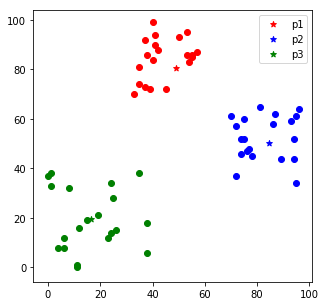

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


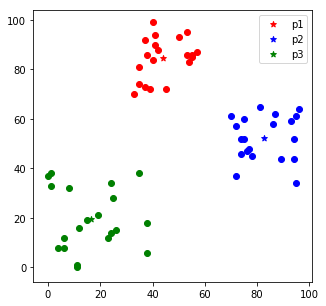

Inisiasi----------------------------------------------


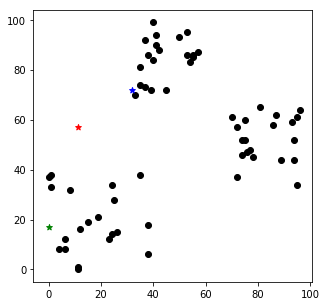

Penyematan--------------------------------------------
catatan 40 40
pusat [[11, 57], [32, 72], [0, 17]] 3
group 2 2 2


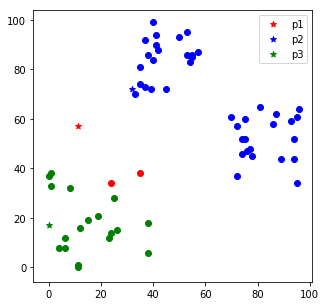

catatan 40 40
pusat [[29.5, 36.0], [63.325000000000003, 68.450000000000003], [14.888888888888889, 17.666666666666668]] 3
group 2 2 2


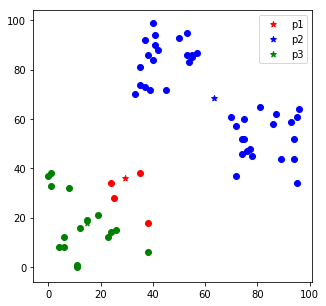

catatan 40 40
pusat [[30.5, 29.5], [63.325000000000003, 68.450000000000003], [12.8125, 17.0]] 3
group 2 2 2


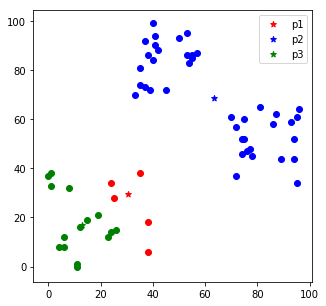

catatan 40 40
pusat [[32.0, 24.800000000000001], [63.325000000000003, 68.450000000000003], [11.133333333333333, 17.733333333333334]] 3
group 2 2 2


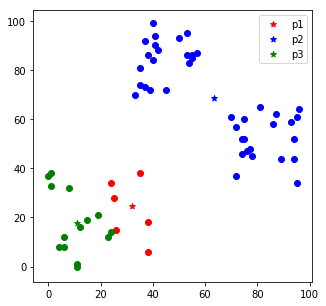

catatan 40 40
pusat [[31.0, 23.166666666666668], [63.325000000000003, 68.450000000000003], [10.071428571428571, 17.928571428571427]] 3
group 2 2 2


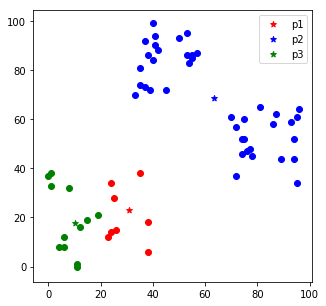

catatan 40 40
pusat [[29.125, 20.625], [63.325000000000003, 68.450000000000003], [7.833333333333333, 18.75]] 3
group 2 2 2


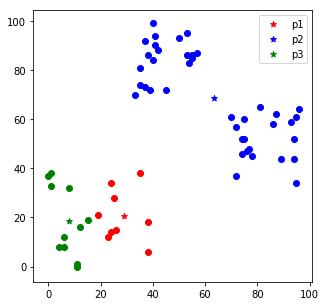

catatan 40 40
pusat [[28.0, 20.666666666666668], [63.325000000000003, 68.450000000000003], [6.8181818181818183, 18.545454545454547]] 3
group 2 2 2


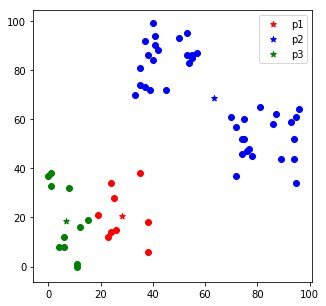

Inisiasi----------------------------------------------


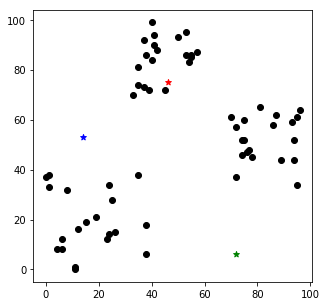

Penyematan--------------------------------------------
catatan 18 18
pusat [[46, 75], [14, 53], [72, 6]] 3
group 2 2 2


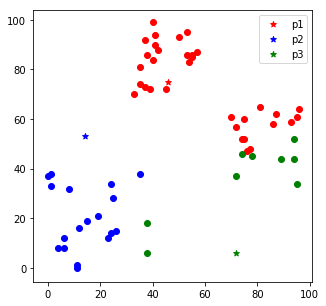

catatan 20 20
pusat [[58.696969696969695, 73.818181818181813], [13.944444444444445, 20.333333333333332], [74.666666666666671, 36.222222222222221]] 3
group 2 2 2


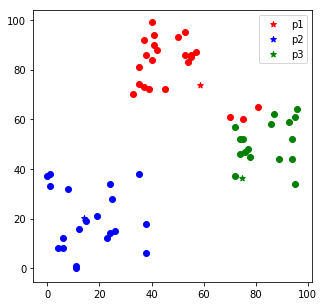

catatan 20 20
pusat [[48.086956521739133, 81.565217391304344], [16.350000000000001, 19.5], [83.941176470588232, 50.705882352941174]] 3
group 2 2 2


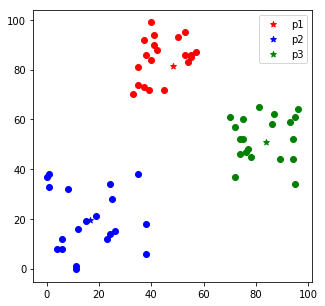

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


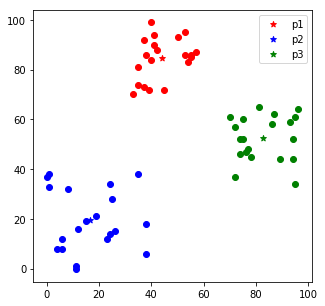

Inisiasi----------------------------------------------


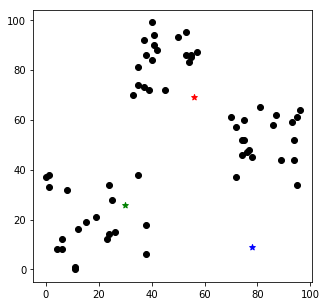

Penyematan--------------------------------------------
catatan 4 4
pusat [[56, 69], [78, 9], [30, 26]] 3
group 2 2 2


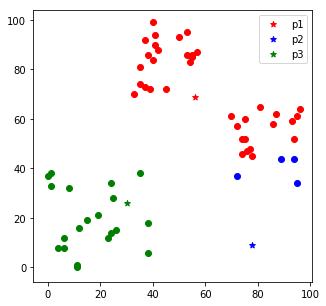

catatan 16 16
pusat [[60.638888888888886, 71.638888888888886], [87.5, 39.75], [16.350000000000001, 19.5]] 3
group 2 2 2


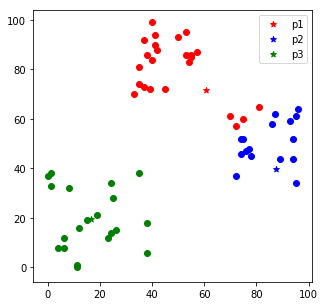

catatan 20 20
pusat [[49.083333333333336, 80.541666666666671], [84.6875, 50.3125], [16.350000000000001, 19.5]] 3
group 2 2 2


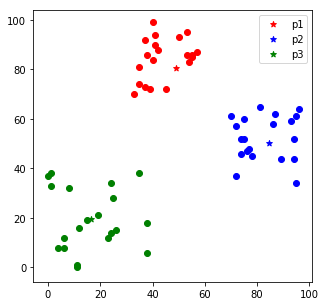

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


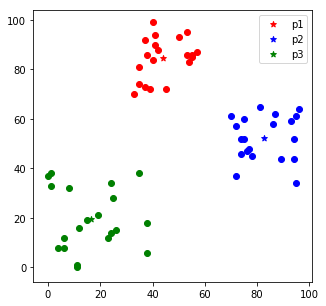

Inisiasi----------------------------------------------


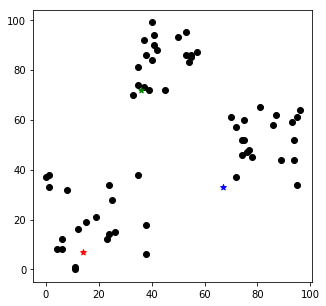

Penyematan--------------------------------------------
catatan 21 21
pusat [[14, 7], [67, 33], [36, 72]] 3
group 2 2 2


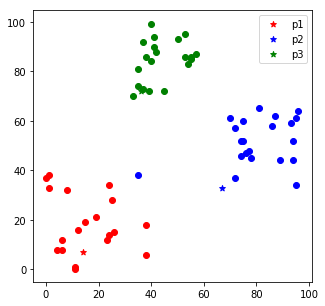

catatan 20 20
pusat [[15.368421052631579, 18.526315789473685], [80.38095238095238, 51.714285714285715], [44.0, 84.5]] 3
group 2 2 2


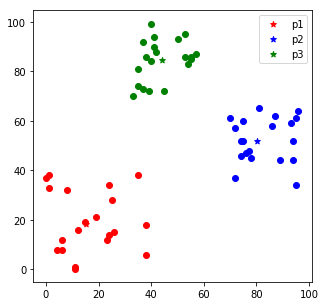

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


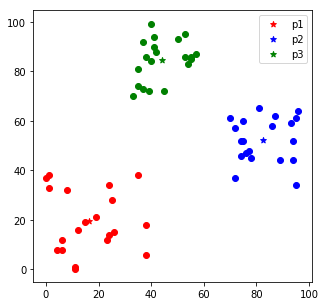

Inisiasi----------------------------------------------


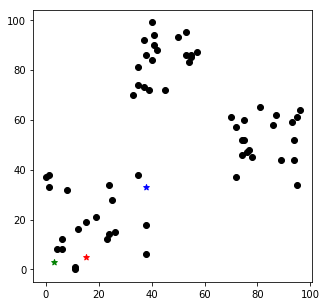

Penyematan--------------------------------------------
catatan 44 44
pusat [[15, 5], [38, 33], [3, 3]] 3
group 2 2 2


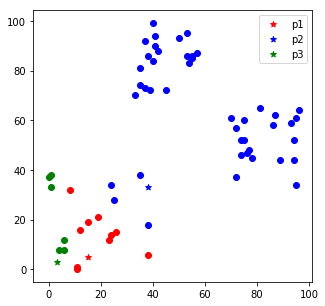

catatan 40 40
pusat [[18.699999999999999, 13.6], [60.340909090909093, 64.909090909090907], [3.0, 22.666666666666668]] 3
group 2 2 2


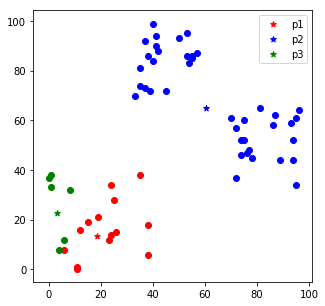

catatan 40 40
pusat [[21.928571428571427, 16.428571428571427], [63.325000000000003, 68.450000000000003], [3.3333333333333335, 26.666666666666668]] 3
group 2 2 2


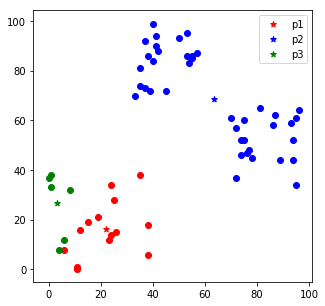

Inisiasi----------------------------------------------


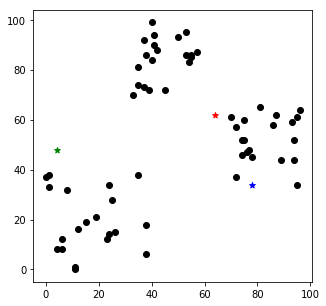

Penyematan--------------------------------------------
catatan 11 11
pusat [[64, 62], [78, 34], [4, 48]] 3
group 2 2 2


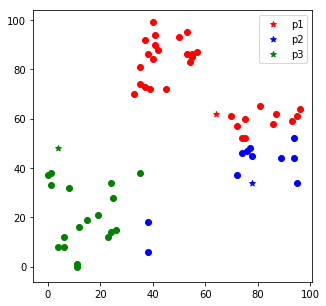

catatan 18 18
pusat [[57.548387096774192, 75.516129032258064], [75.0, 38.272727272727273], [13.944444444444445, 20.333333333333332]] 3
group 2 2 2


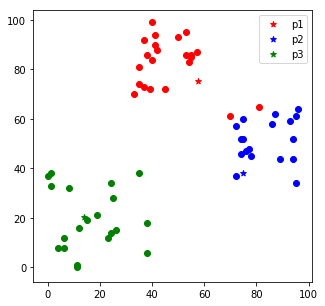

catatan 20 20
pusat [[46.863636363636367, 82.545454545454547], [83.444444444444443, 51.222222222222221], [16.350000000000001, 19.5]] 3
group 2 2 2


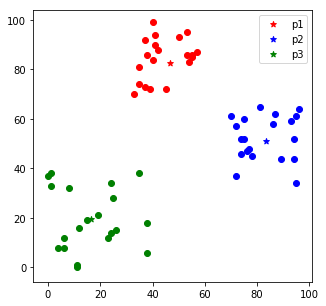

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


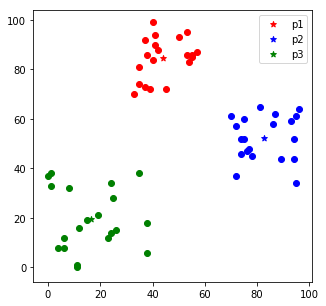

Inisiasi----------------------------------------------


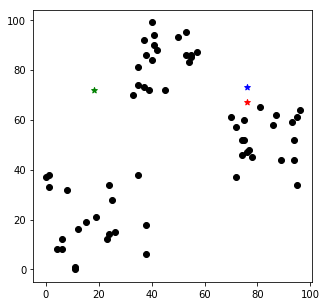

Penyematan--------------------------------------------
catatan 7 7
pusat [[76, 67], [76, 73], [18, 72]] 3
group 2 2 2


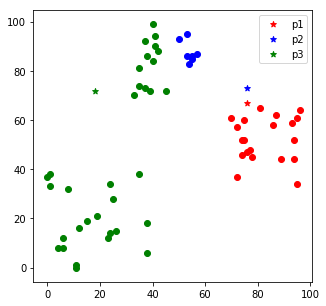

catatan 19 19
pusat [[82.650000000000006, 52.399999999999999], [53.857142857142854, 87.857142857142861], [25.151515151515152, 44.393939393939391]] 3
group 2 2 2


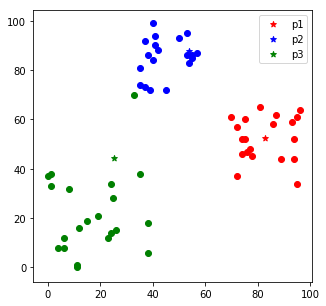

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.578947368421055, 85.263157894736835], [17.142857142857142, 21.904761904761905]] 3
group 2 2 2


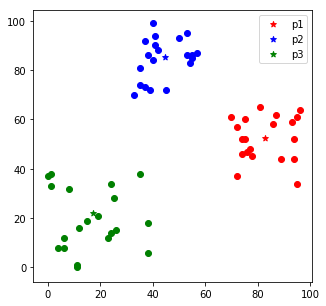

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


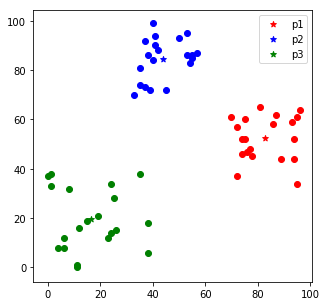

Inisiasi----------------------------------------------


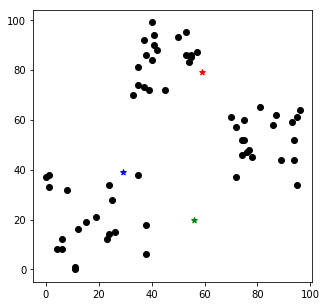

Penyematan--------------------------------------------
catatan 18 18
pusat [[59, 79], [29, 39], [56, 20]] 3
group 2 2 2


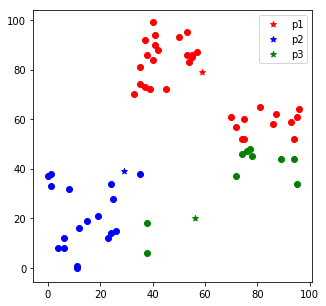

catatan 20 20
pusat [[58.6875, 74.78125], [13.944444444444445, 20.333333333333332], [73.099999999999994, 36.899999999999999]] 3
group 2 2 2


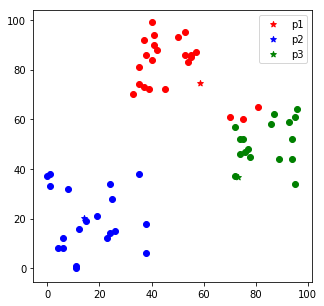

catatan 20 20
pusat [[48.086956521739133, 81.565217391304344], [16.350000000000001, 19.5], [83.941176470588232, 50.705882352941174]] 3
group 2 2 2


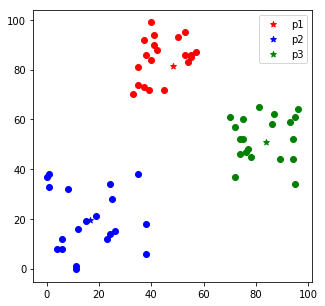

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


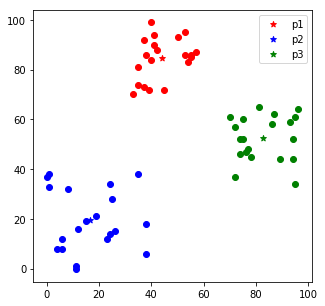

Inisiasi----------------------------------------------


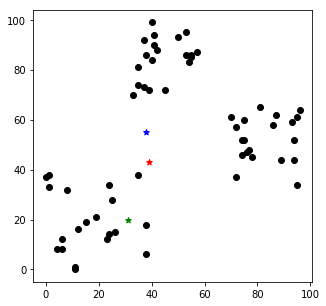

Penyematan--------------------------------------------
catatan 30 30
pusat [[39, 43], [38, 55], [31, 20]] 3
group 2 2 2


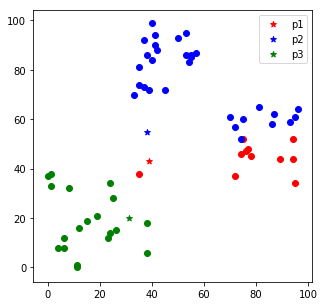

catatan 20 20
pusat [[78.090909090909093, 44.272727272727273], [56.966666666666669, 76.299999999999997], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


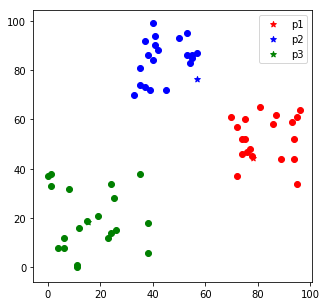

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


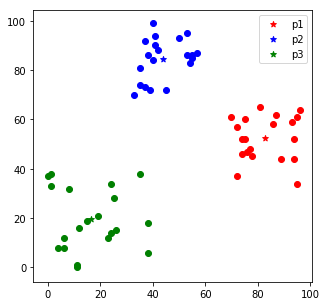

Inisiasi----------------------------------------------


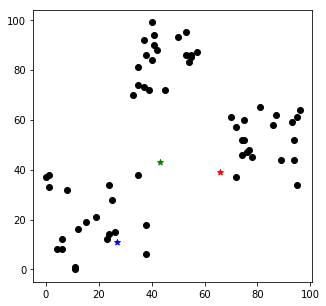

Penyematan--------------------------------------------
catatan 18 18
pusat [[66, 39], [27, 11], [43, 43]] 3
group 2 2 2


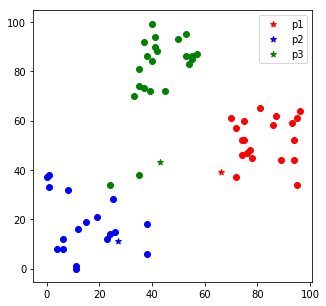

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [14.888888888888889, 17.666666666666668], [42.68181818181818, 80.090909090909093]] 3
group 2 2 2


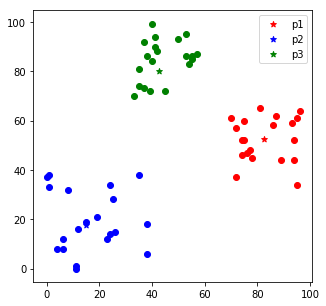

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


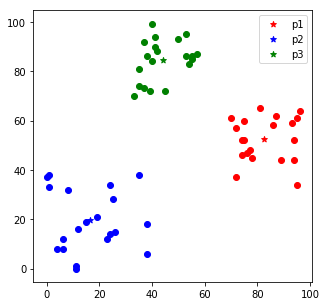

Inisiasi----------------------------------------------


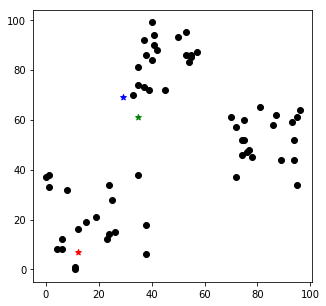

Penyematan--------------------------------------------
catatan 19 19
pusat [[12, 7], [29, 69], [35, 61]] 3
group 2 2 2


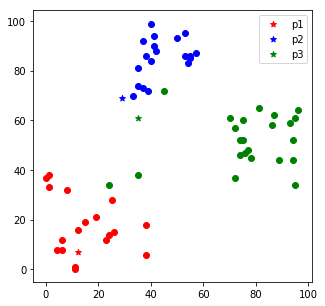

catatan 20 20
pusat [[14.888888888888889, 17.666666666666668], [43.94736842105263, 85.15789473684211], [76.391304347826093, 51.826086956521742]] 3
group 2 2 2


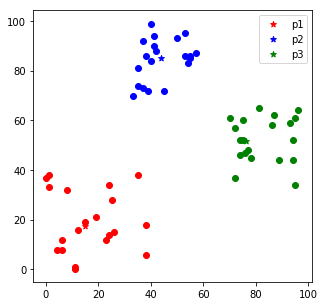

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


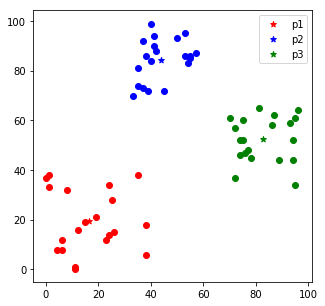

Inisiasi----------------------------------------------


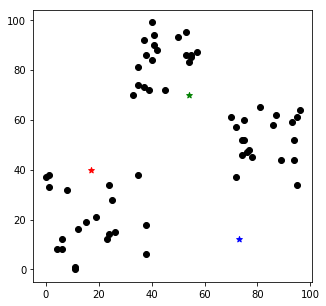

Penyematan--------------------------------------------
catatan 6 6
pusat [[17, 40], [73, 12], [54, 70]] 3
group 2 2 2


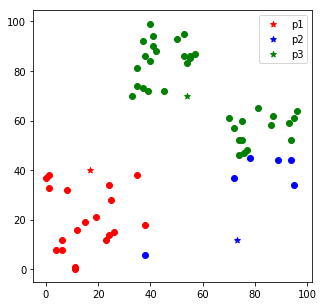

catatan 16 16
pusat [[15.210526315789474, 20.210526315789473], [77.666666666666671, 35.0], [60.142857142857146, 72.400000000000006]] 3
group 2 2 2


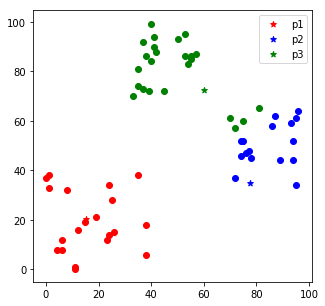

catatan 20 20
pusat [[16.350000000000001, 19.5], [84.6875, 50.3125], [49.083333333333336, 80.541666666666671]] 3
group 2 2 2


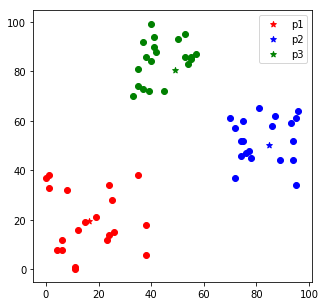

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


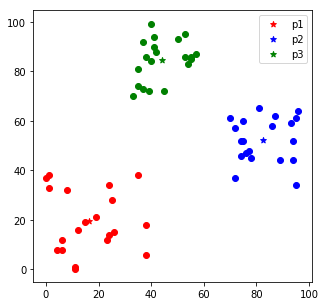

Inisiasi----------------------------------------------


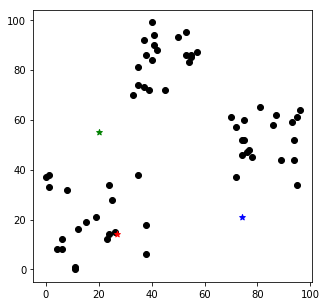

Penyematan--------------------------------------------
catatan 20 20
pusat [[27, 14], [74, 21], [20, 55]] 3
group 2 2 2


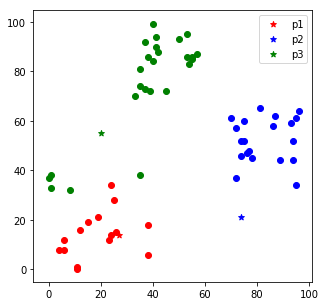

catatan 20 20
pusat [[18.800000000000001, 14.133333333333333], [82.650000000000006, 52.399999999999999], [37.0, 74.719999999999999]] 3
group 2 2 2


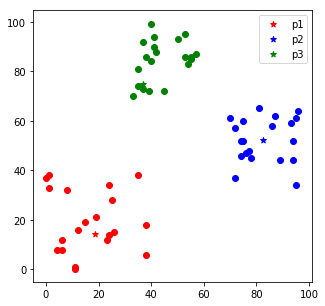

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


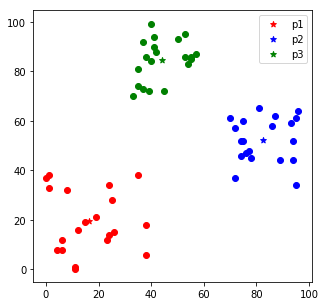

Inisiasi----------------------------------------------


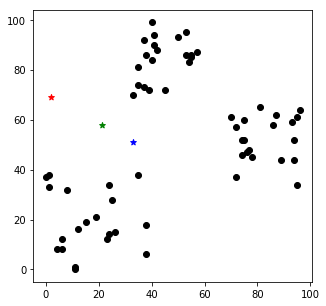

Penyematan--------------------------------------------
catatan 45 45
pusat [[2, 69], [33, 51], [21, 58]] 3
group 2 2 2


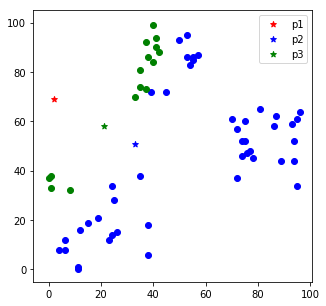

catatan 34 34
pusat [[2.0, 69.0], [54.022222222222226, 45.711111111111109], [28.600000000000001, 71.400000000000006]] 3
group 2 2 2


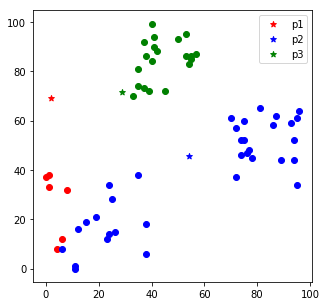

catatan 23 23
pusat [[3.3333333333333335, 26.666666666666668], [57.647058823529413, 37.588235294117645], [44.0, 84.5]] 3
group 2 2 2


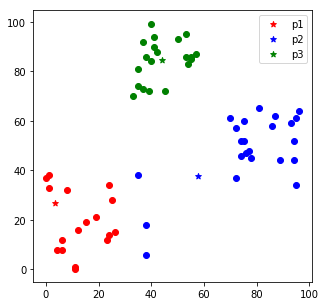

catatan 20 20
pusat [[12.705882352941176, 19.294117647058822], [76.695652173913047, 48.260869565217391], [44.0, 84.5]] 3
group 2 2 2


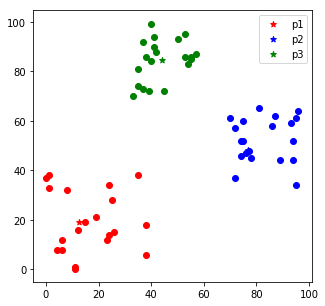

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


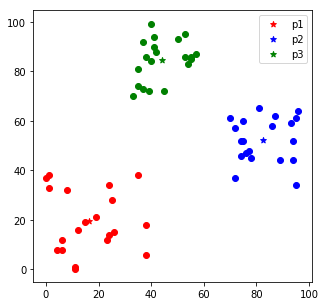

Inisiasi----------------------------------------------


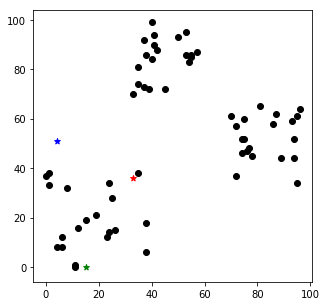

Penyematan--------------------------------------------
catatan 10 10
pusat [[33, 36], [4, 51], [15, 0]] 3
group 2 2 2


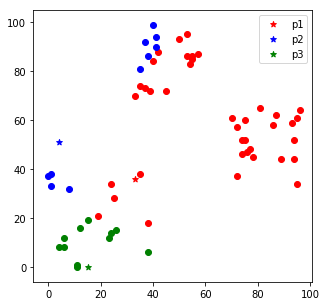

catatan 14 14
pusat [[62.615384615384613, 59.871794871794869], [24.199999999999999, 68.200000000000003], [16.0, 10.090909090909092]] 3
group 2 2 2


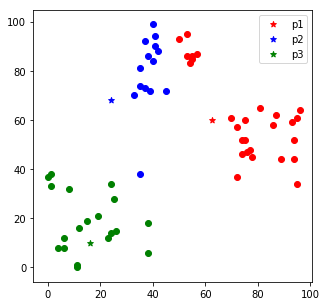

catatan 20 20
pusat [[75.18518518518519, 61.592592592592595], [38.428571428571431, 79.5], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


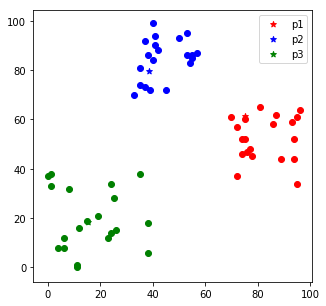

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


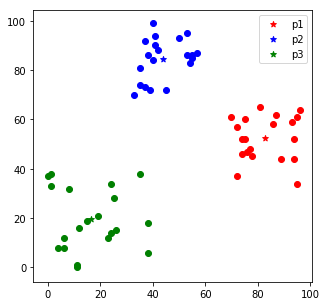

Inisiasi----------------------------------------------


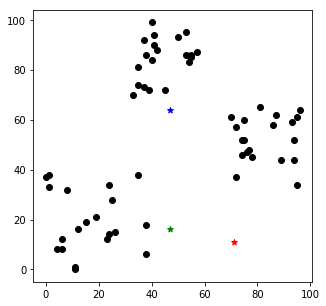

Penyematan--------------------------------------------
catatan 34 34
pusat [[71, 11], [47, 64], [47, 16]] 3
group 2 2 2


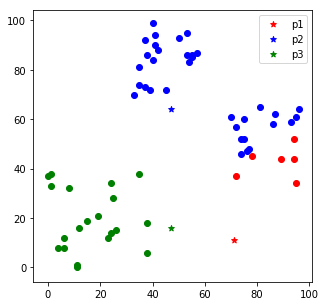

catatan 23 23
pusat [[87.0, 42.666666666666664], [59.147058823529413, 73.0], [16.350000000000001, 19.5]] 3
group 2 2 2


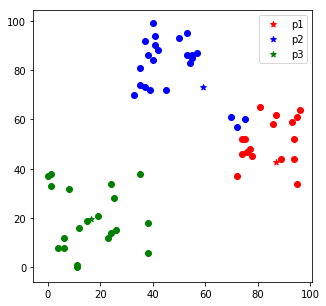

catatan 20 20
pusat [[84.470588235294116, 51.176470588235297], [47.695652173913047, 81.217391304347828], [16.350000000000001, 19.5]] 3
group 2 2 2


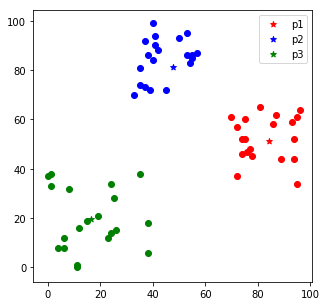

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


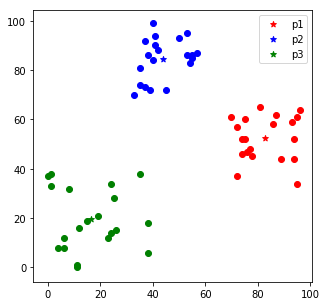

Inisiasi----------------------------------------------


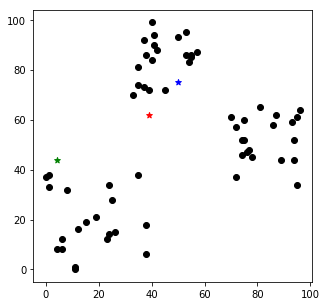

Penyematan--------------------------------------------
catatan 35 35
pusat [[39, 62], [50, 75], [4, 44]] 3
group 2 2 2


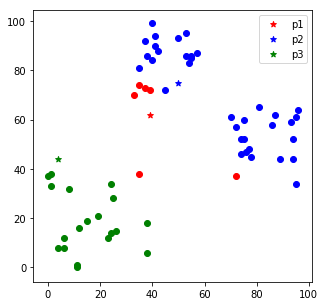

catatan 27 27
pusat [[41.833333333333336, 60.666666666666664], [66.200000000000003, 68.914285714285711], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


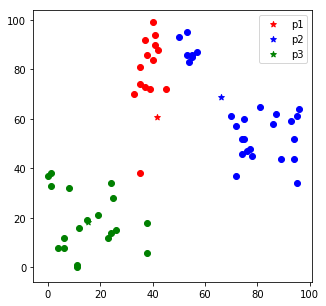

catatan 20 20
pusat [[38.428571428571431, 79.5], [75.18518518518519, 61.592592592592595], [15.368421052631579, 18.526315789473685]] 3
group 2 2 2


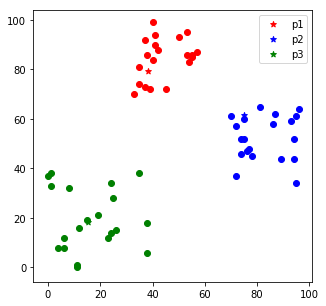

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


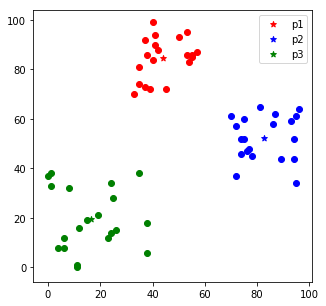

Inisiasi----------------------------------------------


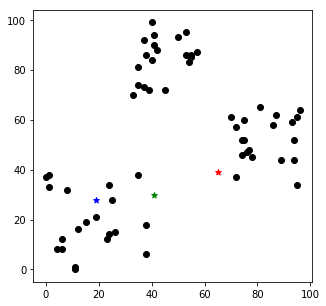

Penyematan--------------------------------------------
catatan 17 17
pusat [[65, 39], [19, 28], [41, 30]] 3
group 2 2 2


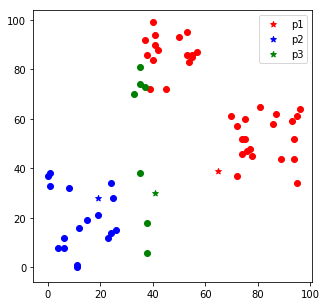

catatan 19 19
pusat [[66.472222222222229, 67.777777777777771], [12.705882352941176, 19.294117647058822], [35.857142857142854, 51.428571428571431]] 3
group 2 2 2


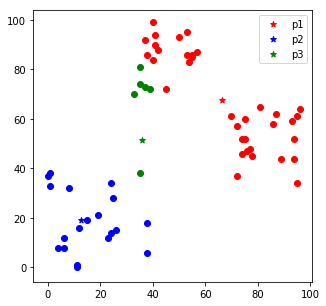

catatan 20 20
pusat [[67.257142857142853, 67.657142857142858], [15.368421052631579, 18.526315789473685], [35.666666666666664, 68.0]] 3
group 2 2 2


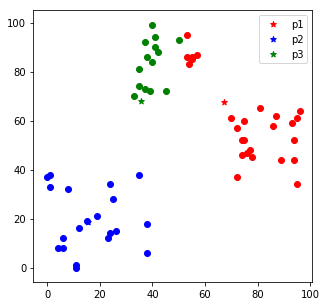

catatan 20 20
pusat [[76.15384615384616, 60.384615384615387], [16.350000000000001, 19.5], [39.5, 83.428571428571431]] 3
group 2 2 2


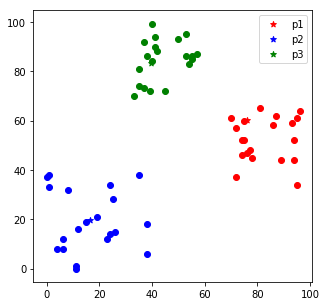

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


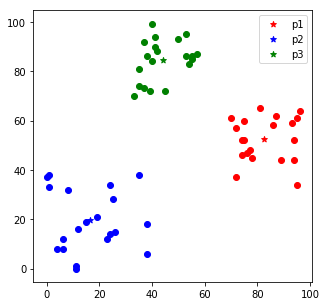

Inisiasi----------------------------------------------


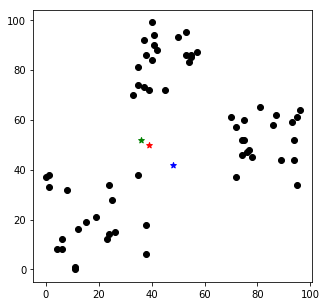

Penyematan--------------------------------------------
catatan 27 27
pusat [[39, 50], [48, 42], [36, 52]] 3
group 2 2 2


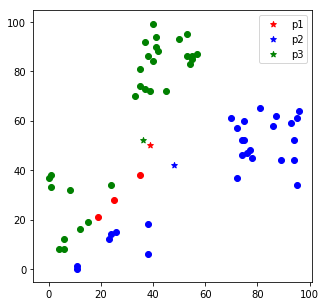

catatan 20 20
pusat [[26.333333333333332, 29.0], [67.555555555555557, 41.25925925925926], [31.899999999999999, 64.233333333333334]] 3
group 2 2 2


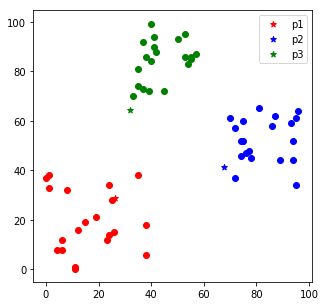

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


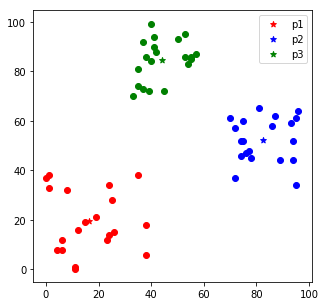

Inisiasi----------------------------------------------


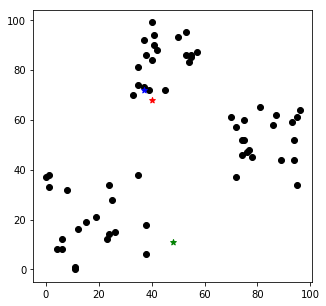

Penyematan--------------------------------------------
catatan 19 19
pusat [[40, 68], [37, 72], [48, 11]] 3
group 2 2 2


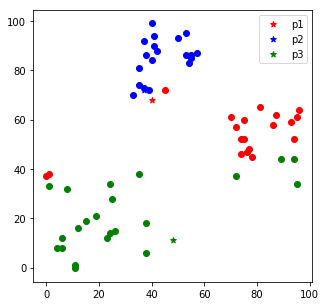

catatan 20 20
pusat [[71.0, 54.526315789473685], [43.94736842105263, 85.15789473684211], [30.727272727272727, 21.545454545454547]] 3
group 2 2 2


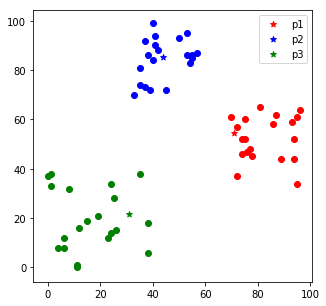

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


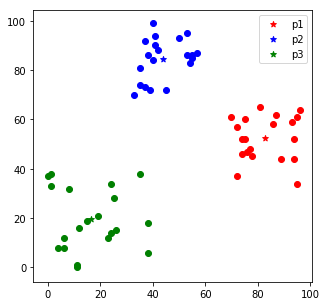

Inisiasi----------------------------------------------


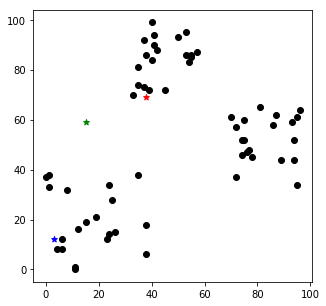

Penyematan--------------------------------------------
catatan 17 17
pusat [[38, 69], [3, 12], [15, 59]] 3
group 2 2 2


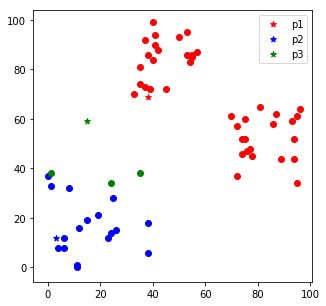

catatan 13 13
pusat [[63.325000000000003, 68.450000000000003], [15.705882352941176, 16.470588235294116], [20.0, 36.666666666666664]] 3
group 2 2 2


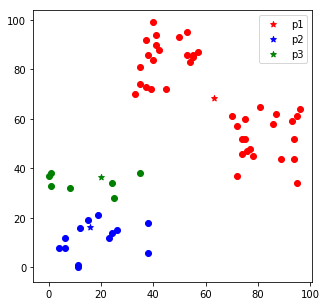

catatan 13 13
pusat [[63.325000000000003, 68.450000000000003], [17.923076923076923, 11.538461538461538], [13.428571428571429, 34.285714285714285]] 3
group 2 2 2


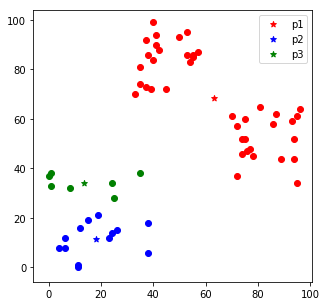

Inisiasi----------------------------------------------


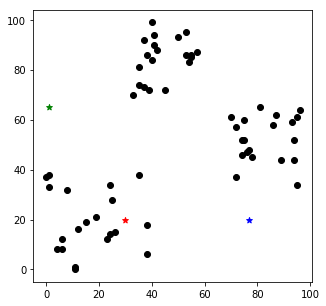

Penyematan--------------------------------------------
catatan 20 20
pusat [[30, 20], [77, 20], [1, 65]] 3
group 2 2 2


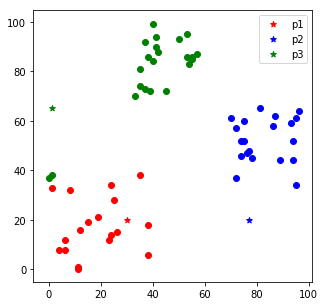

catatan 20 20
pusat [[18.111111111111111, 17.5], [82.650000000000006, 52.399999999999999], [40.045454545454547, 80.227272727272734]] 3
group 2 2 2


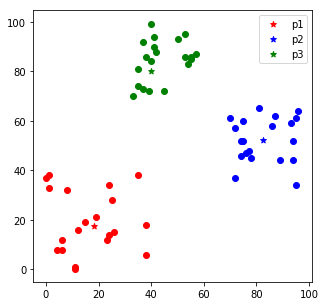

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


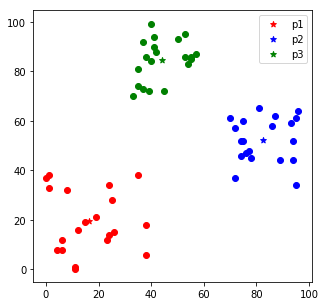

Inisiasi----------------------------------------------


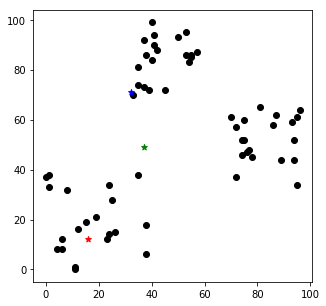

Penyematan--------------------------------------------
catatan 20 20
pusat [[16, 12], [32, 71], [37, 49]] 3
group 2 2 2


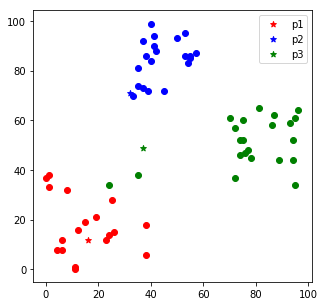

catatan 20 20
pusat [[14.888888888888889, 17.666666666666668], [44.0, 84.5], [77.818181818181813, 50.909090909090907]] 3
group 2 2 2


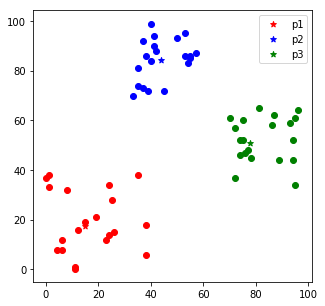

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


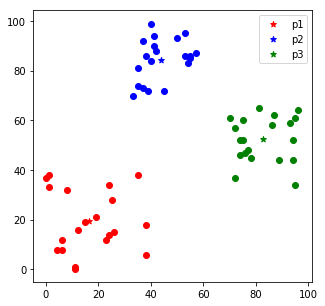

Inisiasi----------------------------------------------


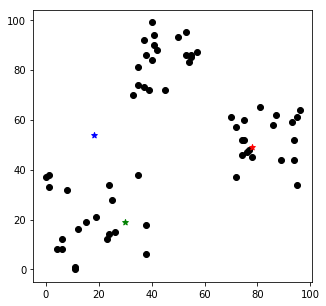

Penyematan--------------------------------------------
catatan 18 18
pusat [[78, 49], [18, 54], [30, 19]] 3
group 2 2 2


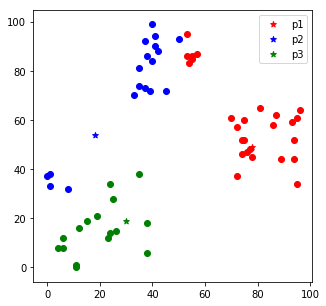

catatan 20 20
pusat [[76.15384615384616, 60.384615384615387], [31.277777777777779, 72.666666666666671], [19.8125, 15.625]] 3
group 2 2 2


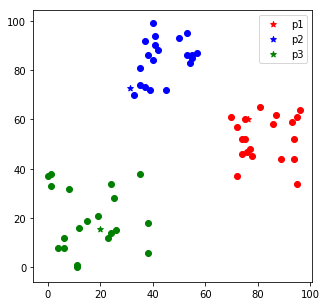

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


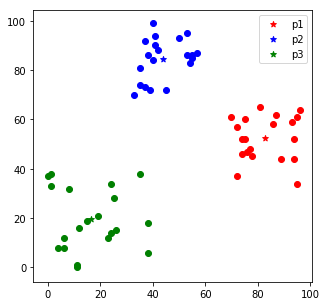

Inisiasi----------------------------------------------


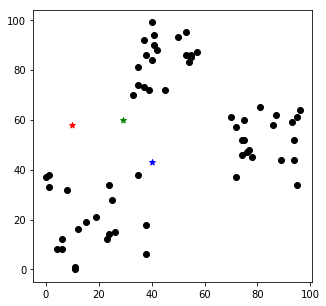

Penyematan--------------------------------------------
catatan 36 36
pusat [[10, 58], [40, 43], [29, 60]] 3
group 2 2 2


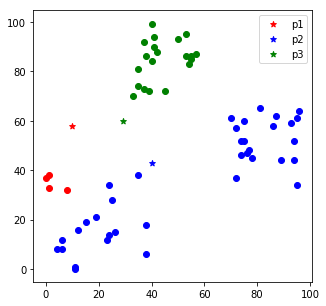

catatan 23 23
pusat [[2.5, 35.0], [54.722222222222221, 36.055555555555557], [44.0, 84.5]] 3
group 2 2 2


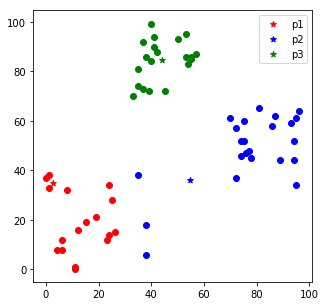

catatan 20 20
pusat [[12.705882352941176, 19.294117647058822], [76.695652173913047, 48.260869565217391], [44.0, 84.5]] 3
group 2 2 2


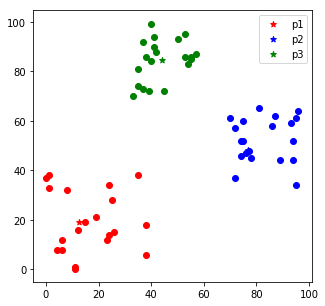

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


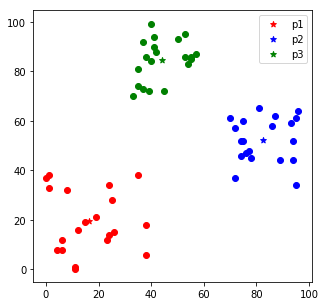

Inisiasi----------------------------------------------


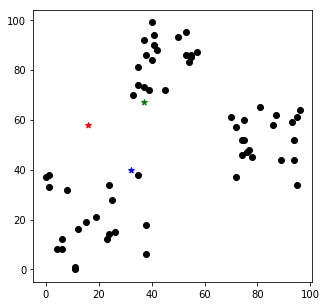

Penyematan--------------------------------------------
catatan 21 21
pusat [[16, 58], [32, 40], [37, 67]] 3
group 2 2 2


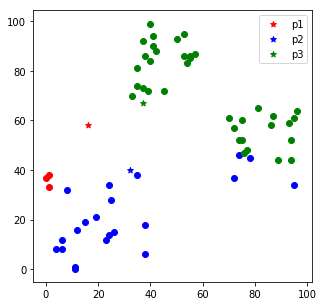

catatan 14 14
pusat [[0.66666666666666663, 36.0], [30.666666666666668, 21.142857142857142], [61.5, 71.555555555555557]] 3
group 2 2 2


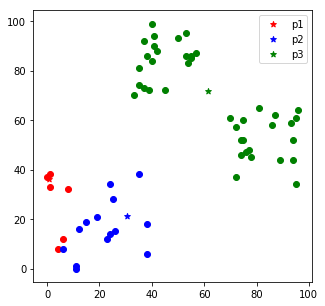

catatan 14 14
pusat [[3.3333333333333335, 26.666666666666668], [21.928571428571427, 16.428571428571427], [63.325000000000003, 68.450000000000003]] 3
group 2 2 2


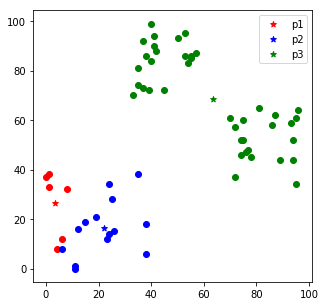

Inisiasi----------------------------------------------


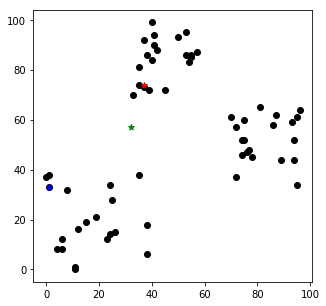

Penyematan--------------------------------------------
catatan 18 18
pusat [[37, 74], [1, 33], [32, 57]] 3
group 2 2 2


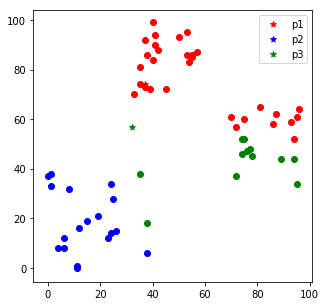

catatan 20 20
pusat [[57.633333333333333, 76.299999999999997], [14.111111111111111, 18.555555555555557], [73.083333333333329, 42.083333333333336]] 3
group 2 2 2


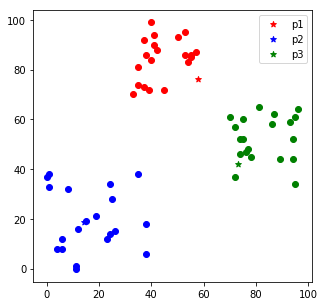

catatan 20 20
pusat [[44.0, 84.5], [16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


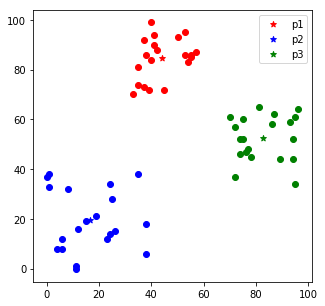

Inisiasi----------------------------------------------


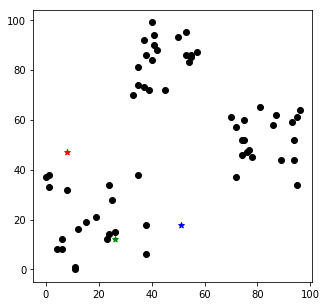

Penyematan--------------------------------------------
catatan 22 22
pusat [[8, 47], [51, 18], [26, 12]] 3
group 2 2 2


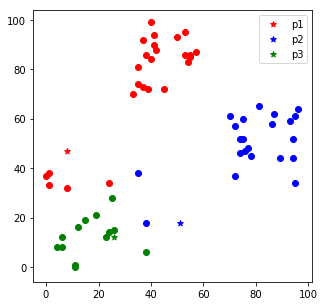

catatan 20 20
pusat [[36.560000000000002, 74.560000000000002], [78.454545454545453, 50.18181818181818], [16.923076923076923, 12.307692307692308]] 3
group 2 2 2


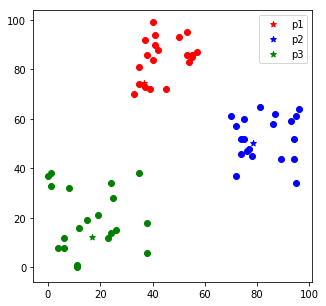

catatan 20 20
pusat [[44.0, 84.5], [82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5]] 3
group 2 2 2


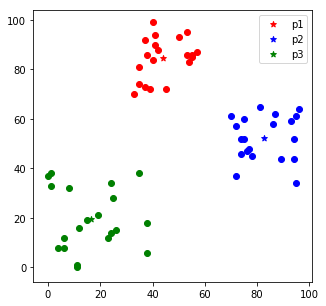

Inisiasi----------------------------------------------


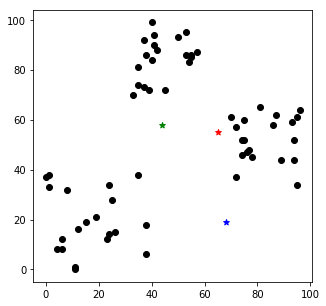

Penyematan--------------------------------------------
catatan 9 9
pusat [[65, 55], [68, 19], [44, 58]] 3
group 2 2 2


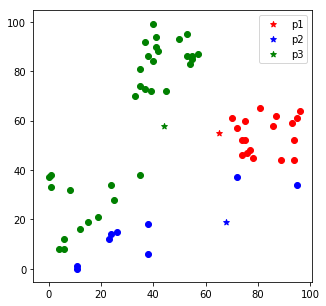

catatan 18 18
pusat [[82.555555555555557, 54.277777777777779], [37.555555555555557, 15.222222222222221], [31.393939393939394, 61.030303030303031]] 3
group 2 2 2


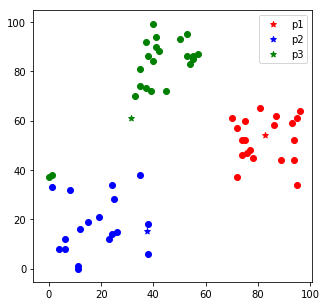

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [18.111111111111111, 17.5], [40.045454545454547, 80.227272727272734]] 3
group 2 2 2


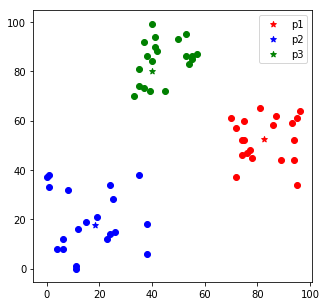

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [16.350000000000001, 19.5], [44.0, 84.5]] 3
group 2 2 2


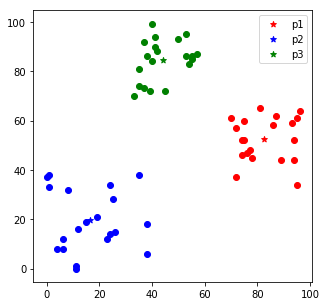

Inisiasi----------------------------------------------


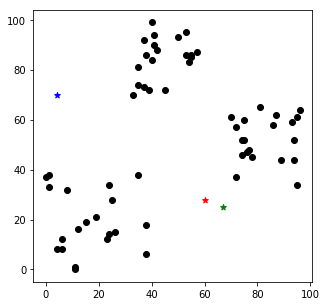

Penyematan--------------------------------------------
catatan 24 24
pusat [[60, 28], [4, 70], [67, 25]] 3
group 2 2 2


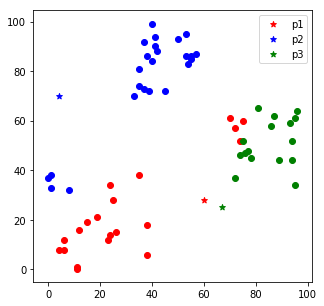

catatan 20 20
pusat [[30.399999999999999, 24.0], [37.083333333333336, 76.25], [85.125, 51.125]] 3
group 2 2 2


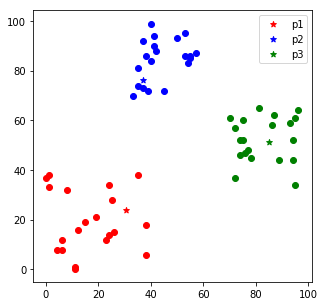

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


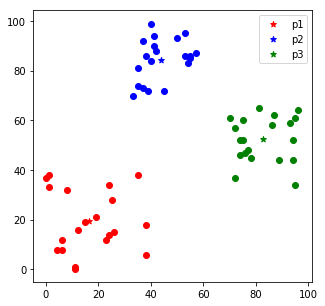

Inisiasi----------------------------------------------


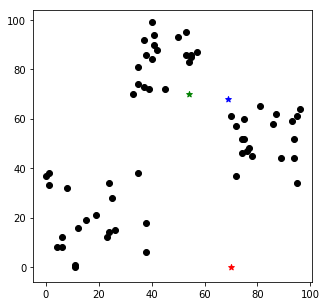

Penyematan--------------------------------------------
catatan 19 19
pusat [[70, 0], [69, 68], [54, 70]] 3
group 2 2 2


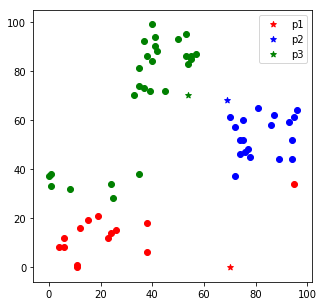

catatan 20 20
pusat [[23.428571428571427, 13.142857142857142], [82.0, 53.368421052631582], [36.074074074074076, 71.481481481481481]] 3
group 2 2 2


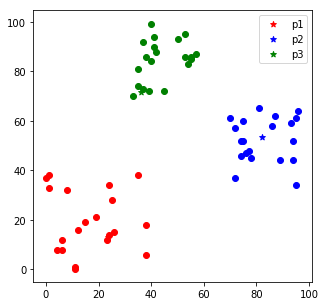

catatan 20 20
pusat [[16.350000000000001, 19.5], [82.650000000000006, 52.399999999999999], [44.0, 84.5]] 3
group 2 2 2


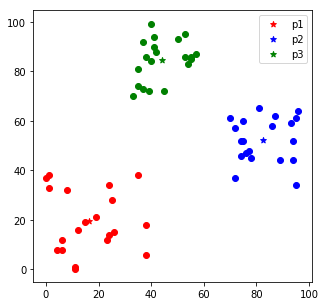

Inisiasi----------------------------------------------


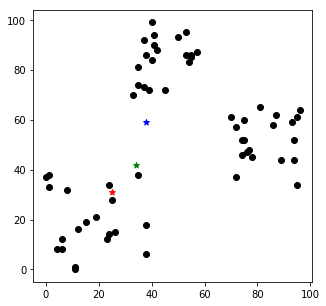

Penyematan--------------------------------------------
catatan 38 38
pusat [[25, 31], [38, 59], [34, 42]] 3
group 2 2 2


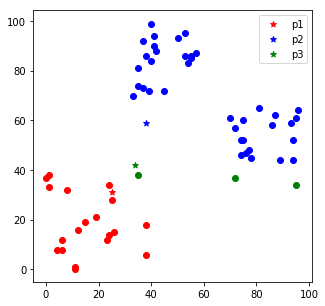

catatan 29 29
pusat [[15.368421052631579, 18.526315789473685], [62.263157894736842, 70.184210526315795], [67.333333333333329, 36.333333333333336]] 3
group 2 2 2


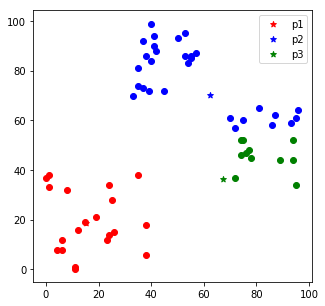

catatan 20 20
pusat [[16.350000000000001, 19.5], [56.379310344827587, 77.137931034482762], [81.63636363636364, 45.545454545454547]] 3
group 2 2 2


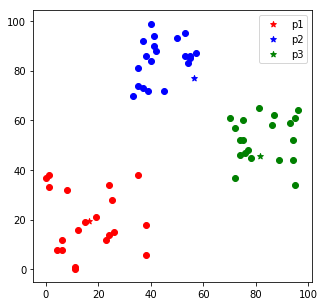

catatan 20 20
pusat [[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] 3
group 2 2 2


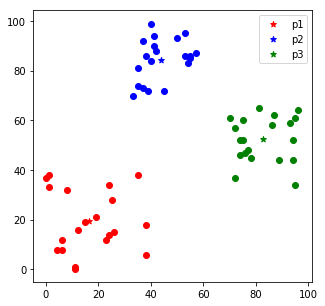

Inisiasi----------------------------------------------


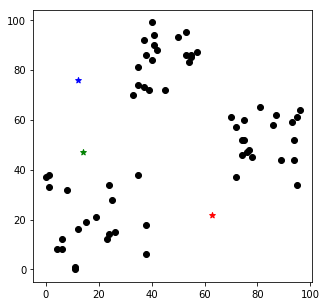

Penyematan--------------------------------------------
catatan 20 20
pusat [[63, 22], [12, 76], [14, 47]] 3
group 2 2 2


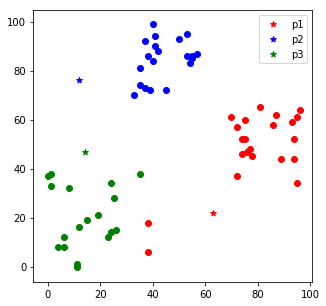

catatan 20 20
pusat [[78.590909090909093, 48.727272727272727], [44.0, 84.5], [13.944444444444445, 20.333333333333332]] 3
group 2 2 2


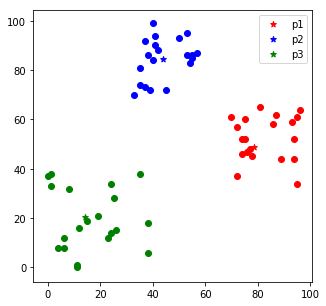

catatan 20 20
pusat [[82.650000000000006, 52.399999999999999], [44.0, 84.5], [16.350000000000001, 19.5]] 3
group 2 2 2


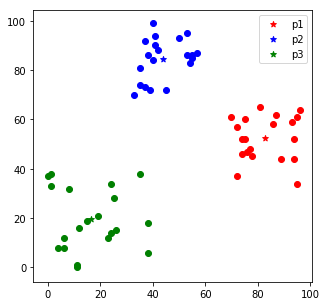

[[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] ini masalhnya
Model telah sukses dibuat. ^_^
[[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]] pusat unik
Group mayoritas yang terbentuk
['[[0, 9, 30, 33, 45, 48, 54], [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59], [3, 6, 12, 15, 18, 21, 24, 27, 36, 39, 42, 51, 57]]', '[[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57], [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58], [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59]]', '[[0, 3, 6, 9, 12, 15, 24, 27, 30, 33, 45, 48, 54], [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59], [18, 21, 36, 39, 42, 51, 57]]', '[[0, 18, 24, 30, 36, 

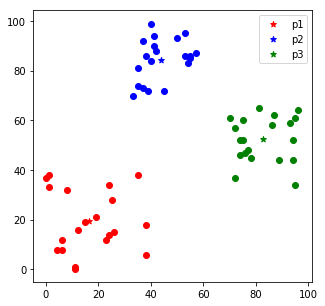

-----------------------------------------------------


In [58]:
model_kmeans = pembelajaran(df)

In [54]:
model_kmeans

[[16.350000000000001, 19.5],
 [44.0, 84.5],
 [82.650000000000006, 52.399999999999999]]

In [48]:
data_baru = pd.DataFrame()
xi = [80]
yi = [60]
data_baru['x'] = xi
data_baru['y'] = yi

In [49]:
print('model')
print(model_kmeans)

model
[[16.350000000000001, 19.5], [44.0, 84.5], [82.650000000000006, 52.399999999999999]]


## Klasifikasi Data Baru

In [50]:
def predict(data_baru,model_kmeans):
    jarak,group = penyematan(data_baru,model_kmeans)
    kelompok = jarak['pusat terdekat'][0]
    return kelompok

kelompok = predict(data_baru,model_kmeans)
print('Data baru termasuk kelompok',kelompok)


Data baru termasuk kelompok 3


# Model Dengan Scikit-Learn

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

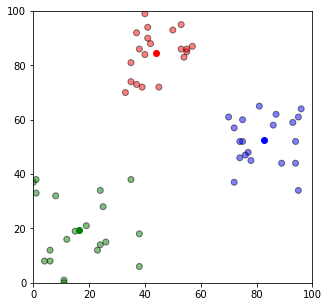

In [53]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()


note:
- kmeans sangat sensitif terhadap skala karena menggunakan jarak euclid oleh karena itu diperlukan normalisasi data.
- Jika ada simetri pada data, beberapa data mungkin akan kelewatan dilabeli.
- Direkomendasikan menggunakan k-means yang sma dengan titik pusat awal yang berbeda-beda, dan dipilih yang paling umum.


*Learning K 
• Find a balance between two variables: the number of 
clusters (K) and the average variance of the clusters. 
• Minimize both values 
• As the number of clusters increases, the average 
variance decreases (up to the trivial case of k=n and 
variance=0). 
• Some criteria: 
– BIC (Bayesian Informa?on Criteria) 
– AIC (Akaike Informa?on Criteria) 
– Davis‐Bouldin Index 
– Confusion Matrix

______________________________________________________________________________________________________________________

Powered by Kofera Technology